# PyWGCNA with E-MEXP-728 (filtered)

In [1]:
import PyWGCNA
print(PyWGCNA.__file__)

/home/ribei027/miniconda3/envs/pywgcna3/lib/python3.9/site-packages/PyWGCNA/__init__.py


## Setting up the data and preprocessing
Starting with the transposed dataset related to the top 2000 most deviating genes calculated by MAD

In [11]:
geneExp = "../data/E-MEXP-728/eMEXP728_filtered_transposed.csv"
PyWGCNA_728 = PyWGCNA.WGCNA(name='E-MEXP-728-filtered-TPM1',
                                  species='arabidopsis thaliana',
                                  geneExpPath=geneExp,
                                  outputPath='/home/ribei027/wgcna/analysis_notebooks/',
                                  save=True,
                             TPMcutoff=1)
PyWGCNA_728.geneExpr.to_df().head(5)

Saving data to be True, checking requirements ...


AT3G12580  AT3G22231  AT1G35910  AT3G22240  AT5G24770  \
35D-0H-16C-A   3.350497  10.631723   3.104337  11.800455   5.137504   
35D-0H-16C-B   2.321928  10.223519   3.906891  11.023616   5.632268   
35D-2H-16C-A   2.432959  11.654726   5.311067  12.766922   3.596935   
37D-2H-16C-B   1.321928  11.963871   6.143638  12.711645   4.321928   
40D-5H-16C-A   3.017922   9.950264   7.025693  10.860621   5.560715   

              AT1G56300  AT3G57240  AT1G72260  AT2G14610  AT5G45180  ...  \
35D-0H-16C-A   9.354249   6.636625   4.277985   7.586465   6.110614  ...   
35D-0H-16C-B   9.394891   6.236493   5.526695   7.574404   6.242221  ...   
35D-2H-16C-A   5.529821   9.725196   5.031219  10.301268   6.835419  ...   
37D-2H-16C-B   5.357552   8.825595   5.491853  10.408754   7.415319  ...   
40D-5H-16C-A   5.108524  10.285865   7.688600  11.276299   5.061776  ...   

              AT3G43420  AT2G06020  AT4G08560  AT3G15440  AT5G56490  \
35D-0H-16C-A   3.247928   1.632268   3.981853   2.232661   3.916477   
35D-0H-16C-B   2.070389   3.485427   3.087463   1.536053   3.017922   
35D-2H-16C-A   3.711495   1.485427   4.185867   1.765535   5.044394   
37D-2H-16C-B   2.000000   3.137504   2.201634   3.392317   3.232661   
40D-5H-16C-A   0.925999   3.472488   1.722466   1.000000   1.137504   

              AT2G17500  AT5G27350  AT4G28550  AT1G71030  AT1G69120  
35D-0H-16C-A   3.472488   5.017922   5.635174   5.852998   4.104337  
35D-0H-16C-B   4.177918   2.981853   5.405992   6.068241   2.137504  
35D-2H-16C-A   4.432959   5.236493   5.061776   5.498251   3.087463  
37D-2H-16C-B   2.925999   3.548437   5.507795   4.504620   3.485427  
40D-5H-16C-A   4.321928   3.584963   5.475733   4.491853   3.897240  

[5 rows x 2000 columns]

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



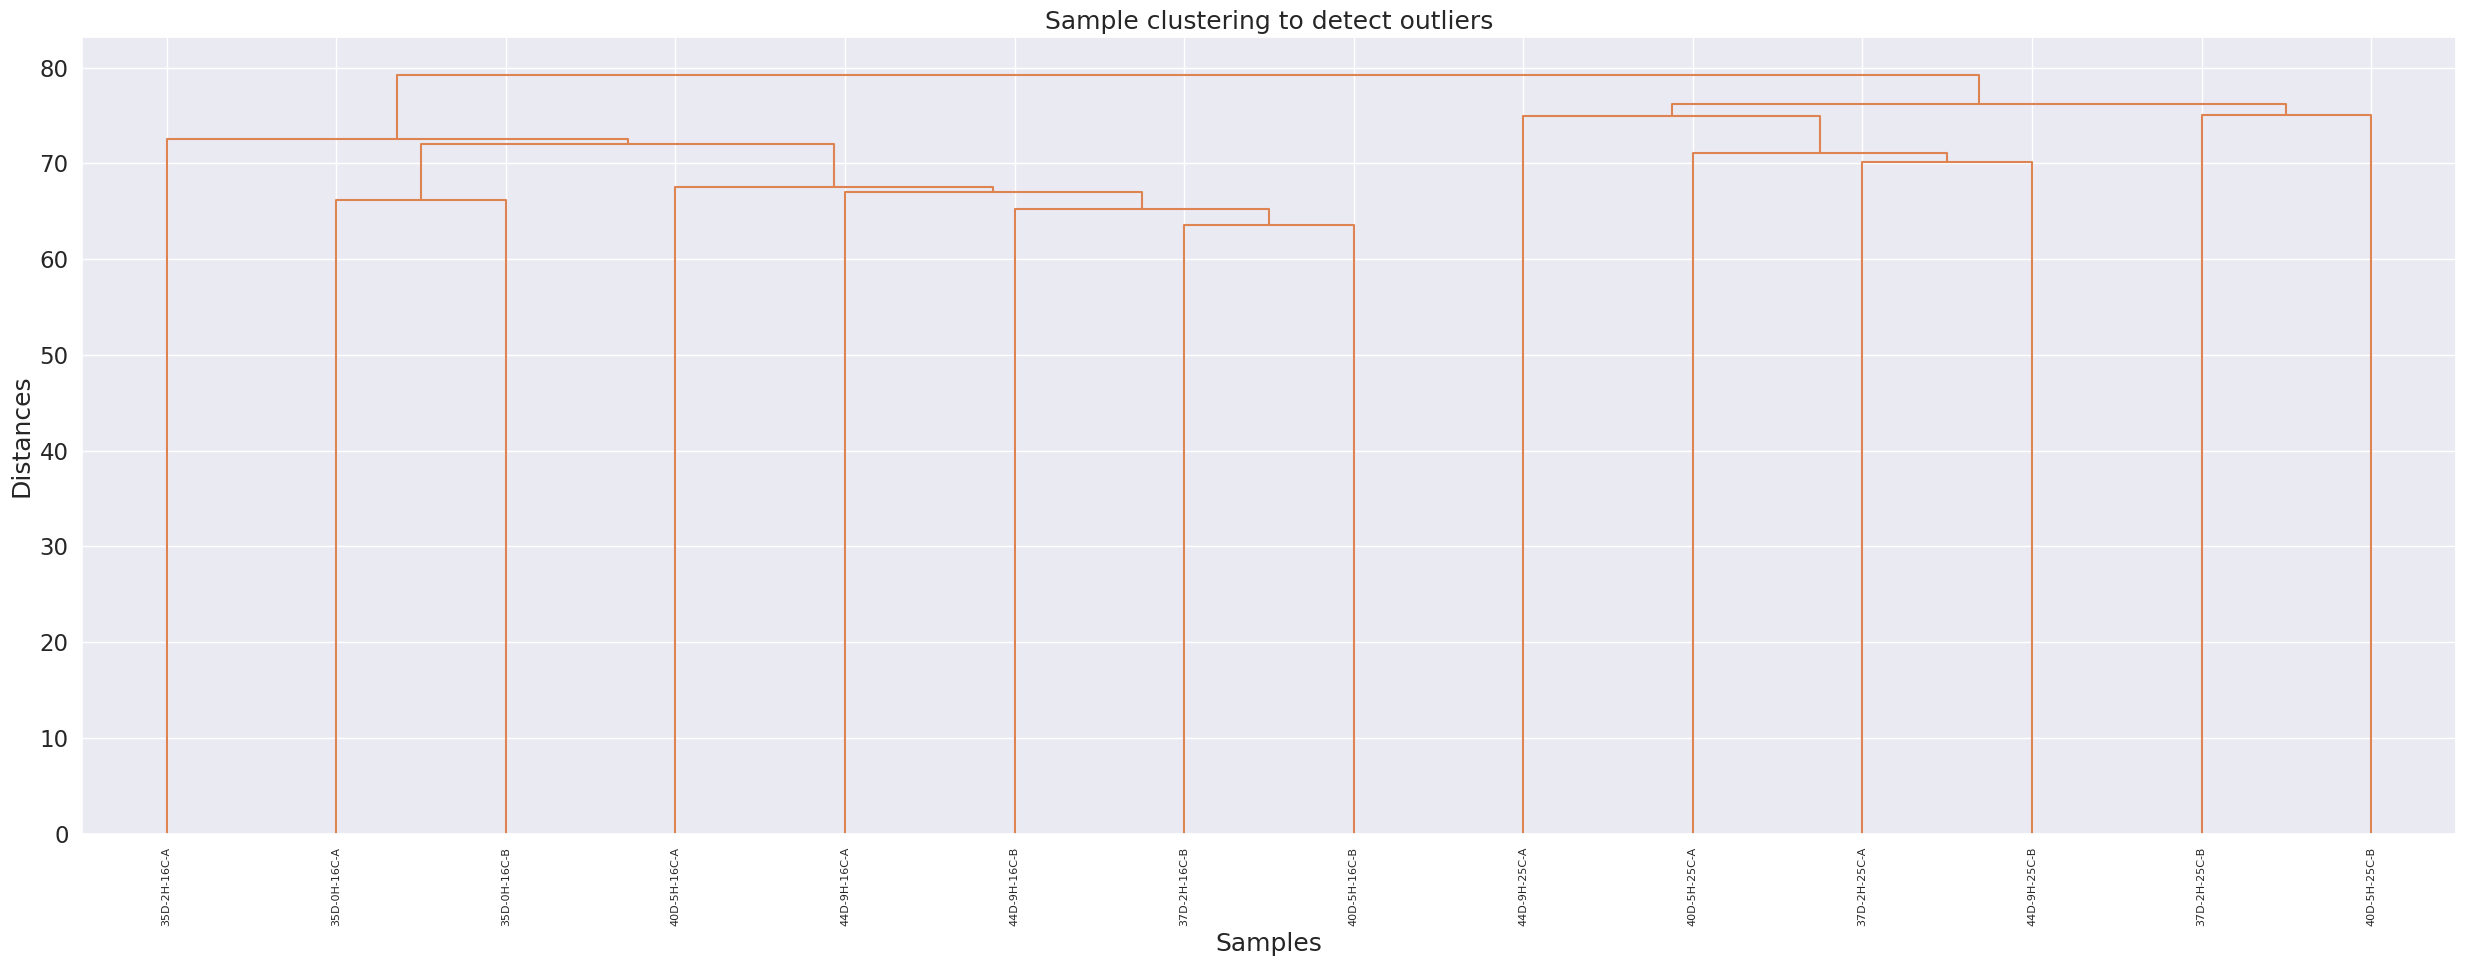

In [12]:
PyWGCNA_728.preprocess()

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  2000
    Power  SFT.R.sq     slope truncated R.sq     mean(k)   median(k)  \
0       1  0.138313  1.686438       0.972917  252.999152  250.648026   
1       2  0.145888 -1.185944       0.941754   91.840244   89.134624   
2       3  0.547385 -2.201632       0.917868   41.094977   38.848837   
3       4  0.762281  -2.42061       0.924434   21.054143   19.107521   
4       5  0.885638 -2.472235       0.930803   11.894955   10.297681   
5       6  0.914669 -2.404251       0.917381    7.245111    5.934404   
6       7  0.929136 -2.271454        0.91121     4.68629    3.622064   
7       8  0.961653 -2.062677       0.957789    3.184324    2.322898   
8       9  0.961262 -1.926863       0.973005    2.254593    1.539964   
9      10   0.96023 -1.817587        0.98726    1.652771    1.052486   
10     11  0.958768 -1.750318       0.973924    1.248039    0.739395   
11     13  0.961005 -1.646698    

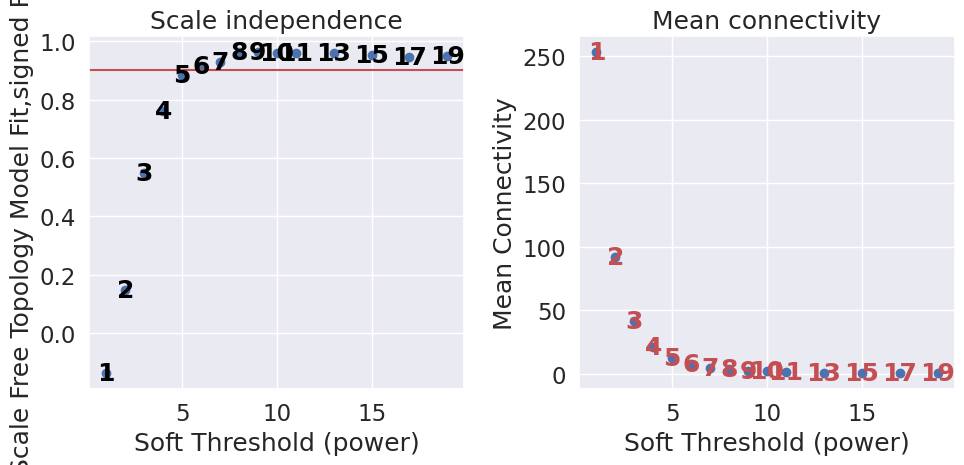

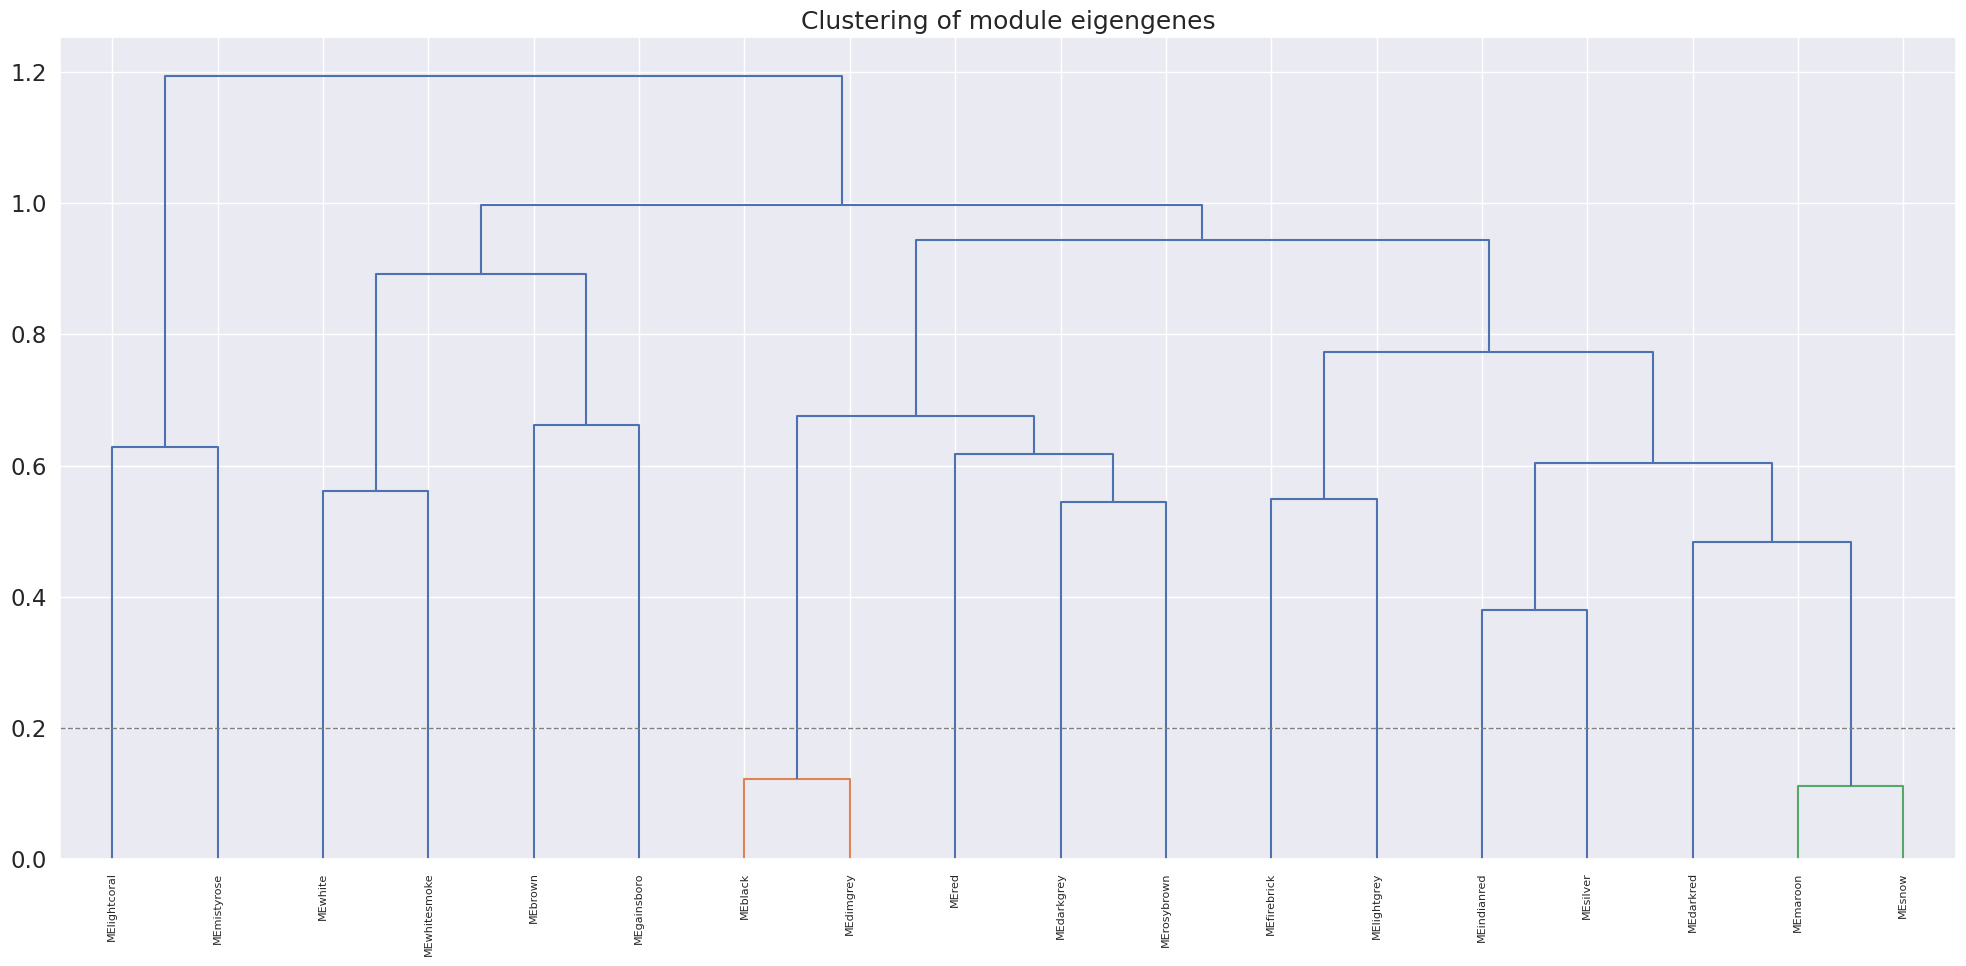

In [13]:
PyWGCNA_728.findModules()

## Update metadata

In [14]:
PyWGCNA_728.updateSampleInfo(path='../data/E-MEXP-728/eMEXP728SampleInfo.csv', sep=',')

# Add color to metadata

PyWGCNA_728.setMetadataColor('Temperature', {'16c': 'blue',
                                              '25c': 'yellow'})

PyWGCNA_728.setMetadataColor('Age', {'35d': 'thistle',
                                       '37d': 'plum',
                                       '40d': 'violet',
                                       '44d': 'purple'})

PyWGCNA_728.setMetadataColor('Photoperiod', {'LD': 'red',
                                              'SD': 'green'})


PyWGCNA_728.setMetadataColor('LeafNumber', {'22l': 'darkviolet',
                                              '29l': 'deeppink'})

In [15]:
geneList = PyWGCNA.getGeneList(dataset='athaliana_eg_gene',
                               attributes=['ensembl_gene_id',
                                           'external_gene_name',
                                           'gene_biotype'],
                               maps=['gene_id', 'gene_name', 'gene_biotype'])

PyWGCNA_728.updateGeneInfo(geneList)

Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...
	Done..

doing Enrichr GO analysis for each module...
No enrich terms when cutoff = 0.03 in module black
No enrich terms when cutoff = 0.03 in module brown
No enrich terms when cutoff = 0.03 in module darkgrey
No enrich terms when cutoff = 0.03 in module darkred
No enrich terms when cutoff = 0.03 in module firebrick
No enrich terms when cutoff = 0.03 in module gainsboro
No enrich terms when cutoff = 0.03 in module indianred
No enrich terms when cutoff = 0.03 in module lightcoral
No enrich terms when cutoff = 0.03 in module lightgrey
No enrich terms when cutoff = 0.03 in module maroon
No enrich terms when cutoff = 0.03 in module mistyrose
No enrich terms when cutoff = 0.03 in module red
No enrich terms when cutoff = 0.03 in module rosybrown
No enrich terms whe

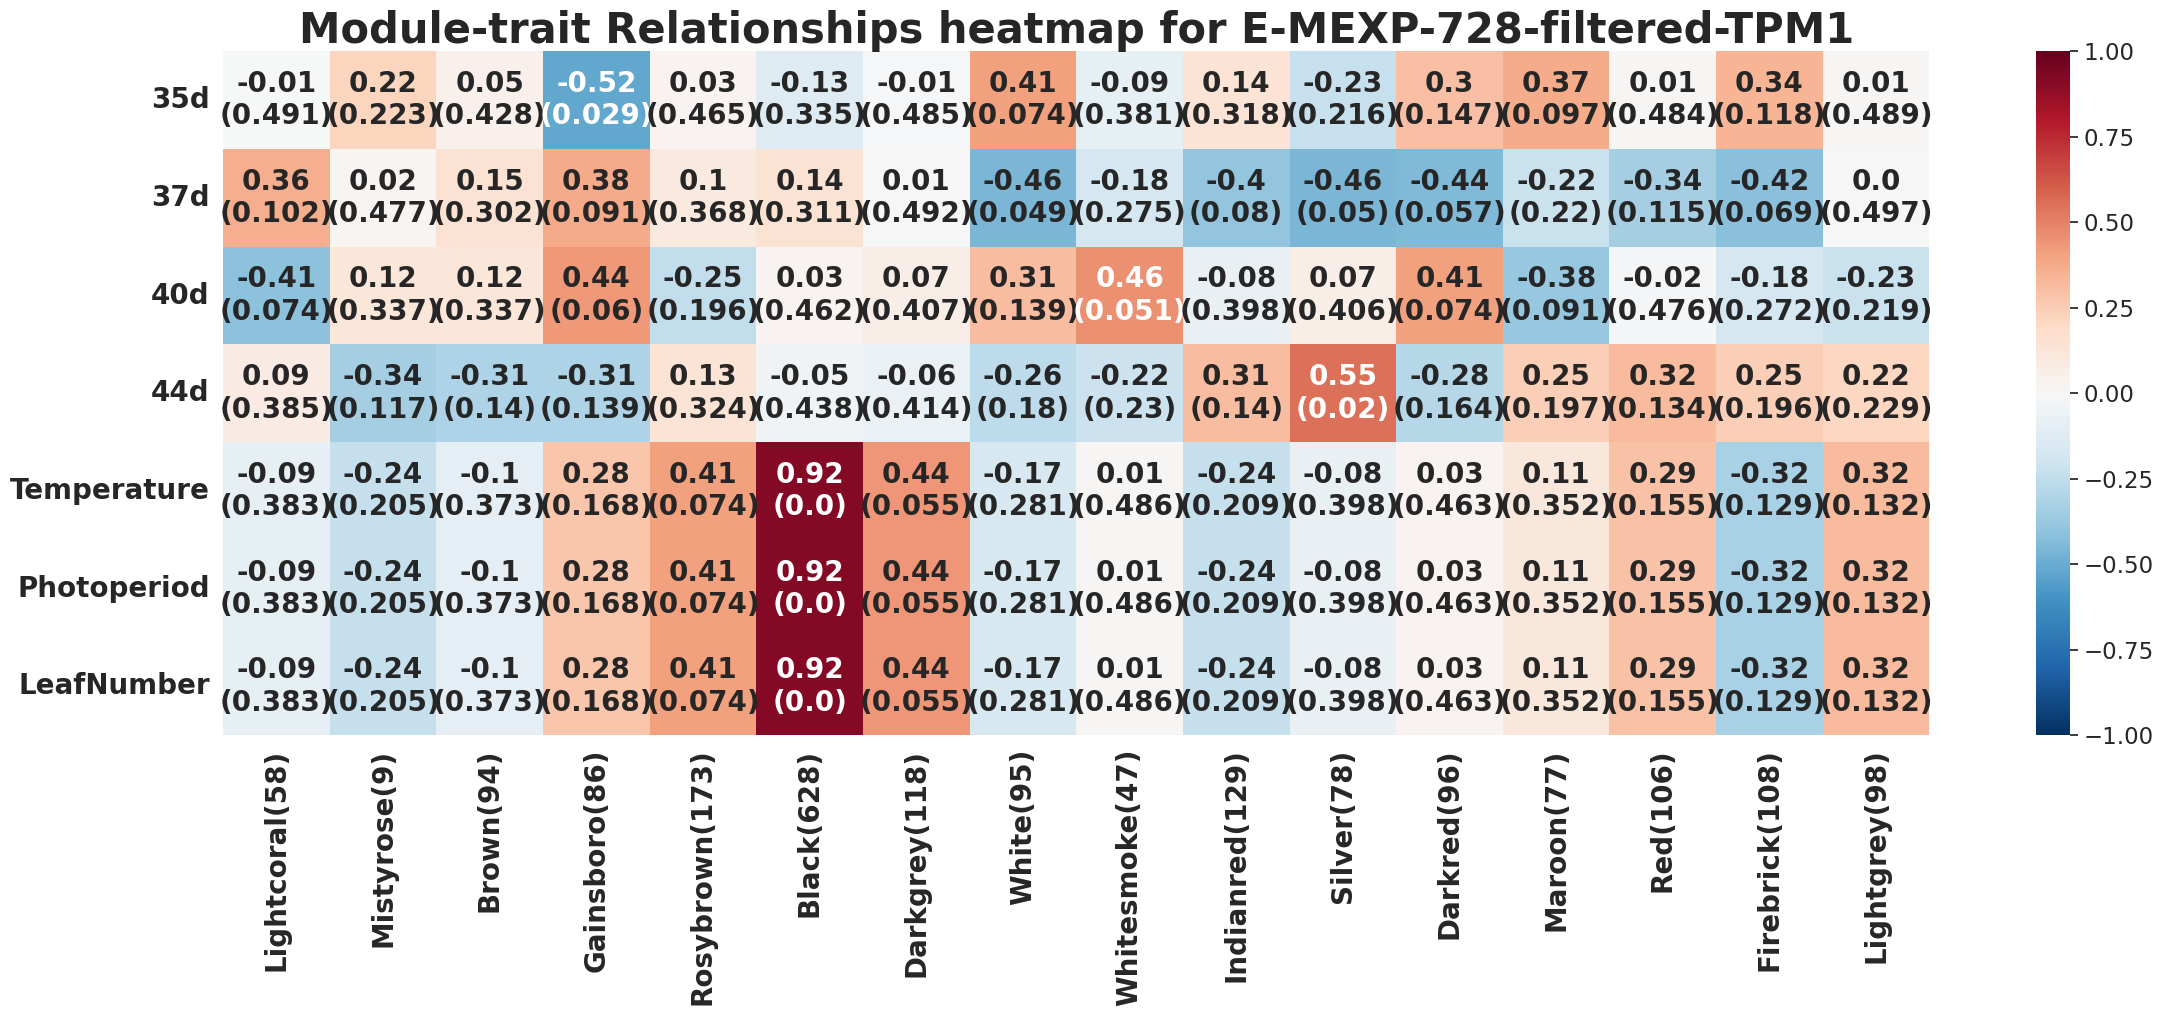

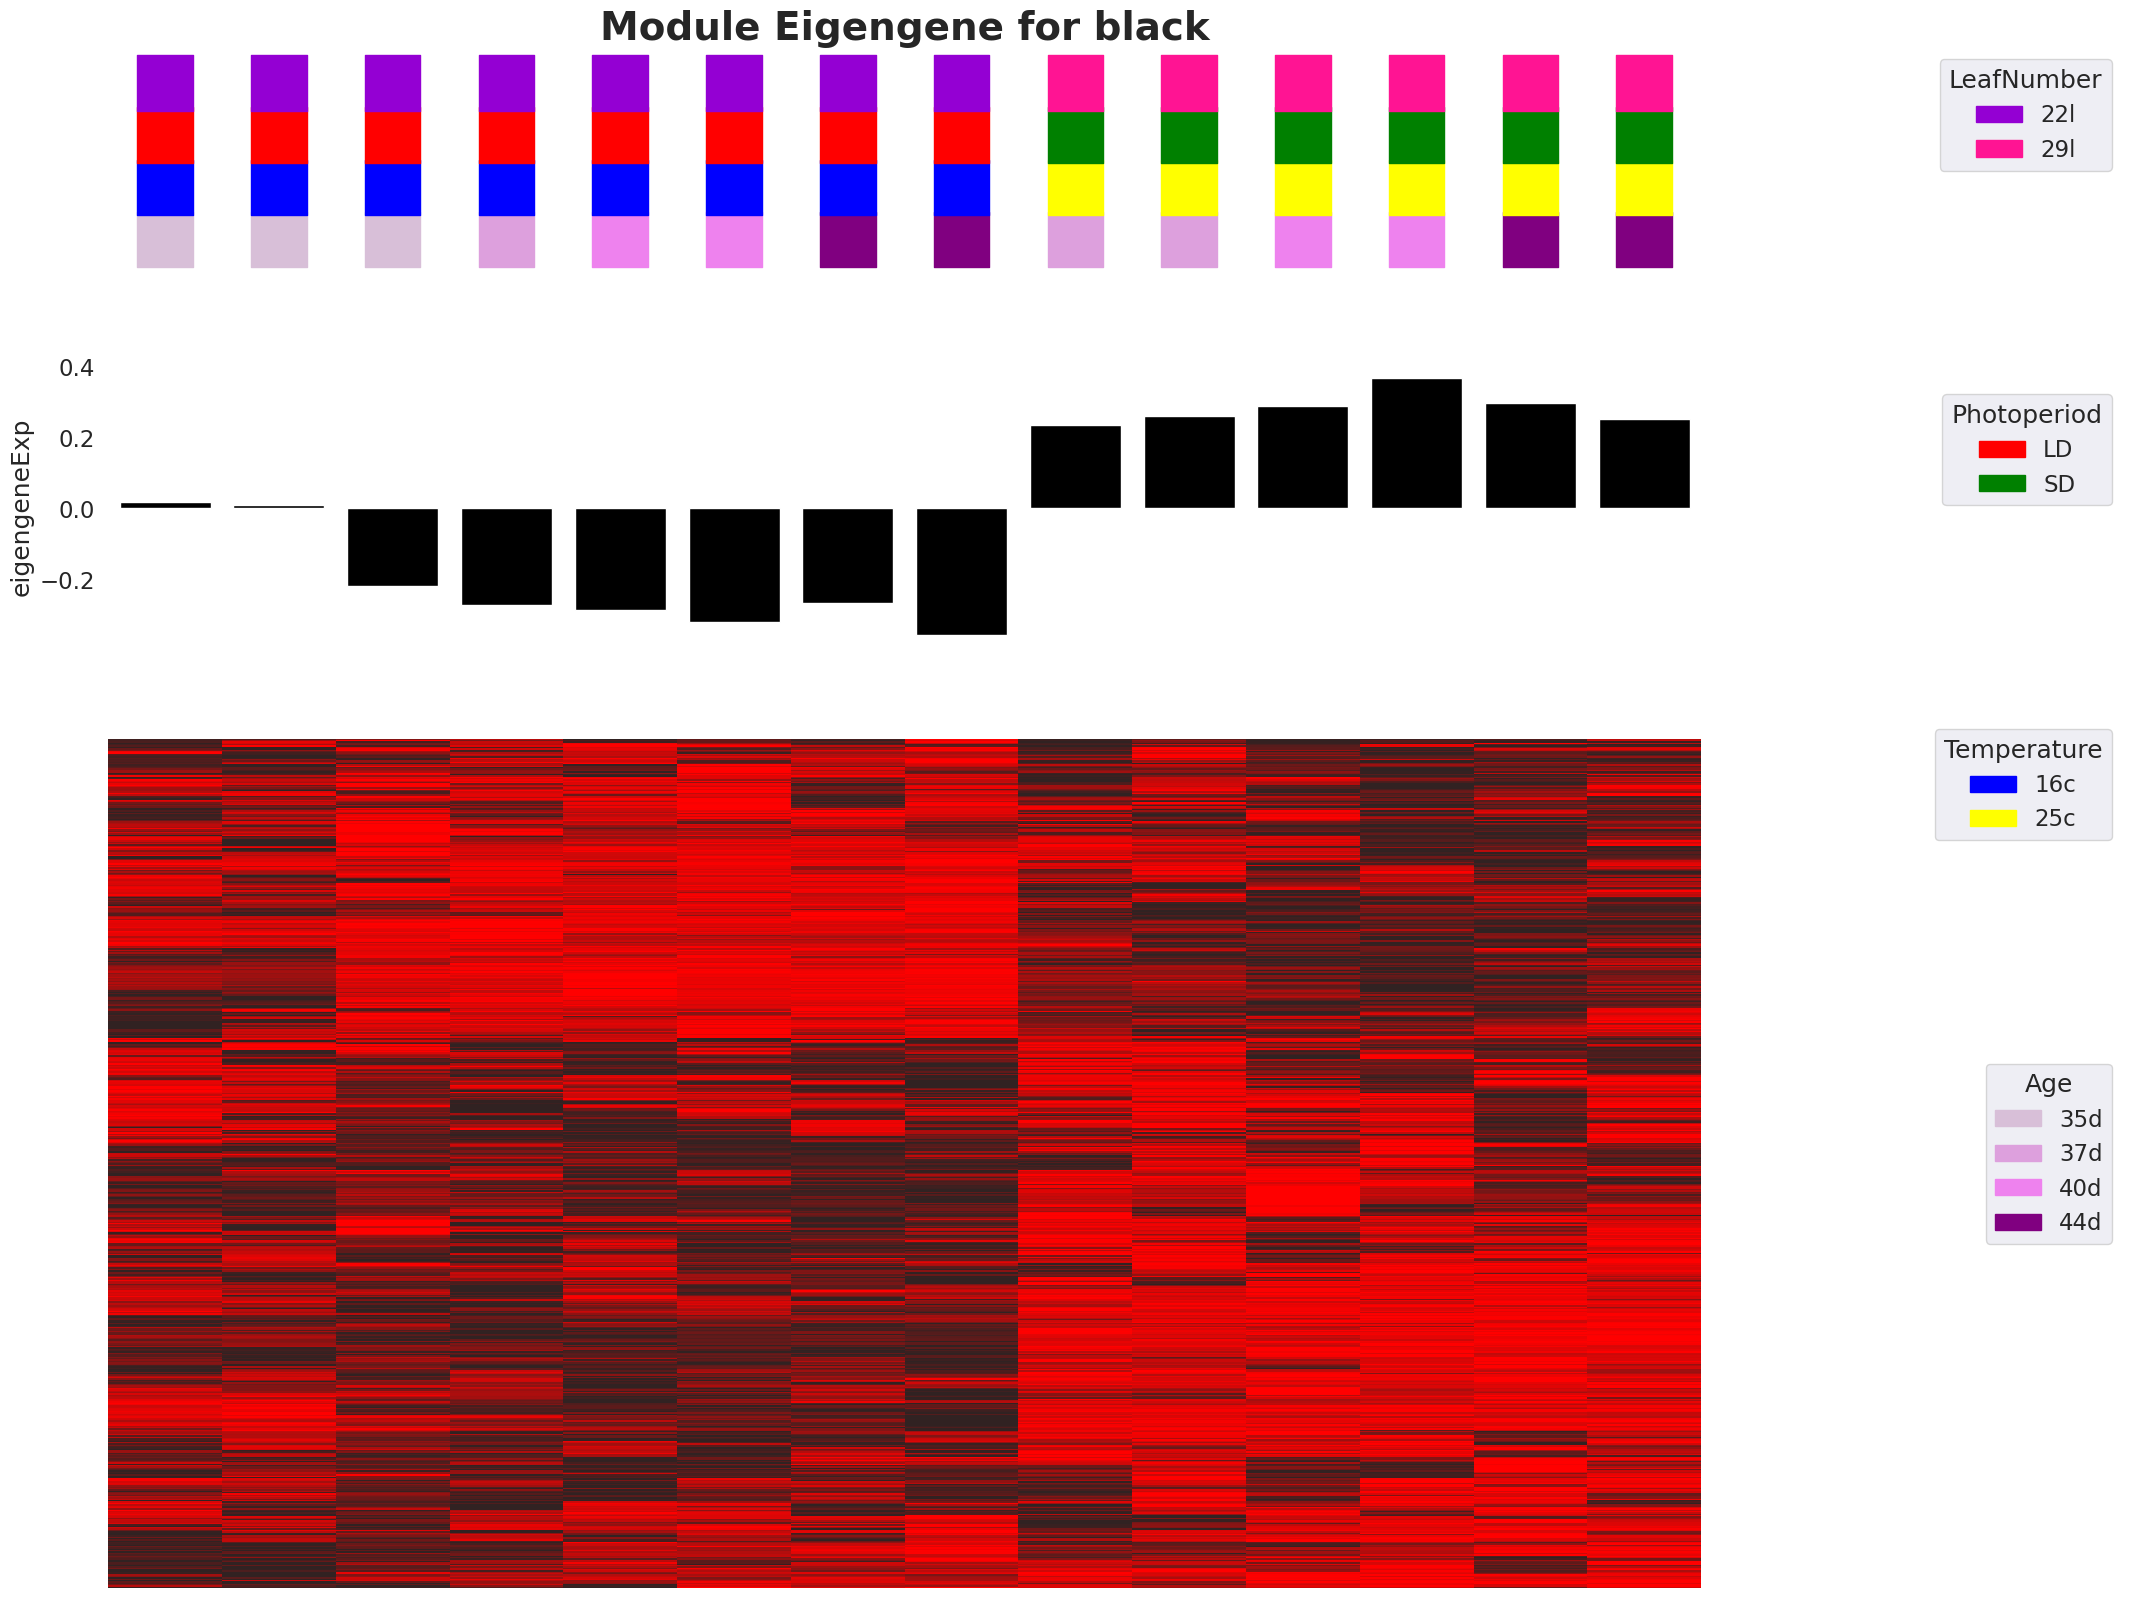

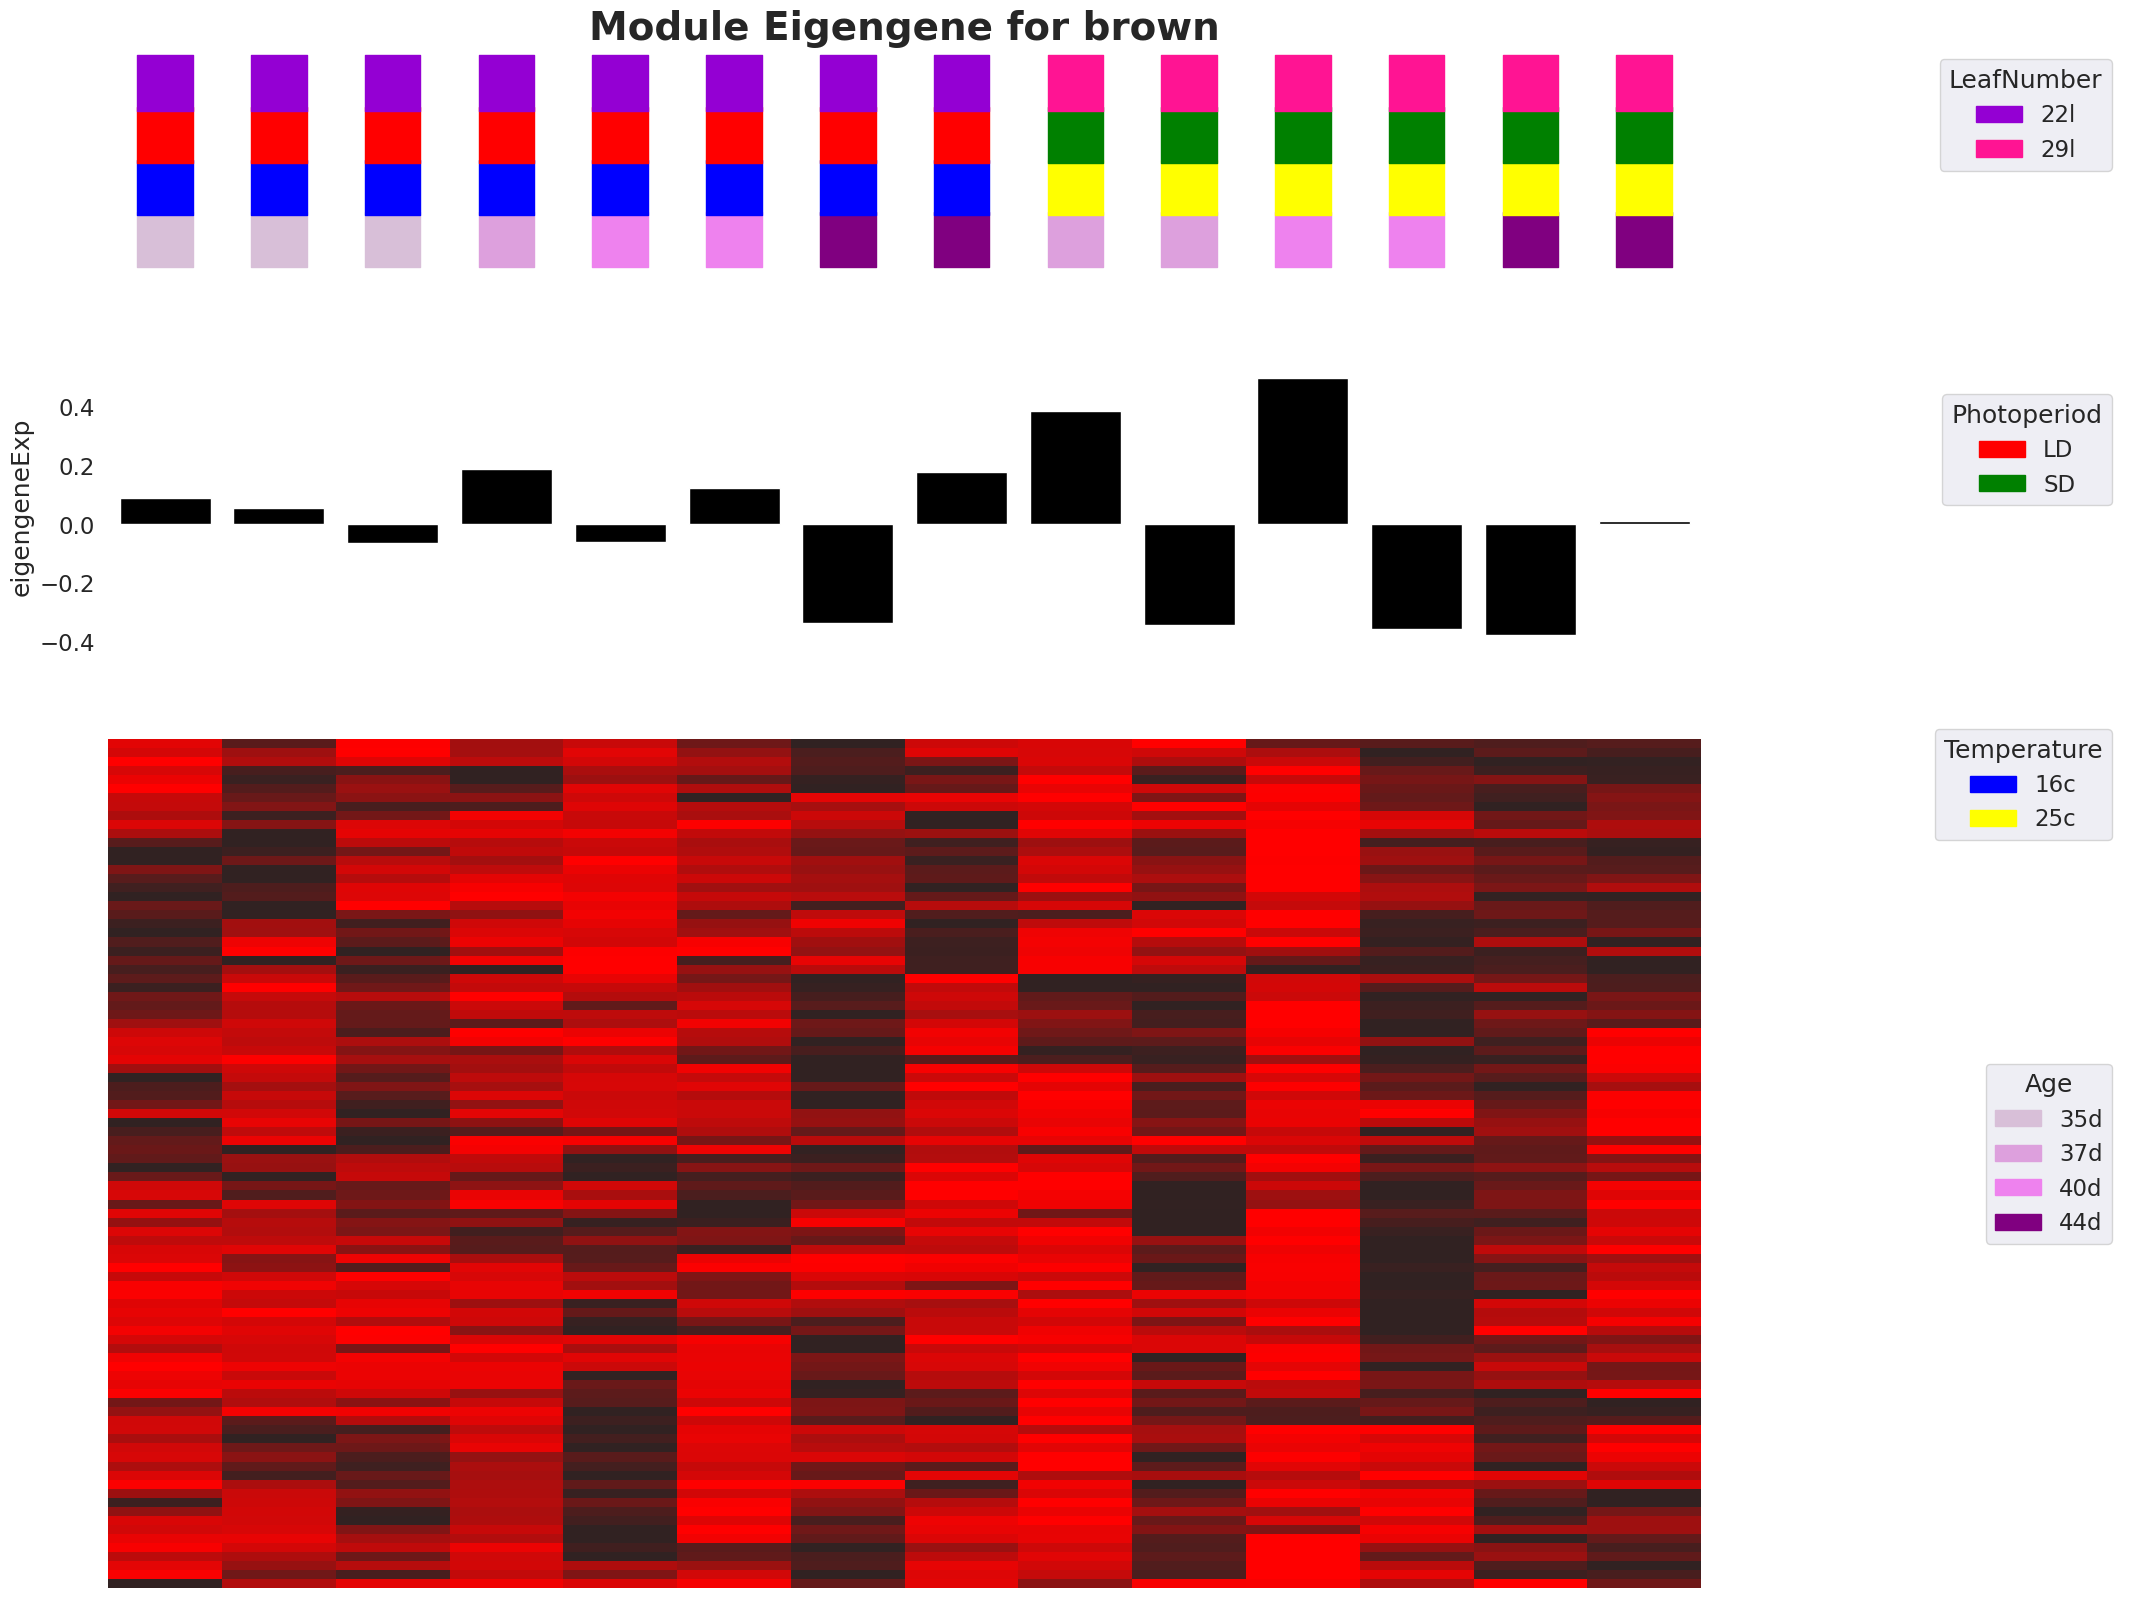

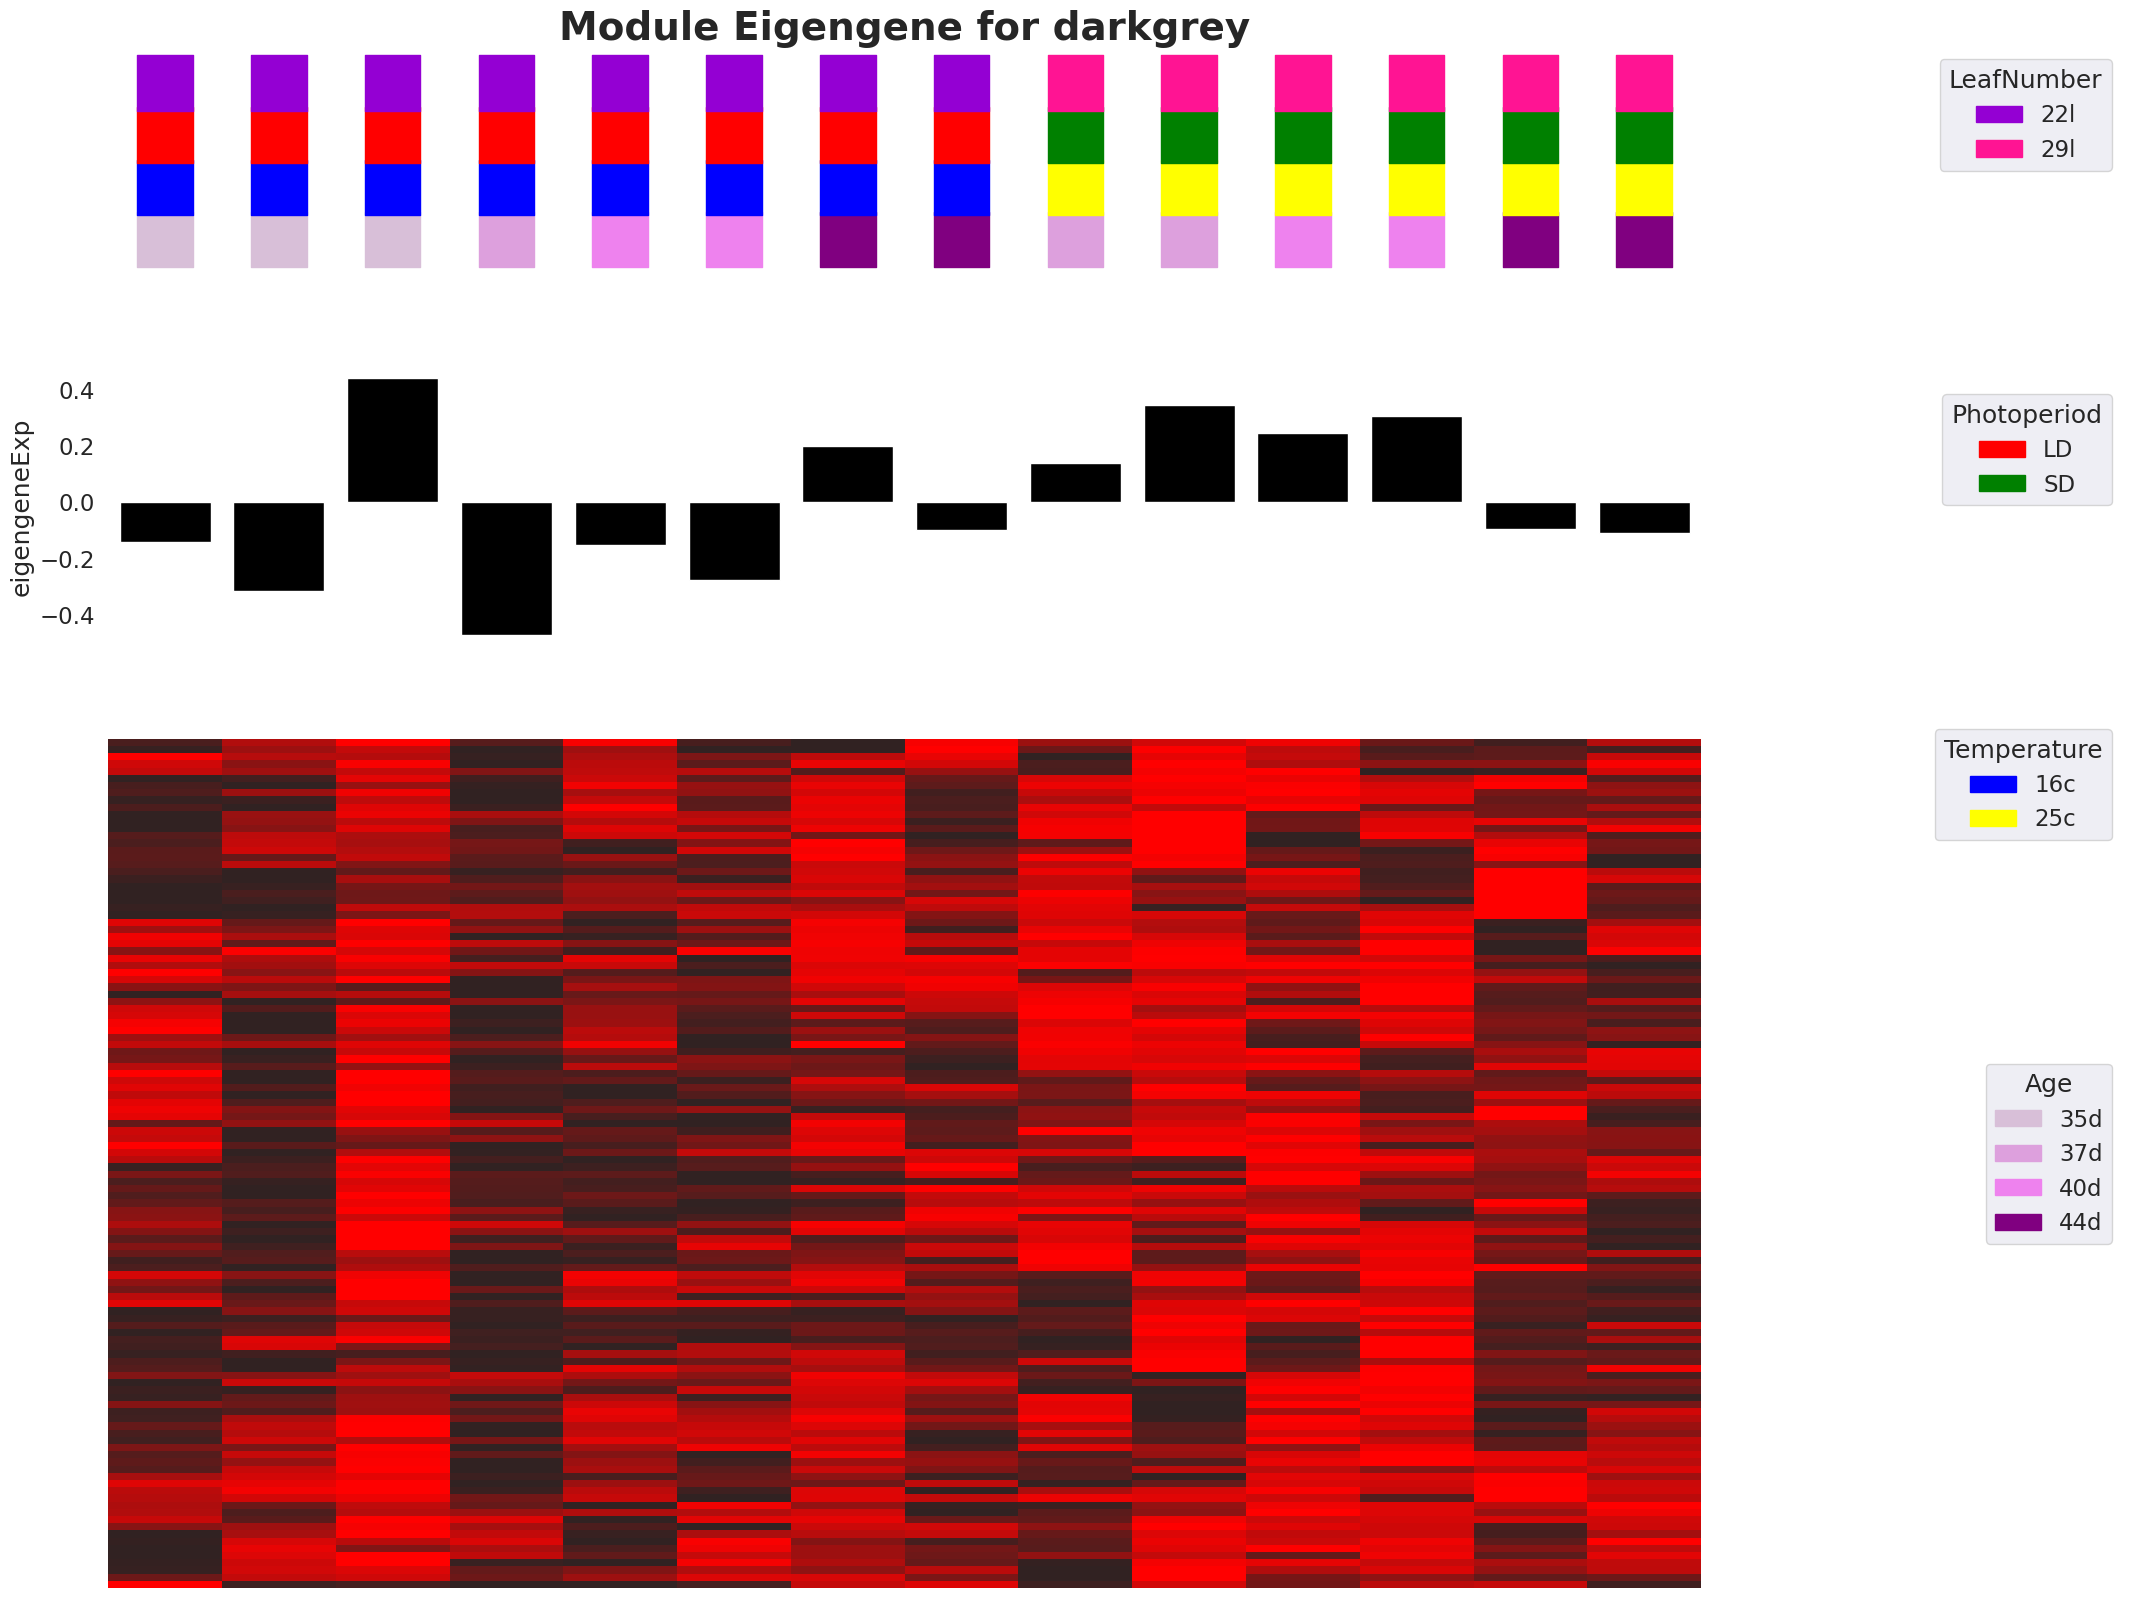

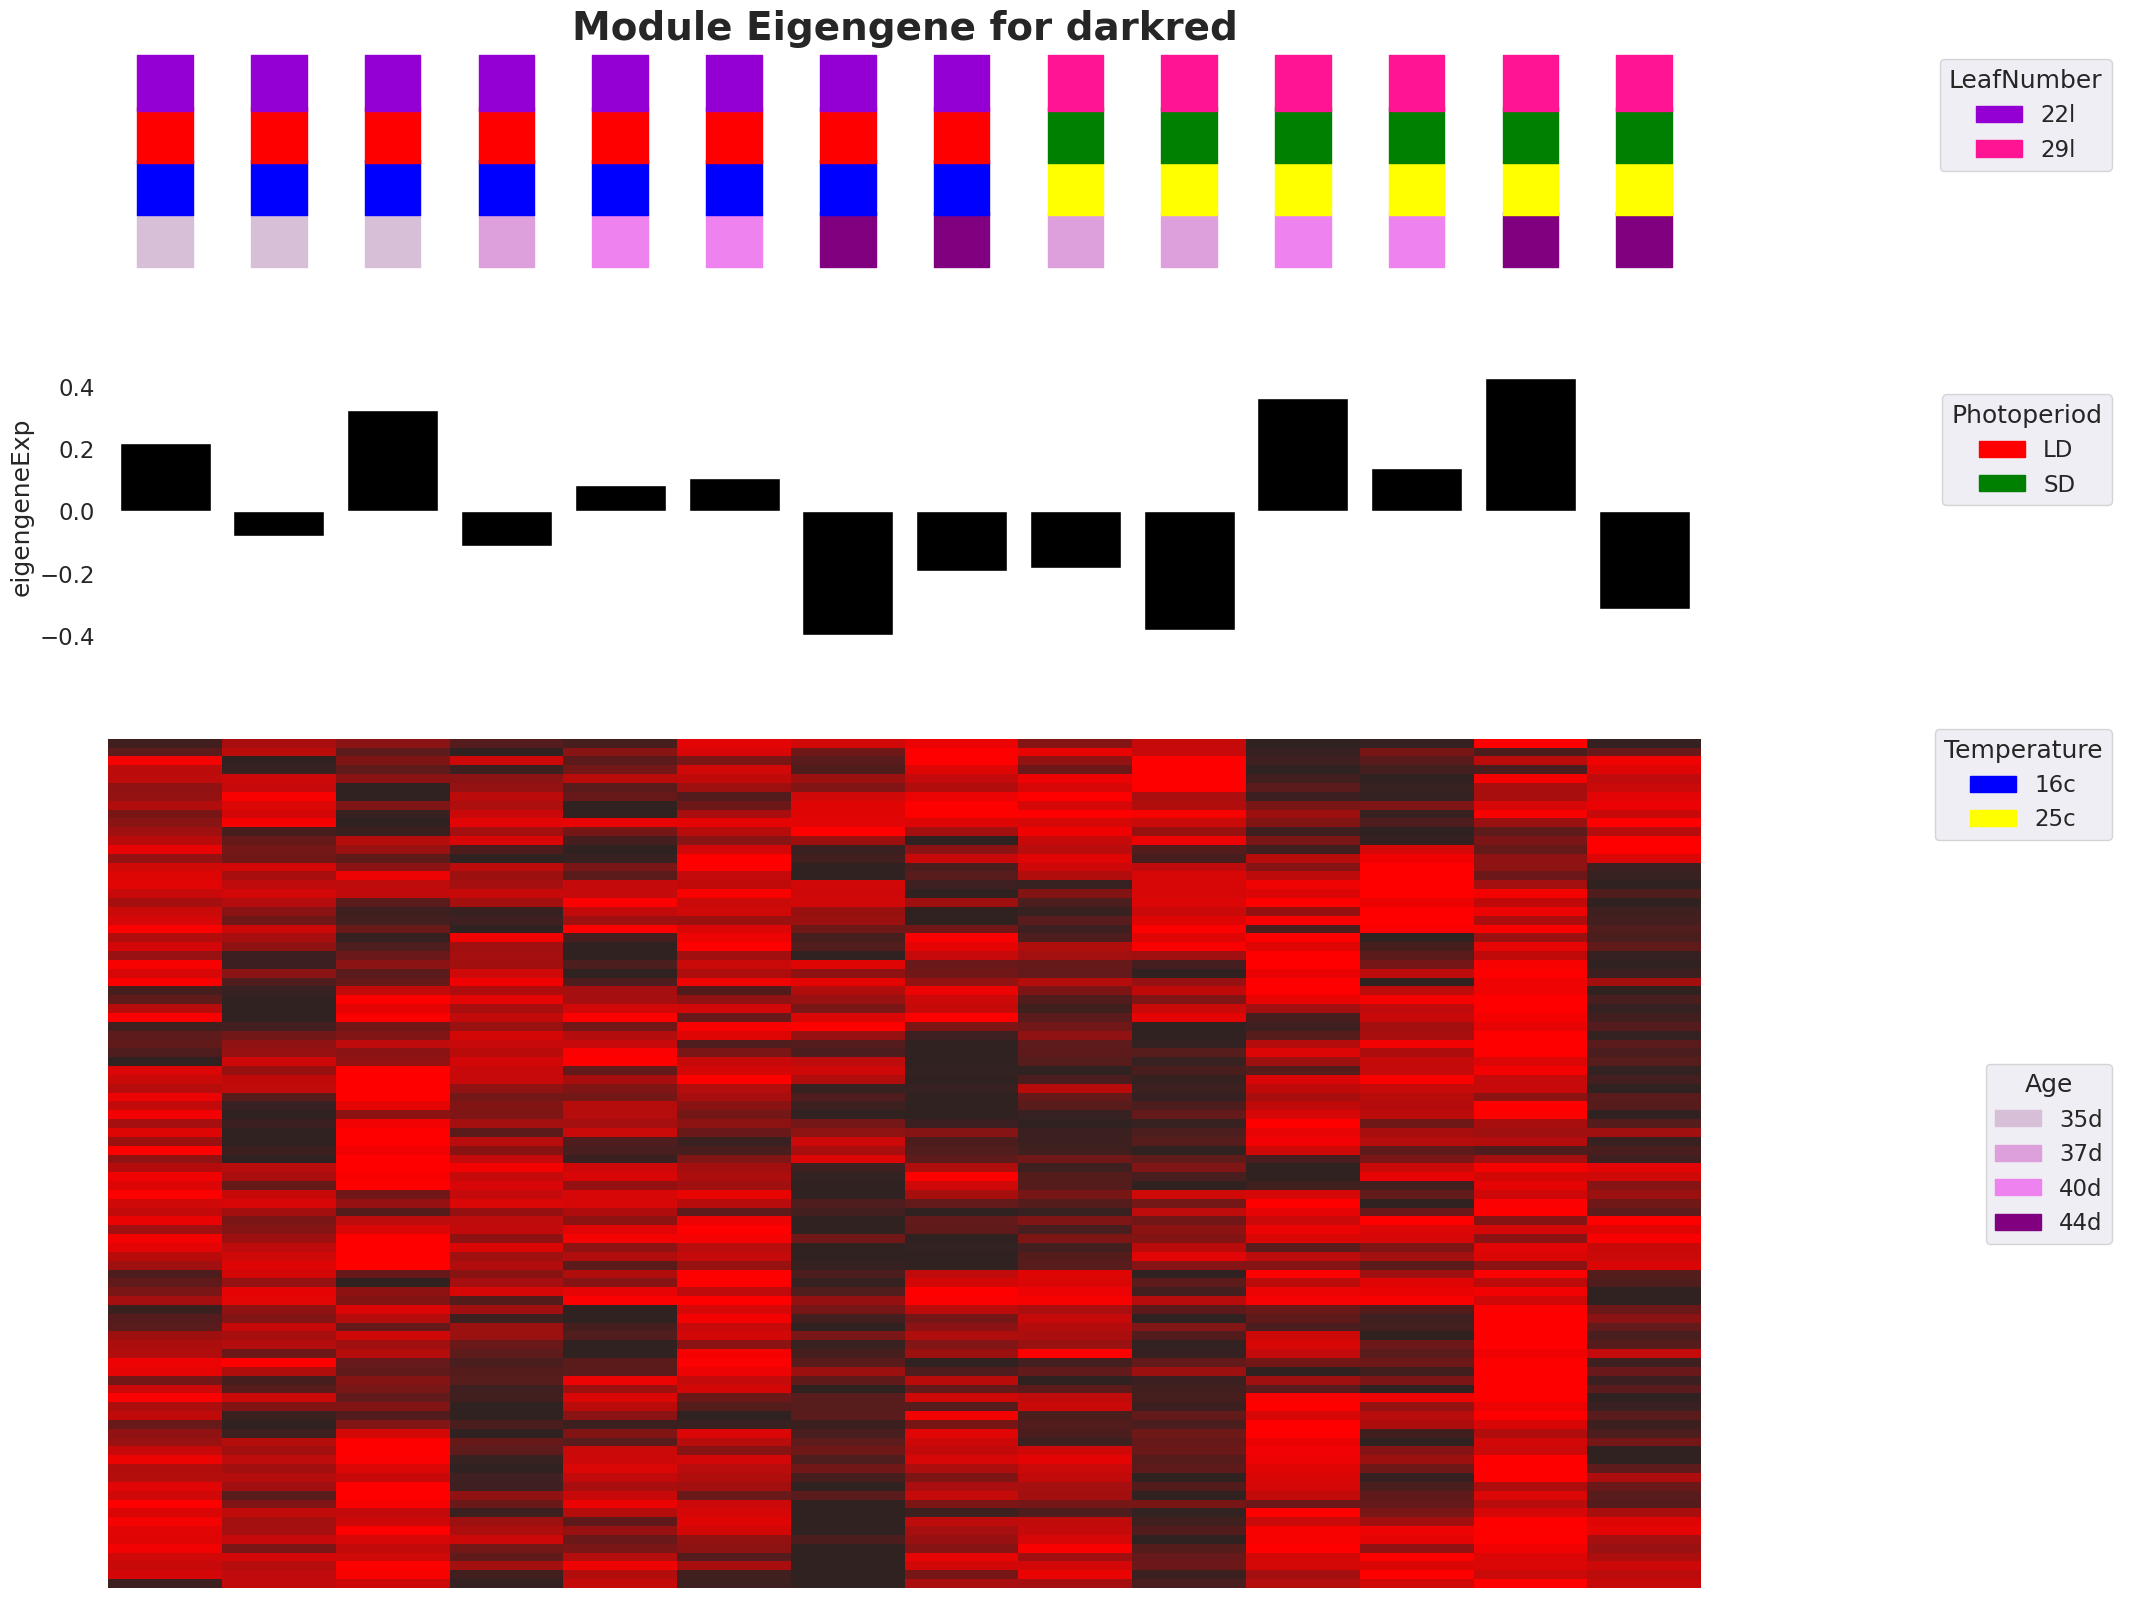

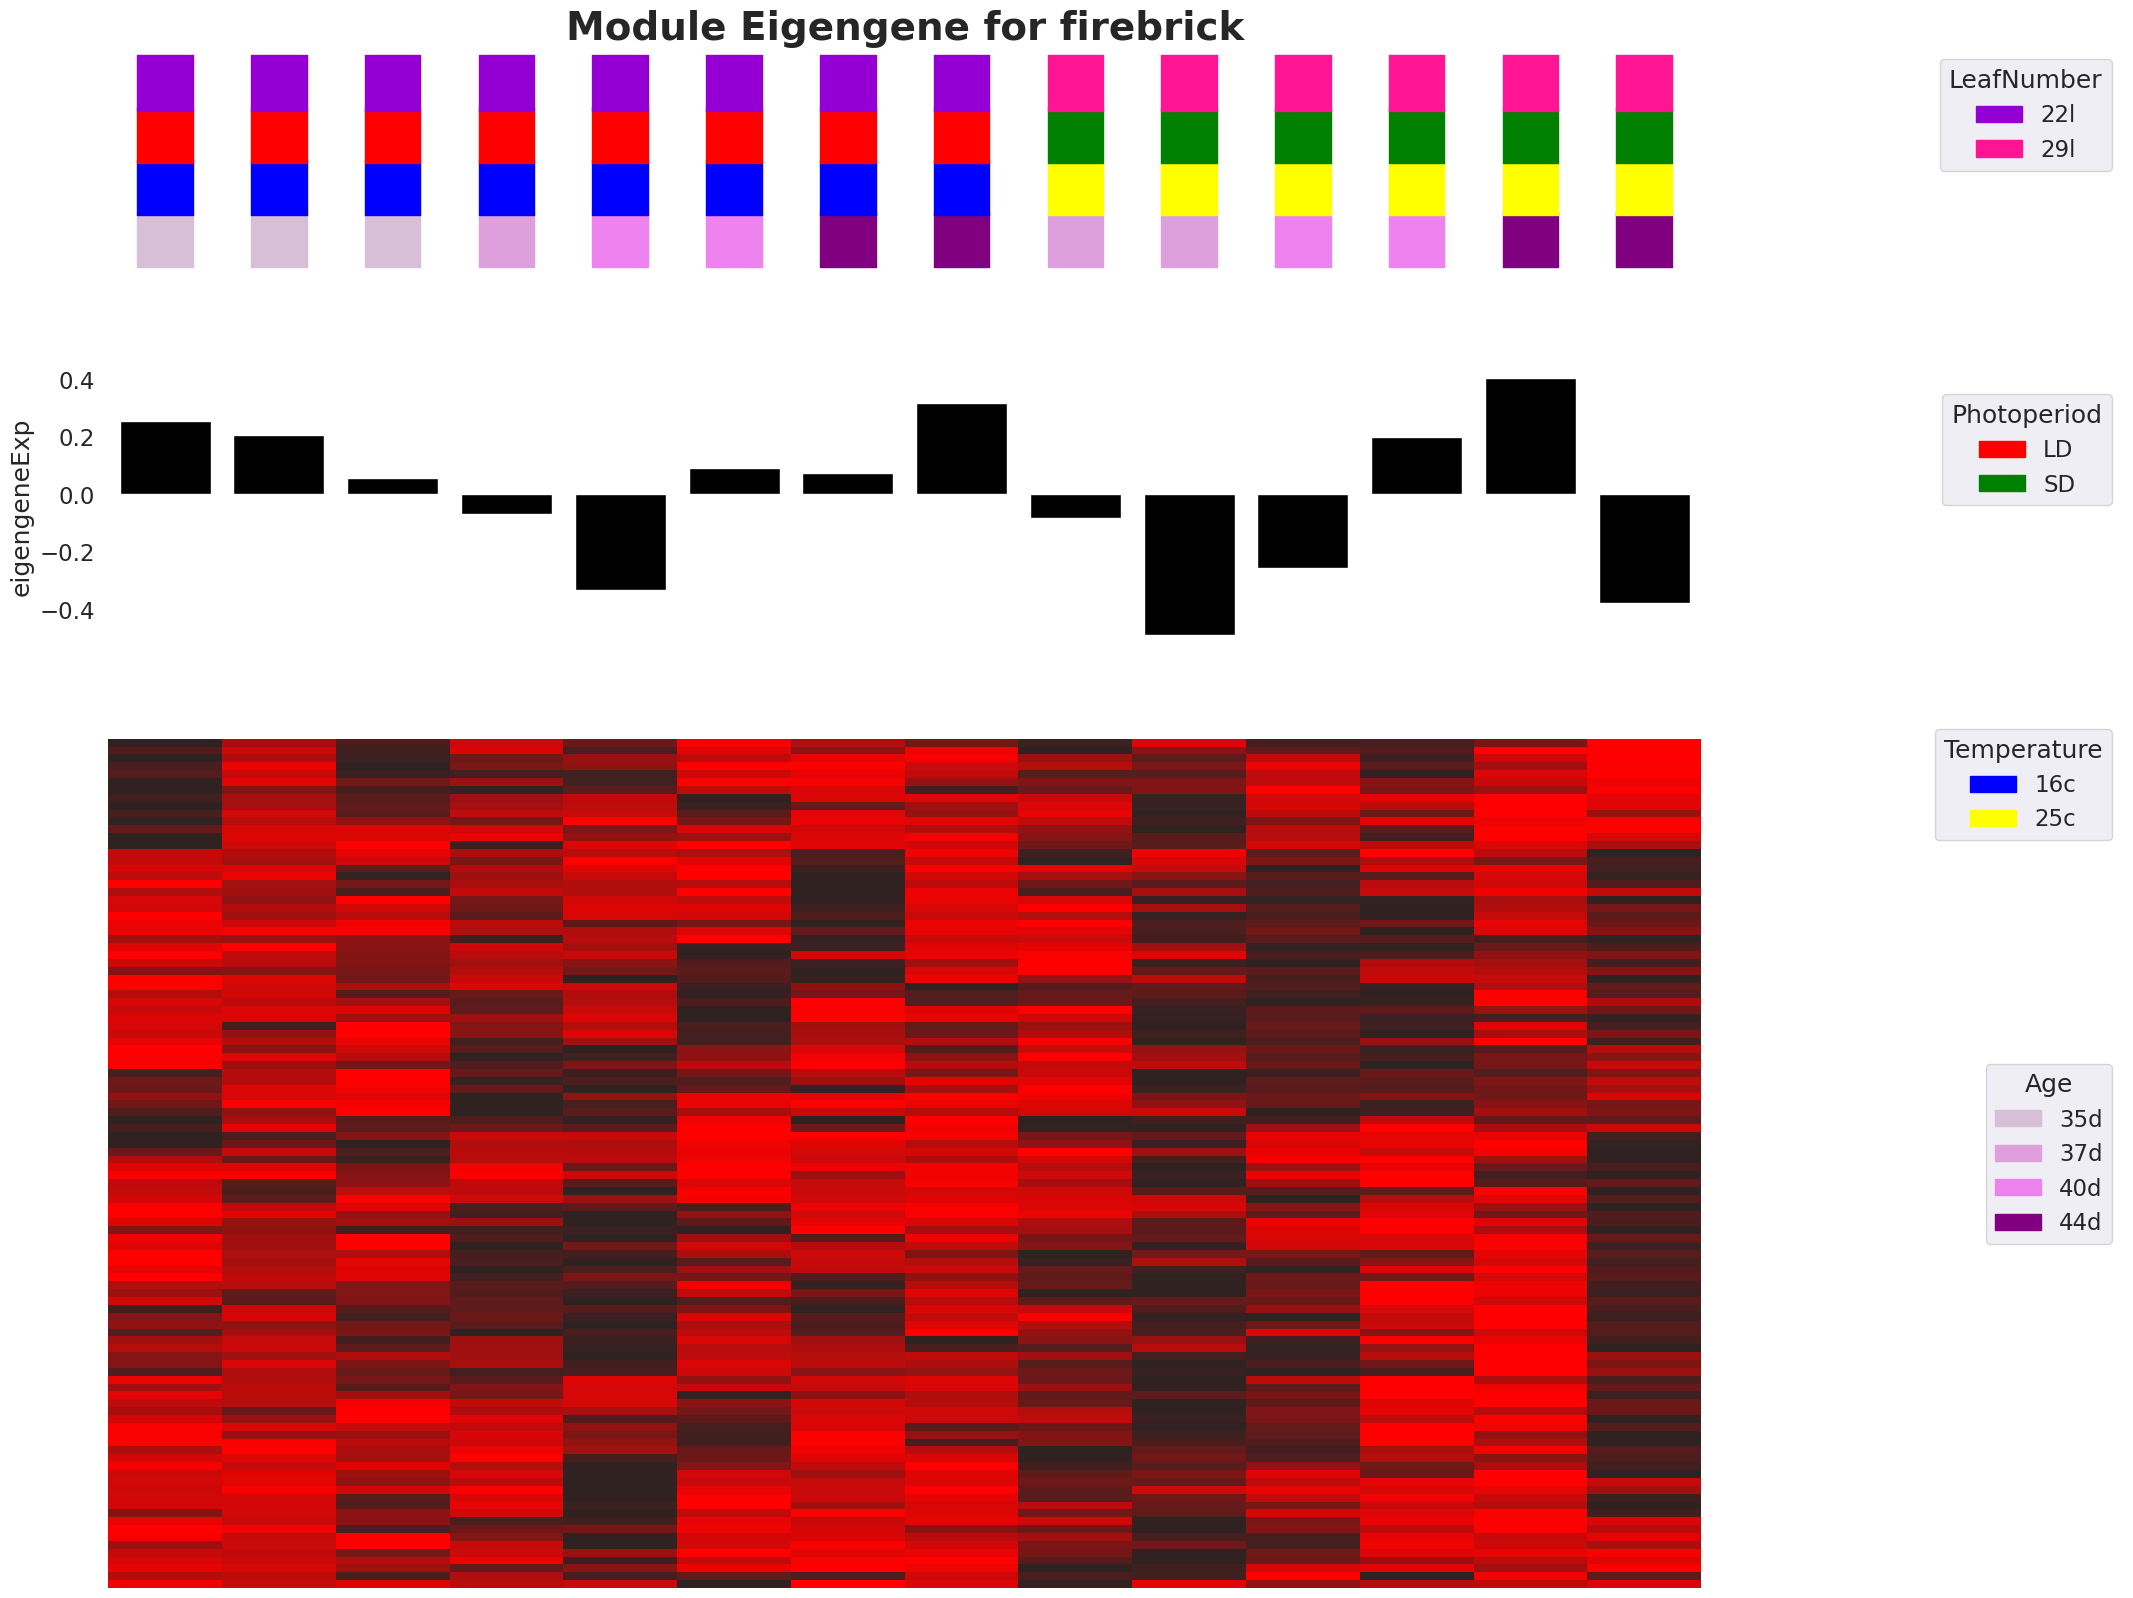

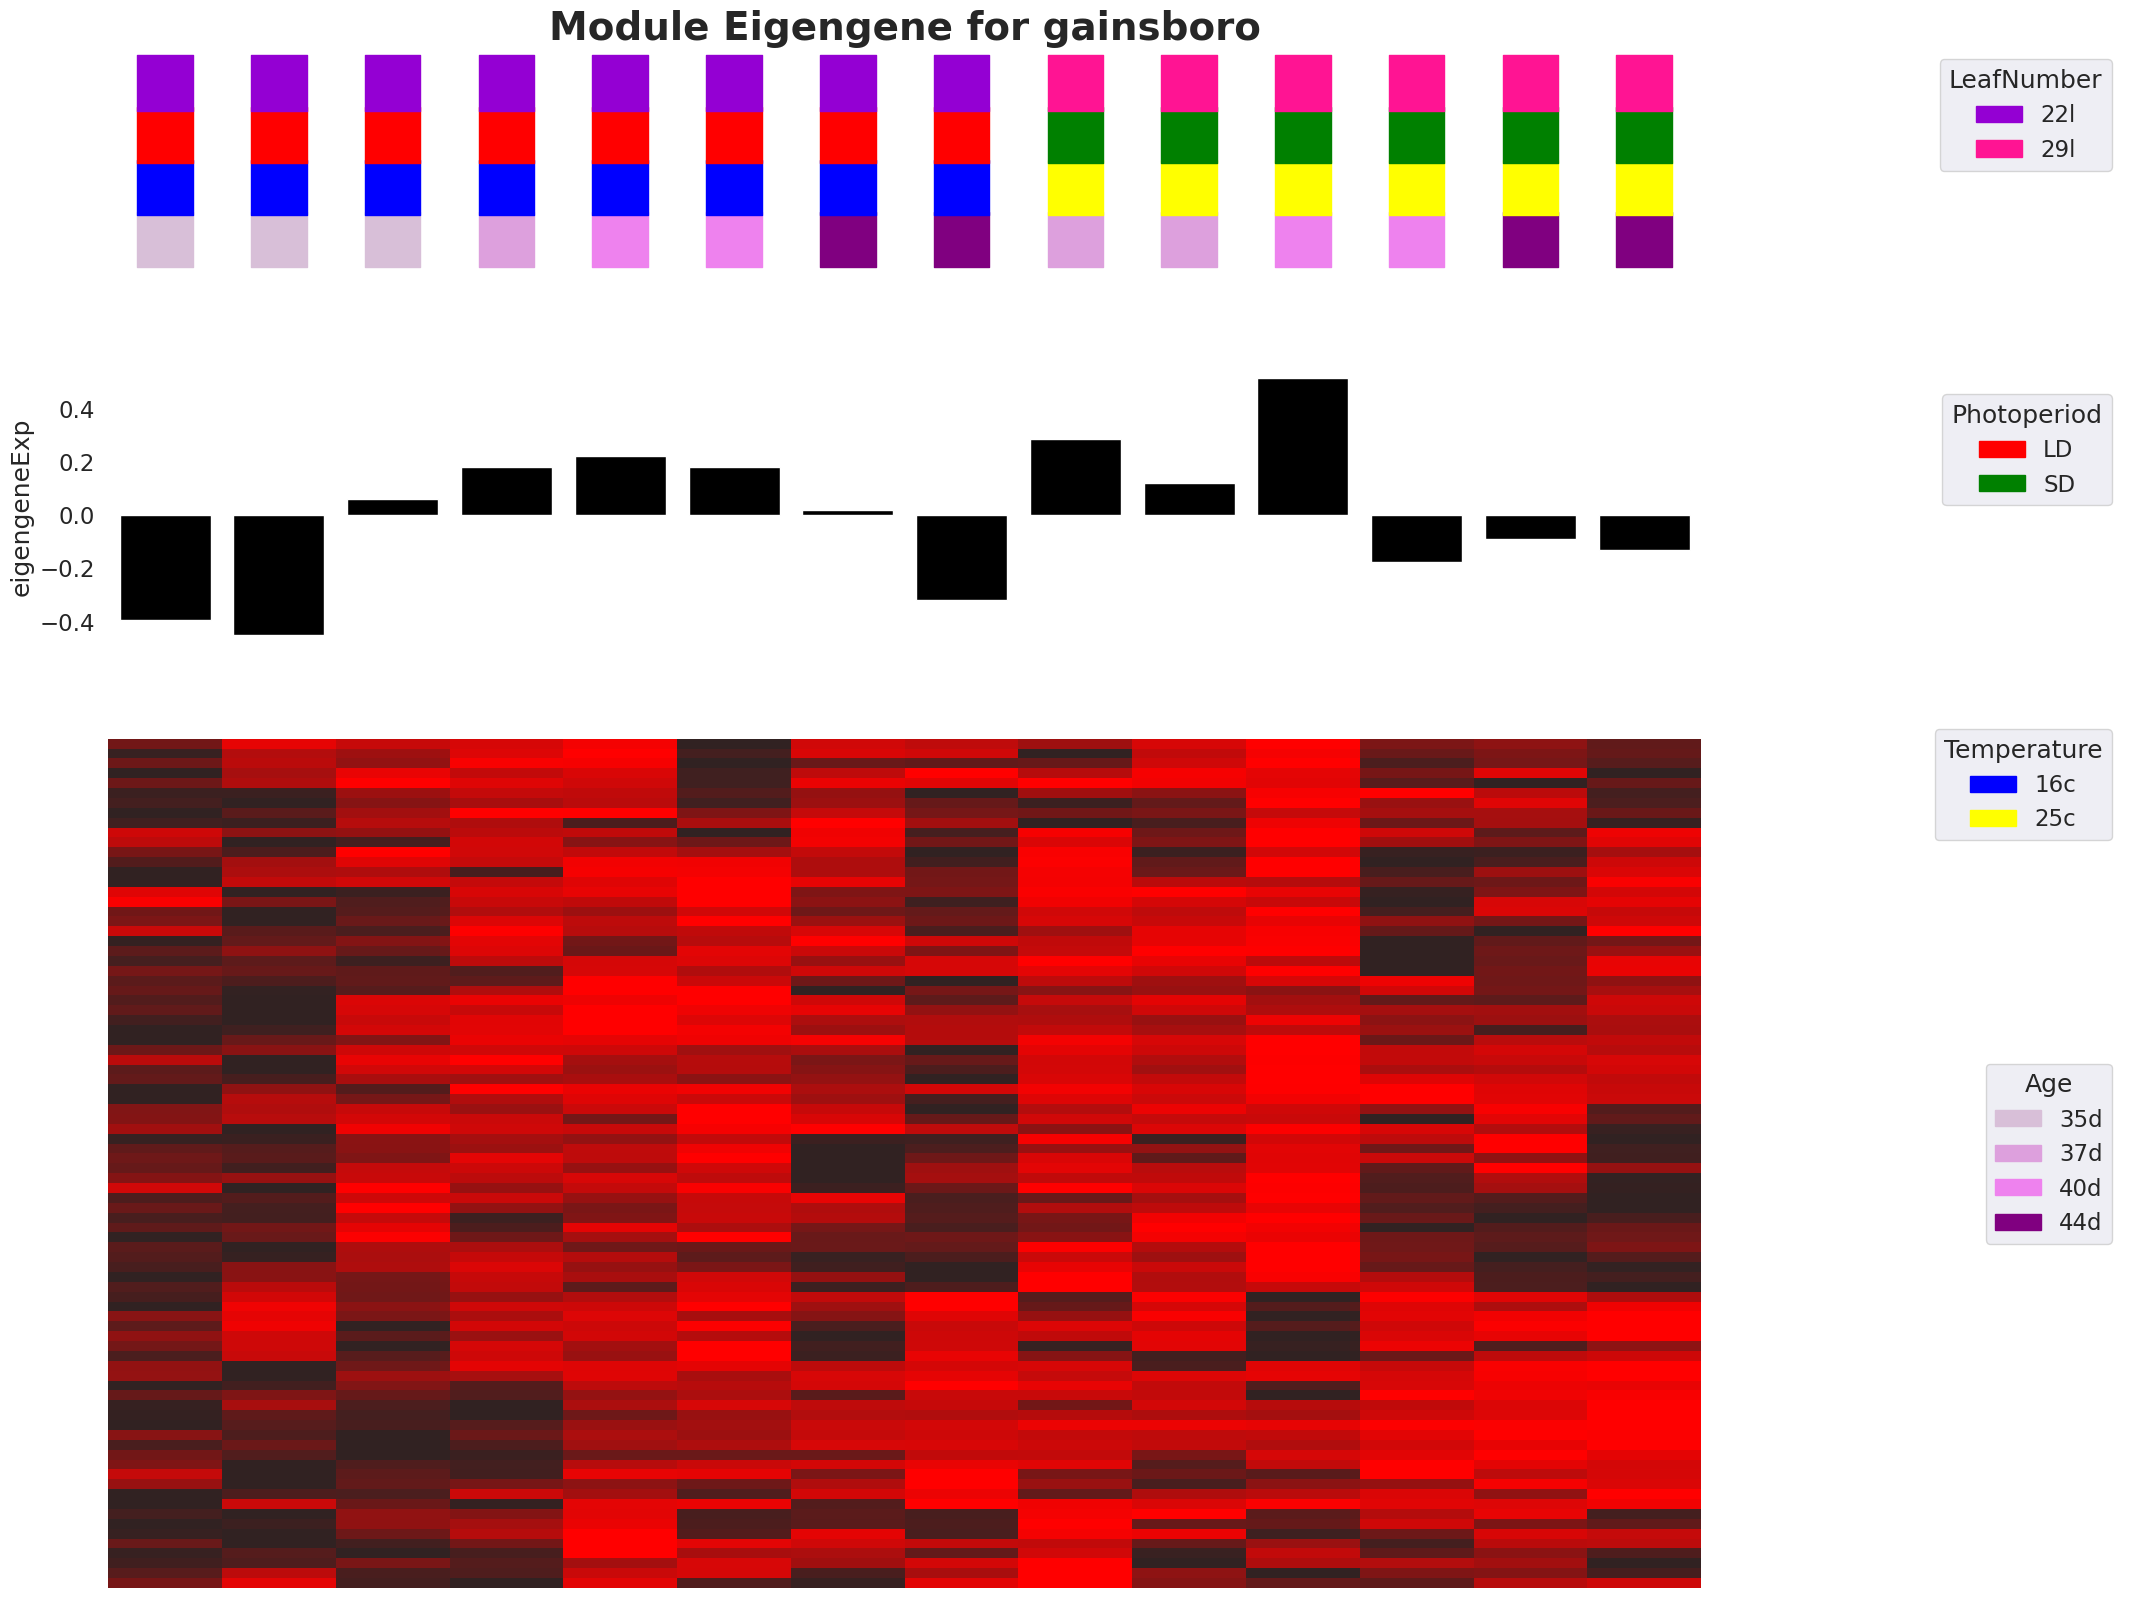

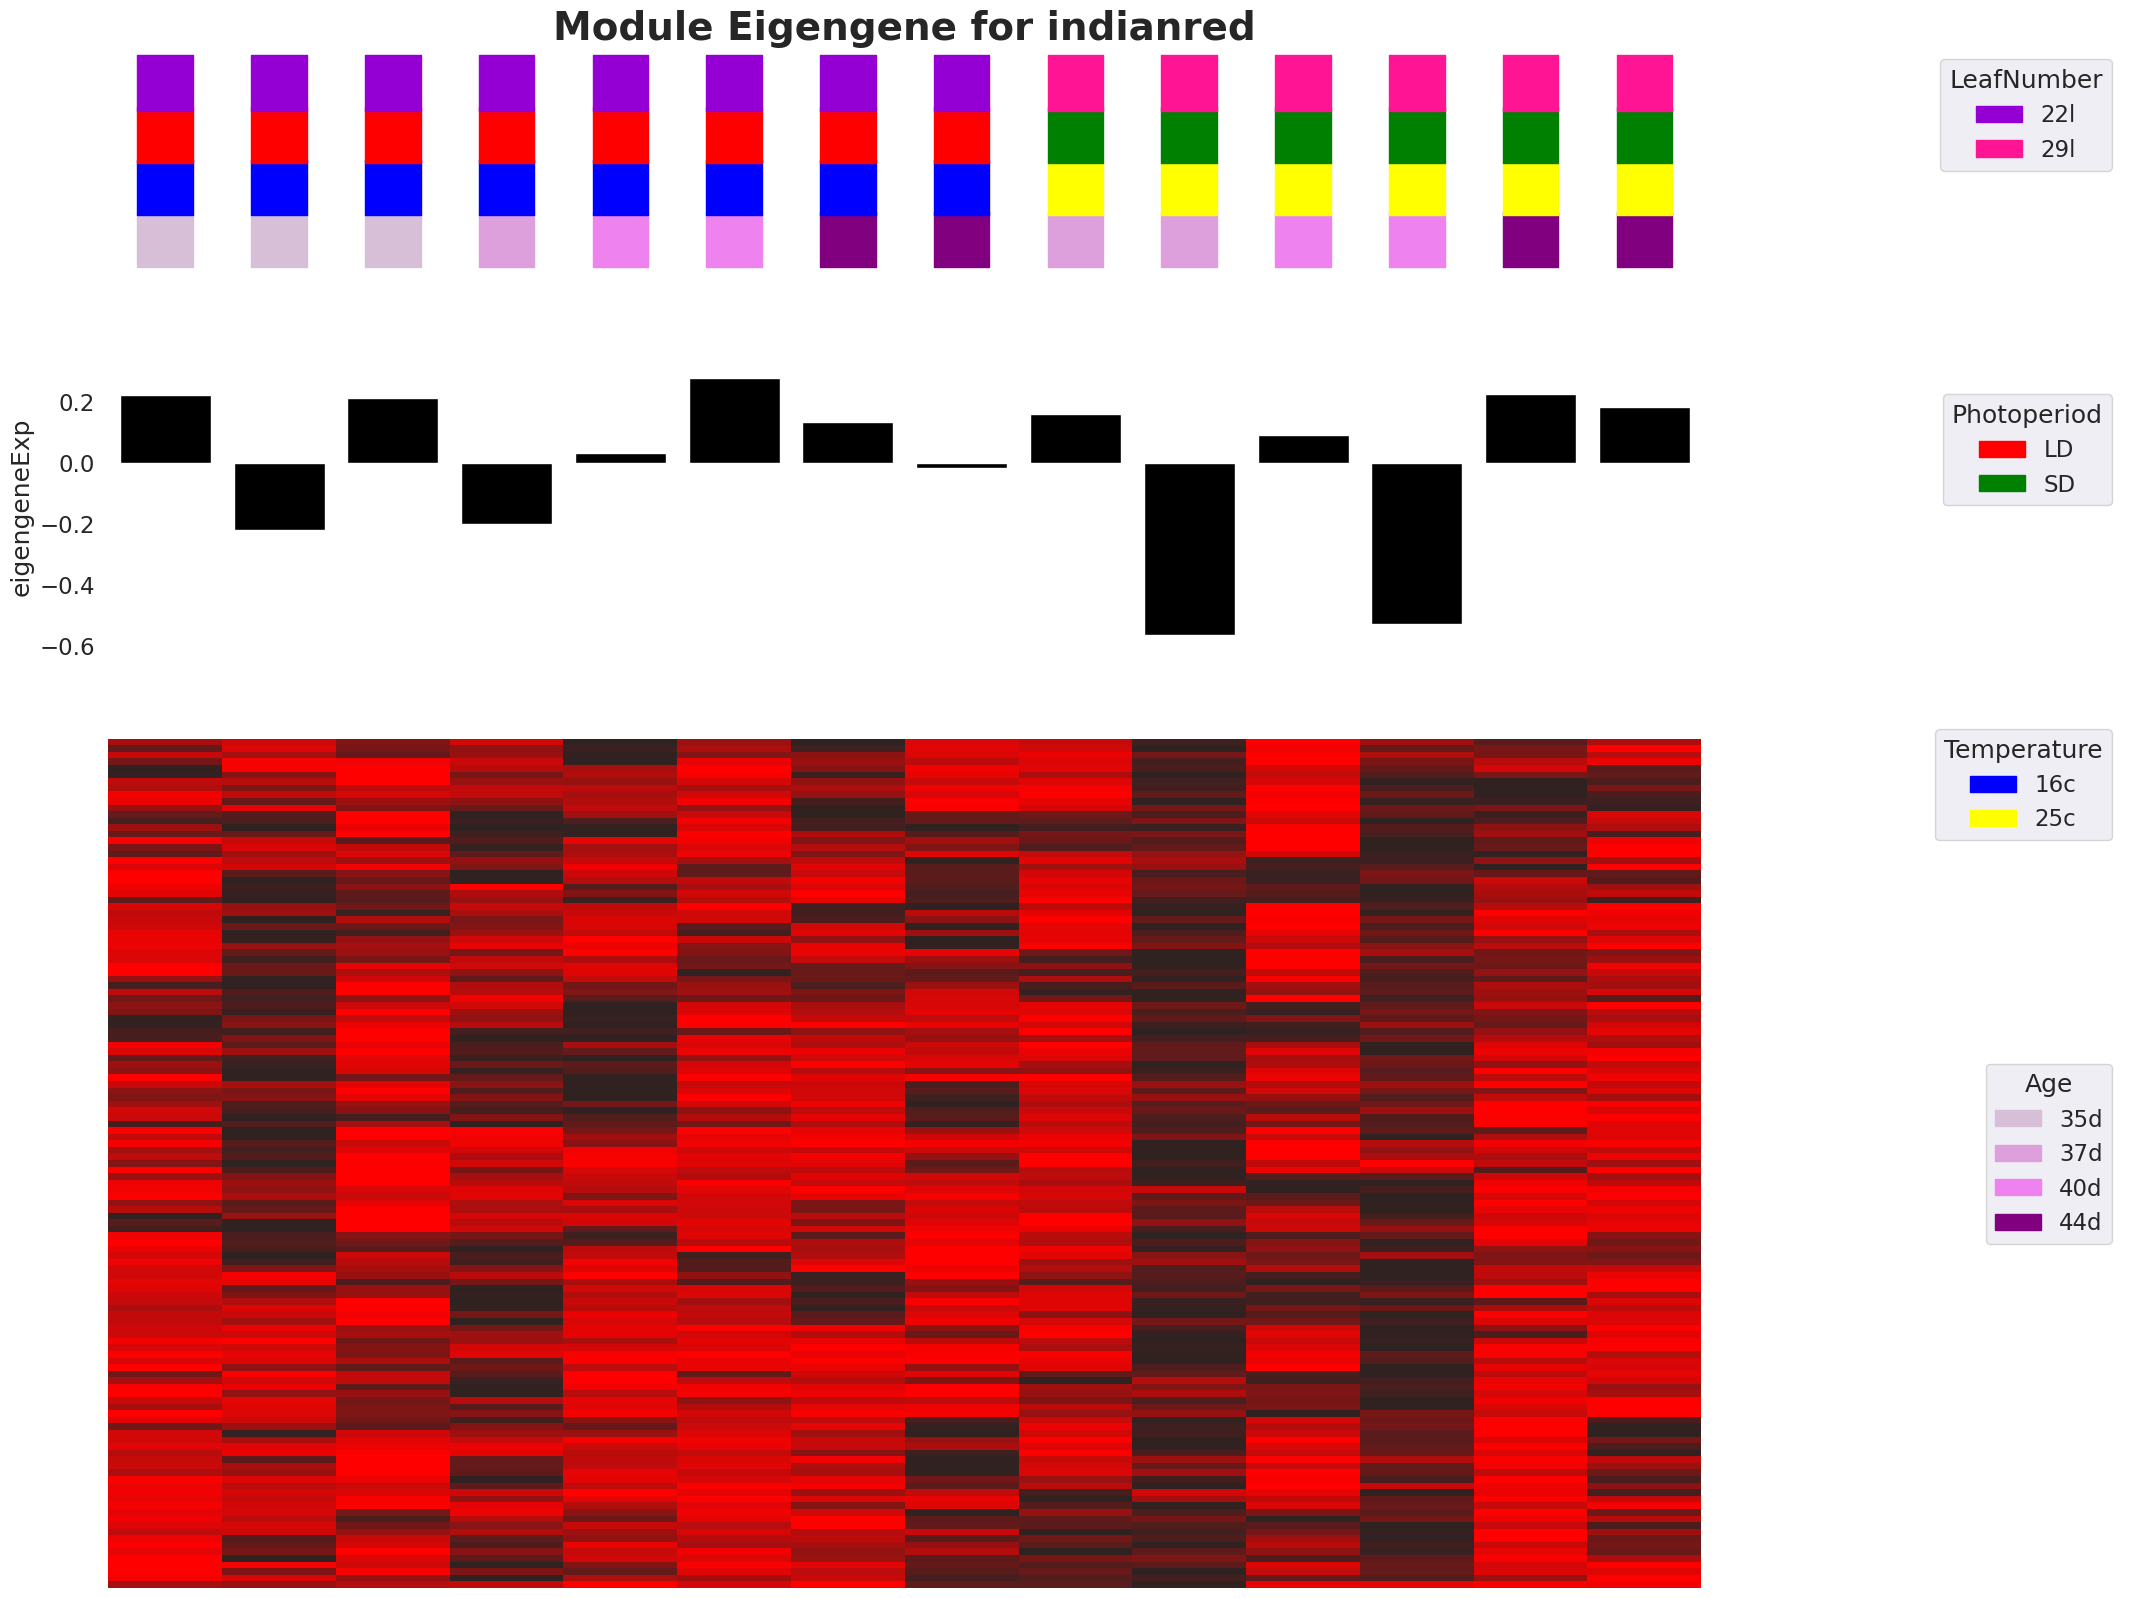

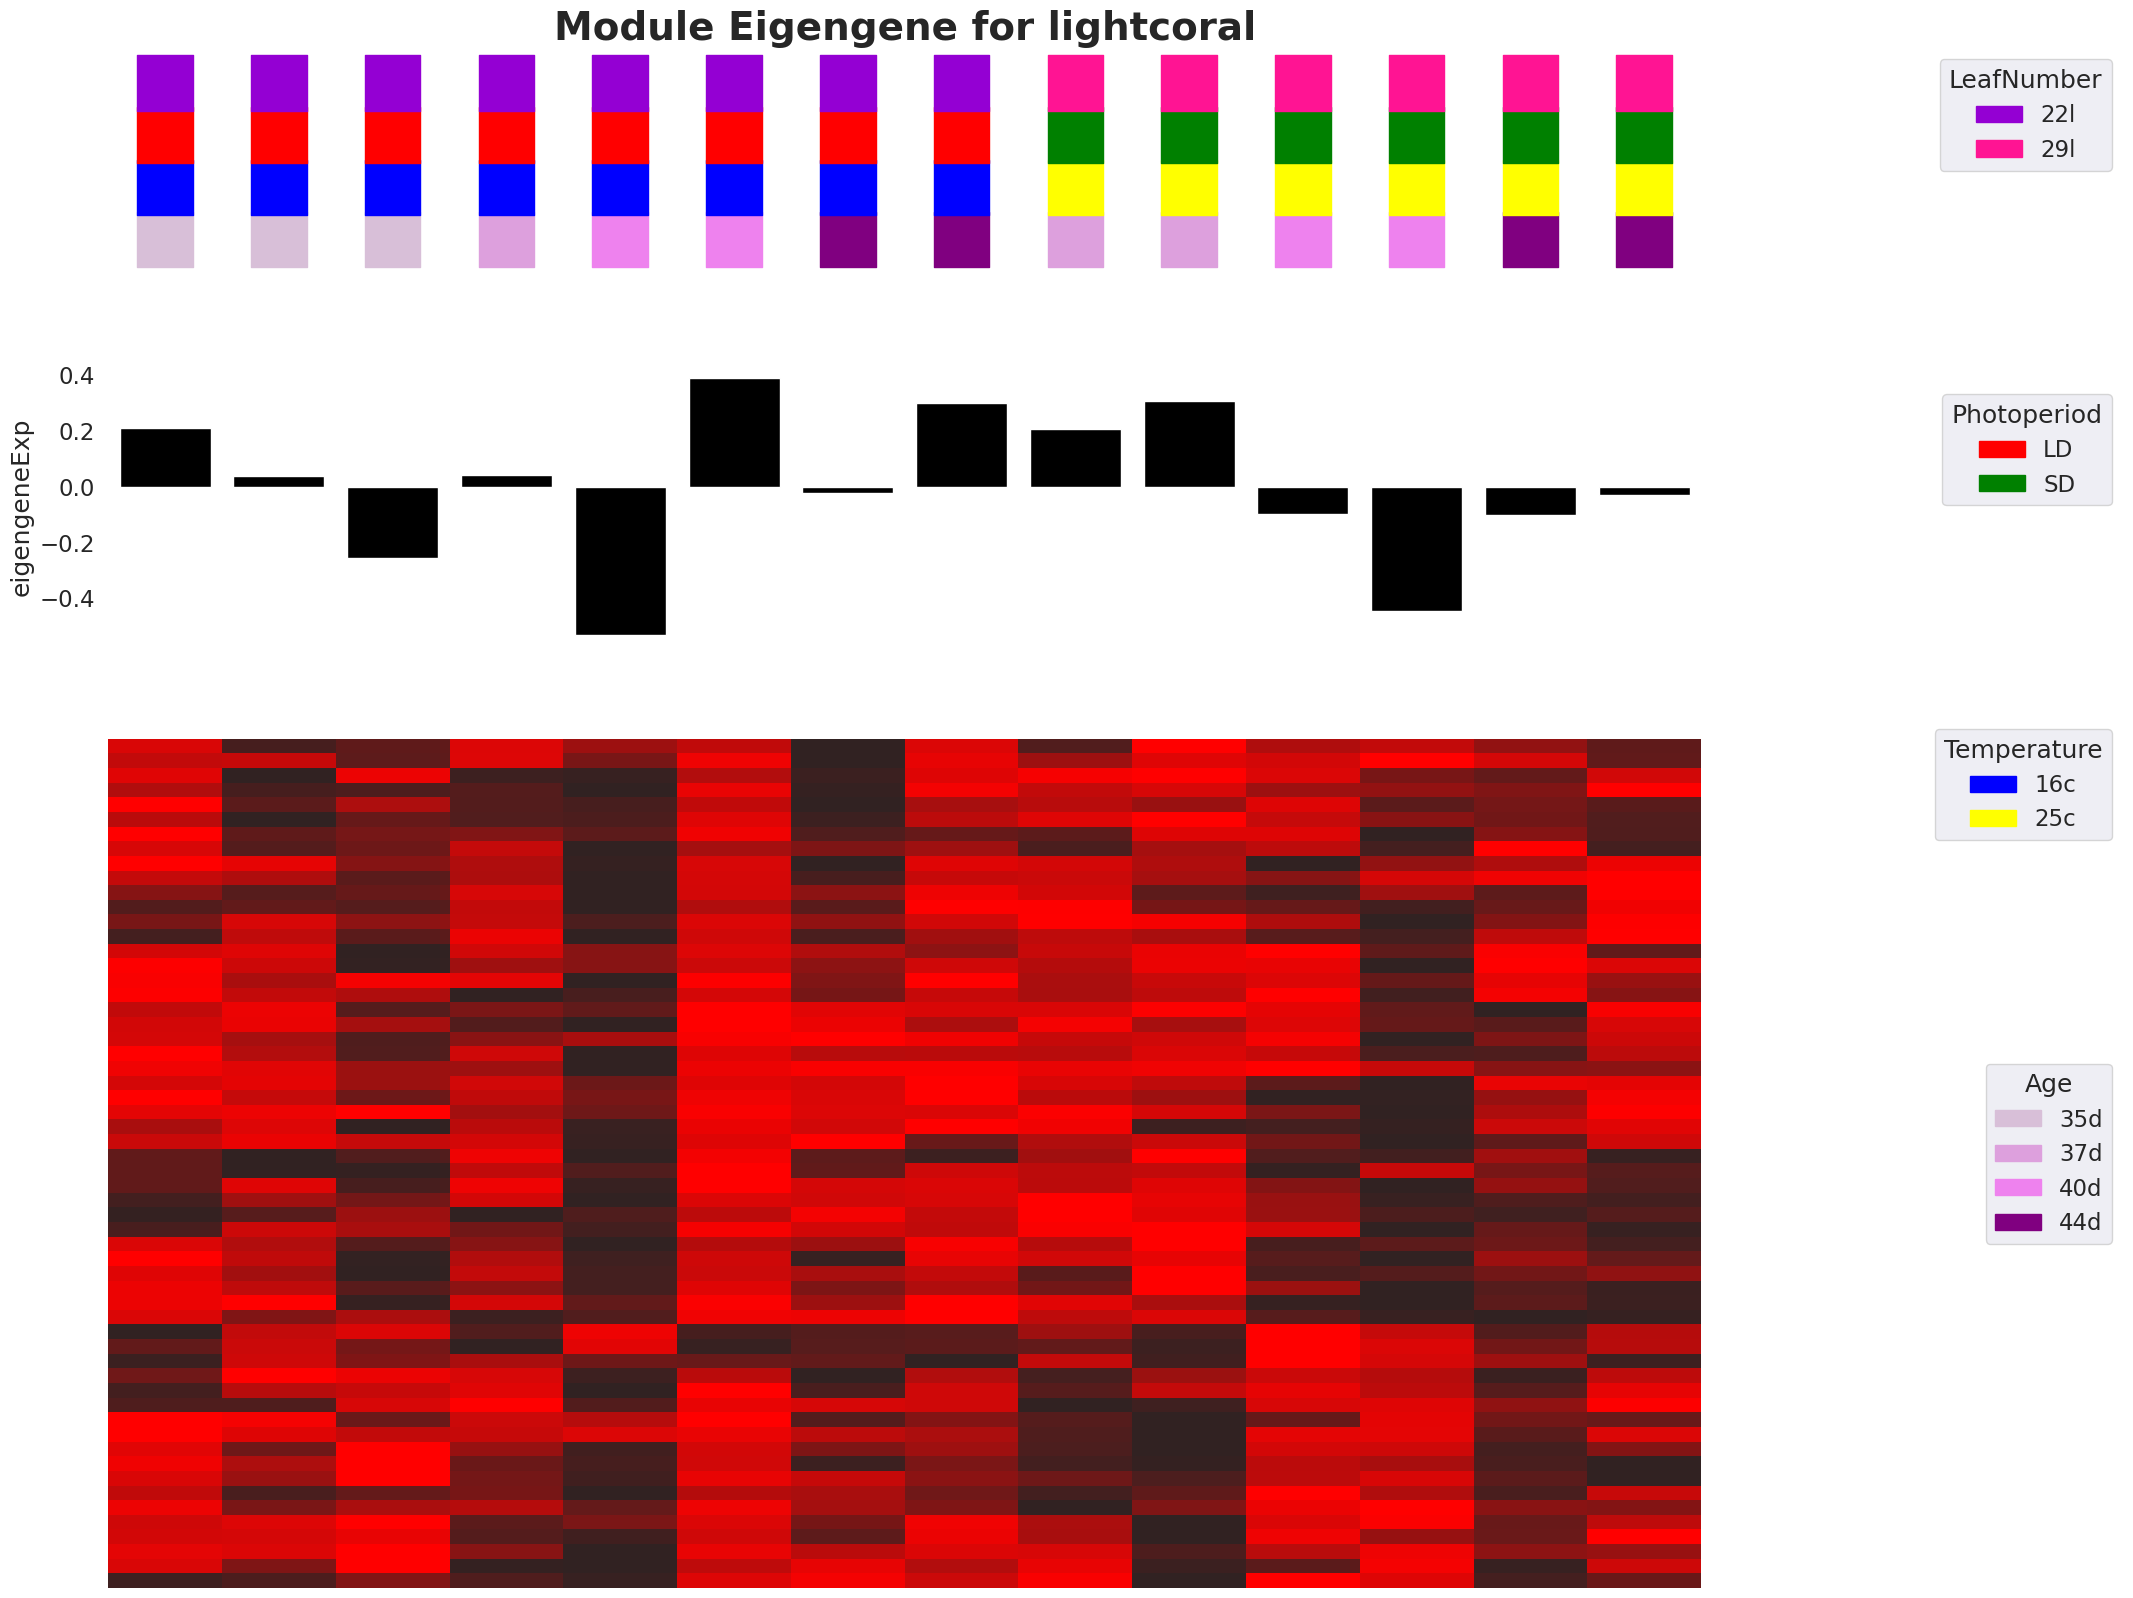

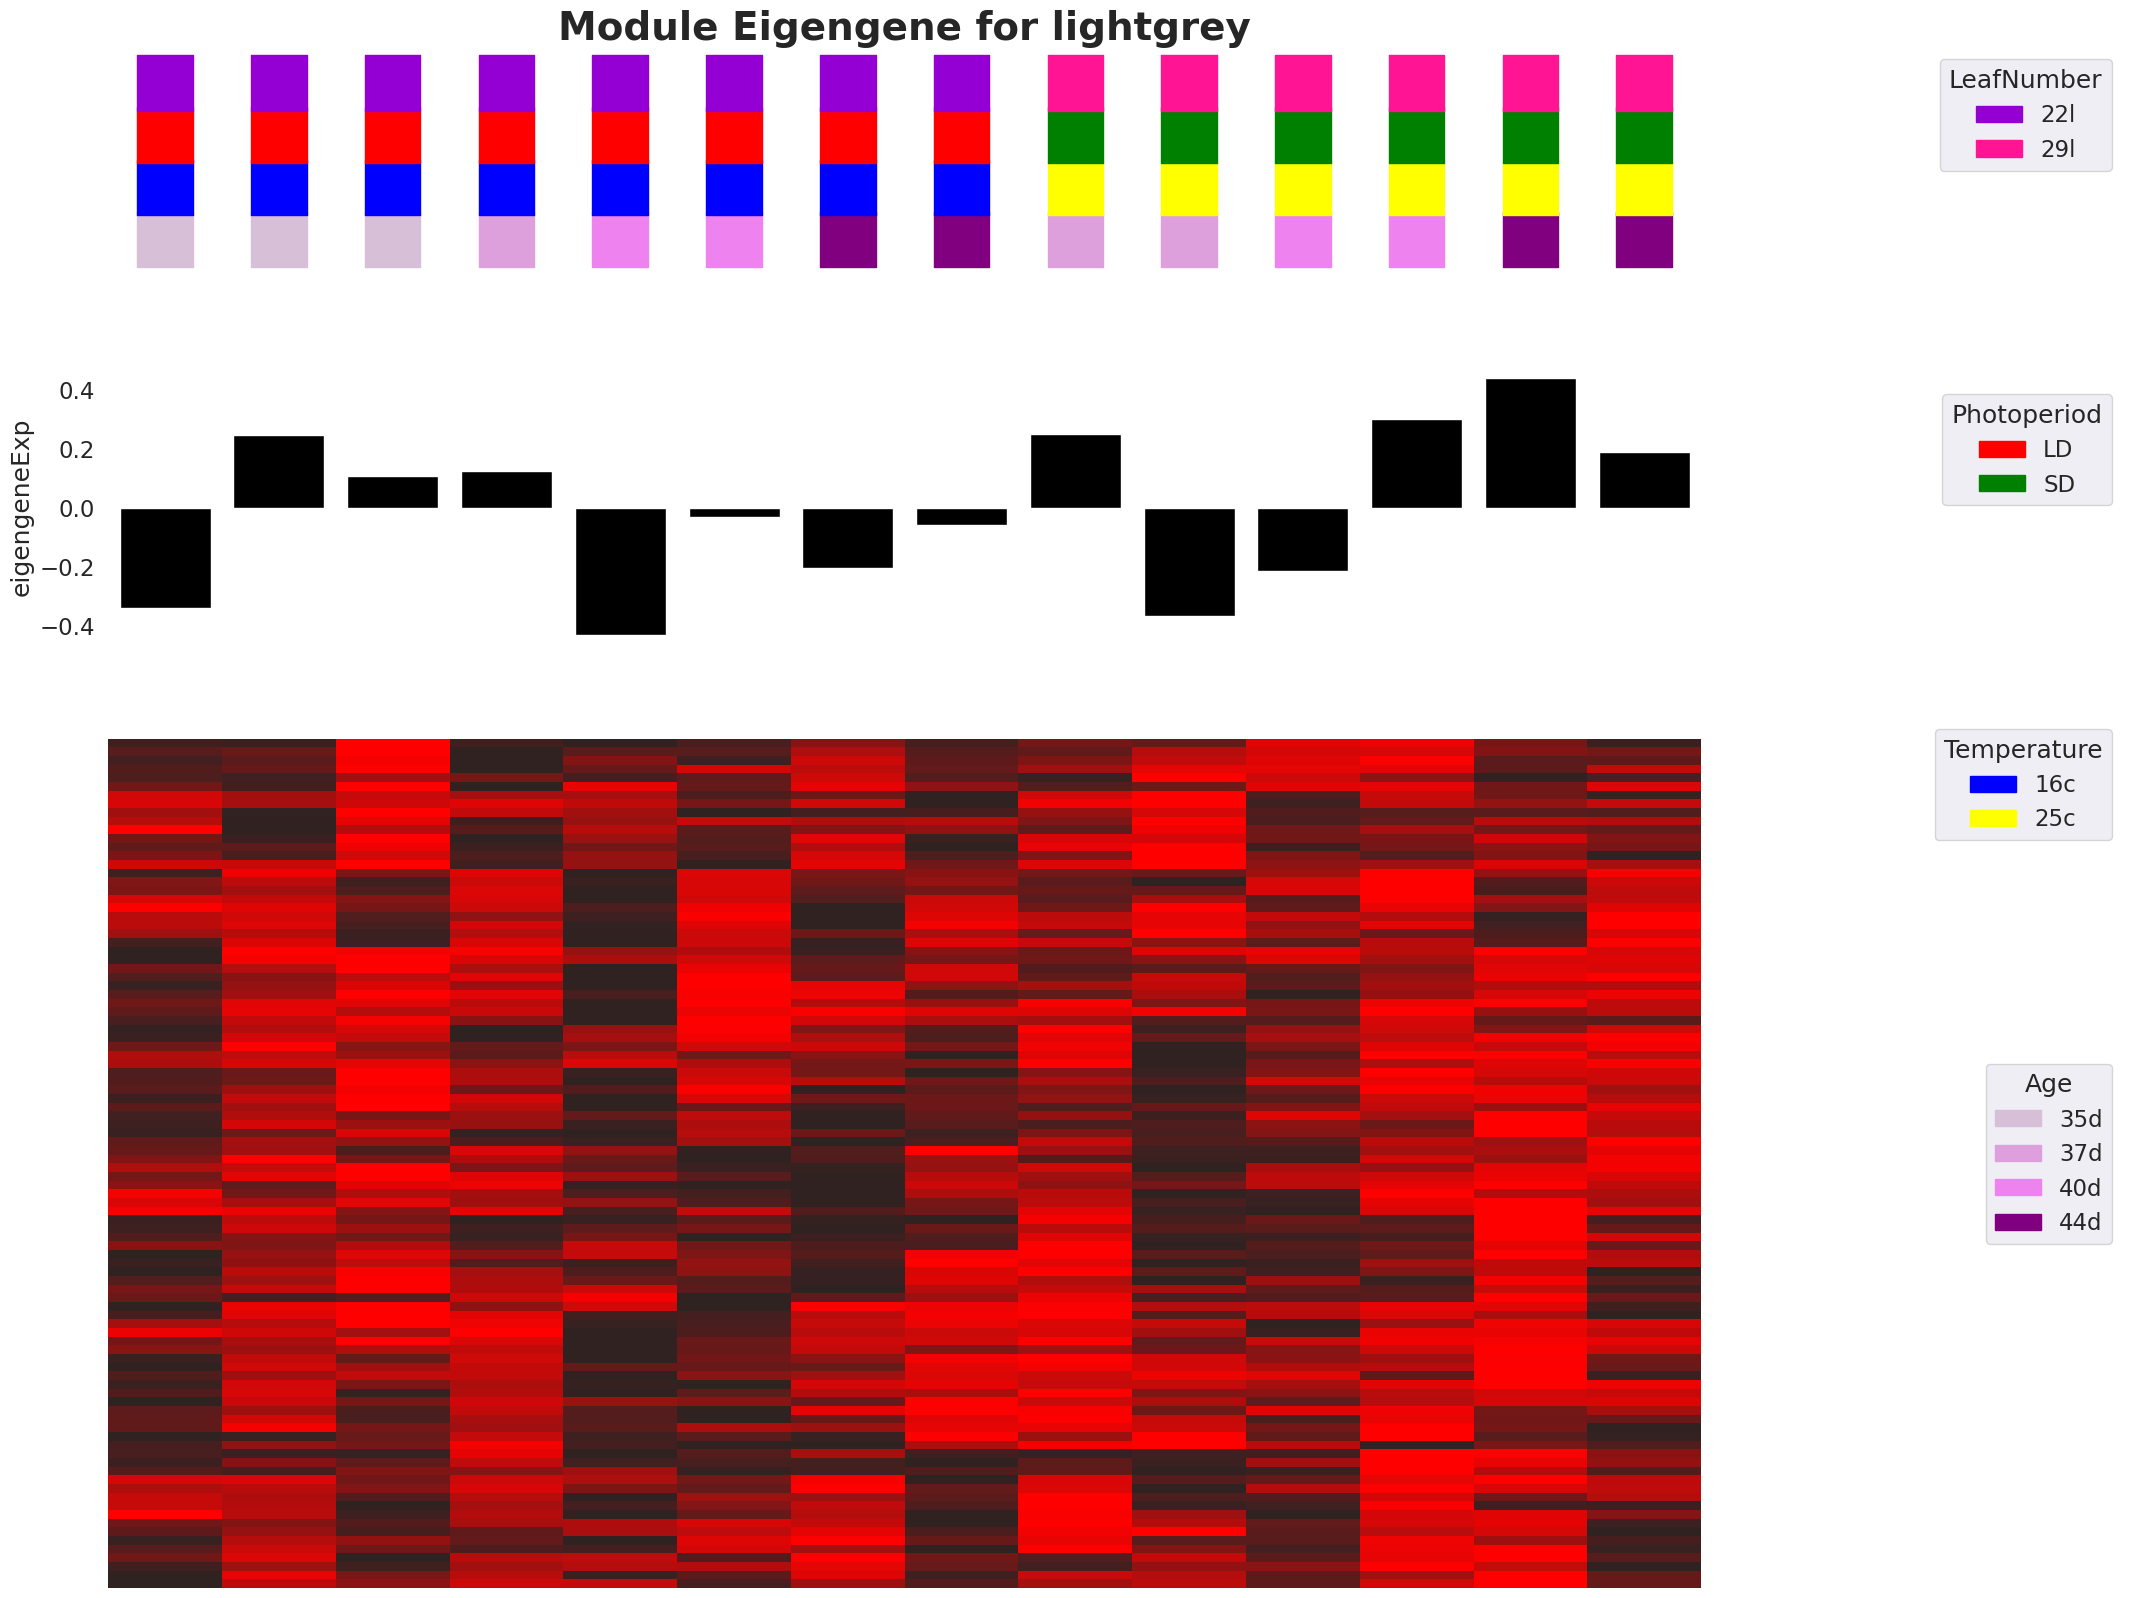

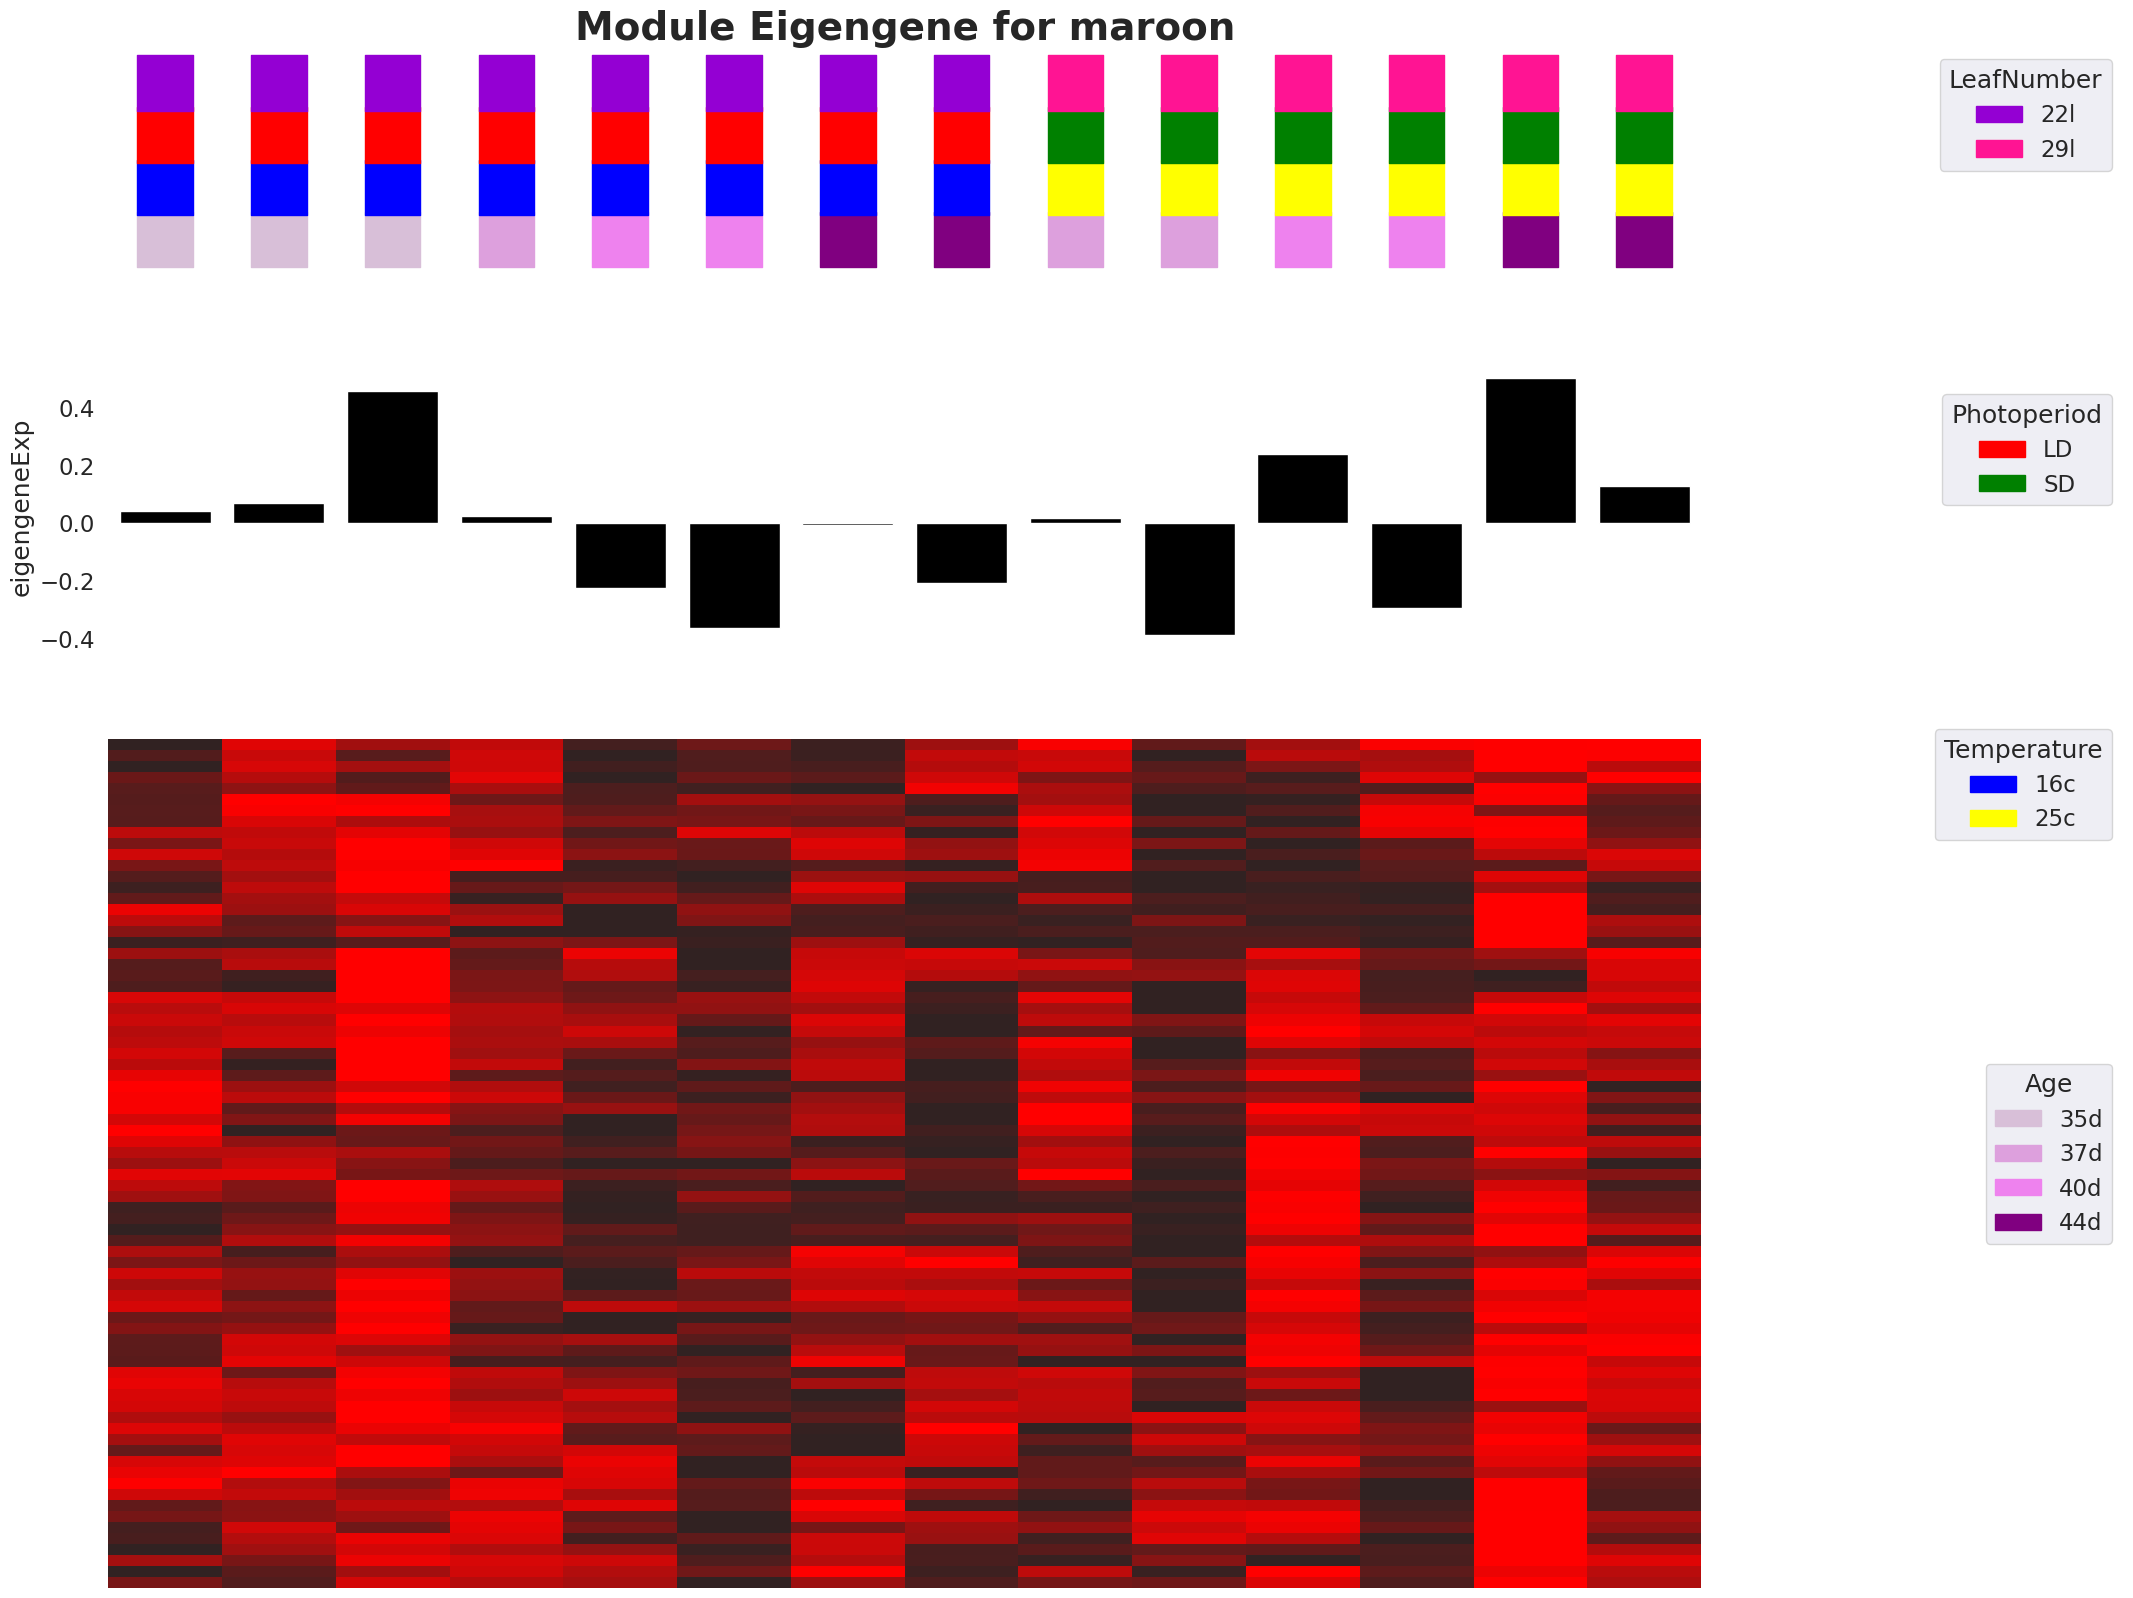

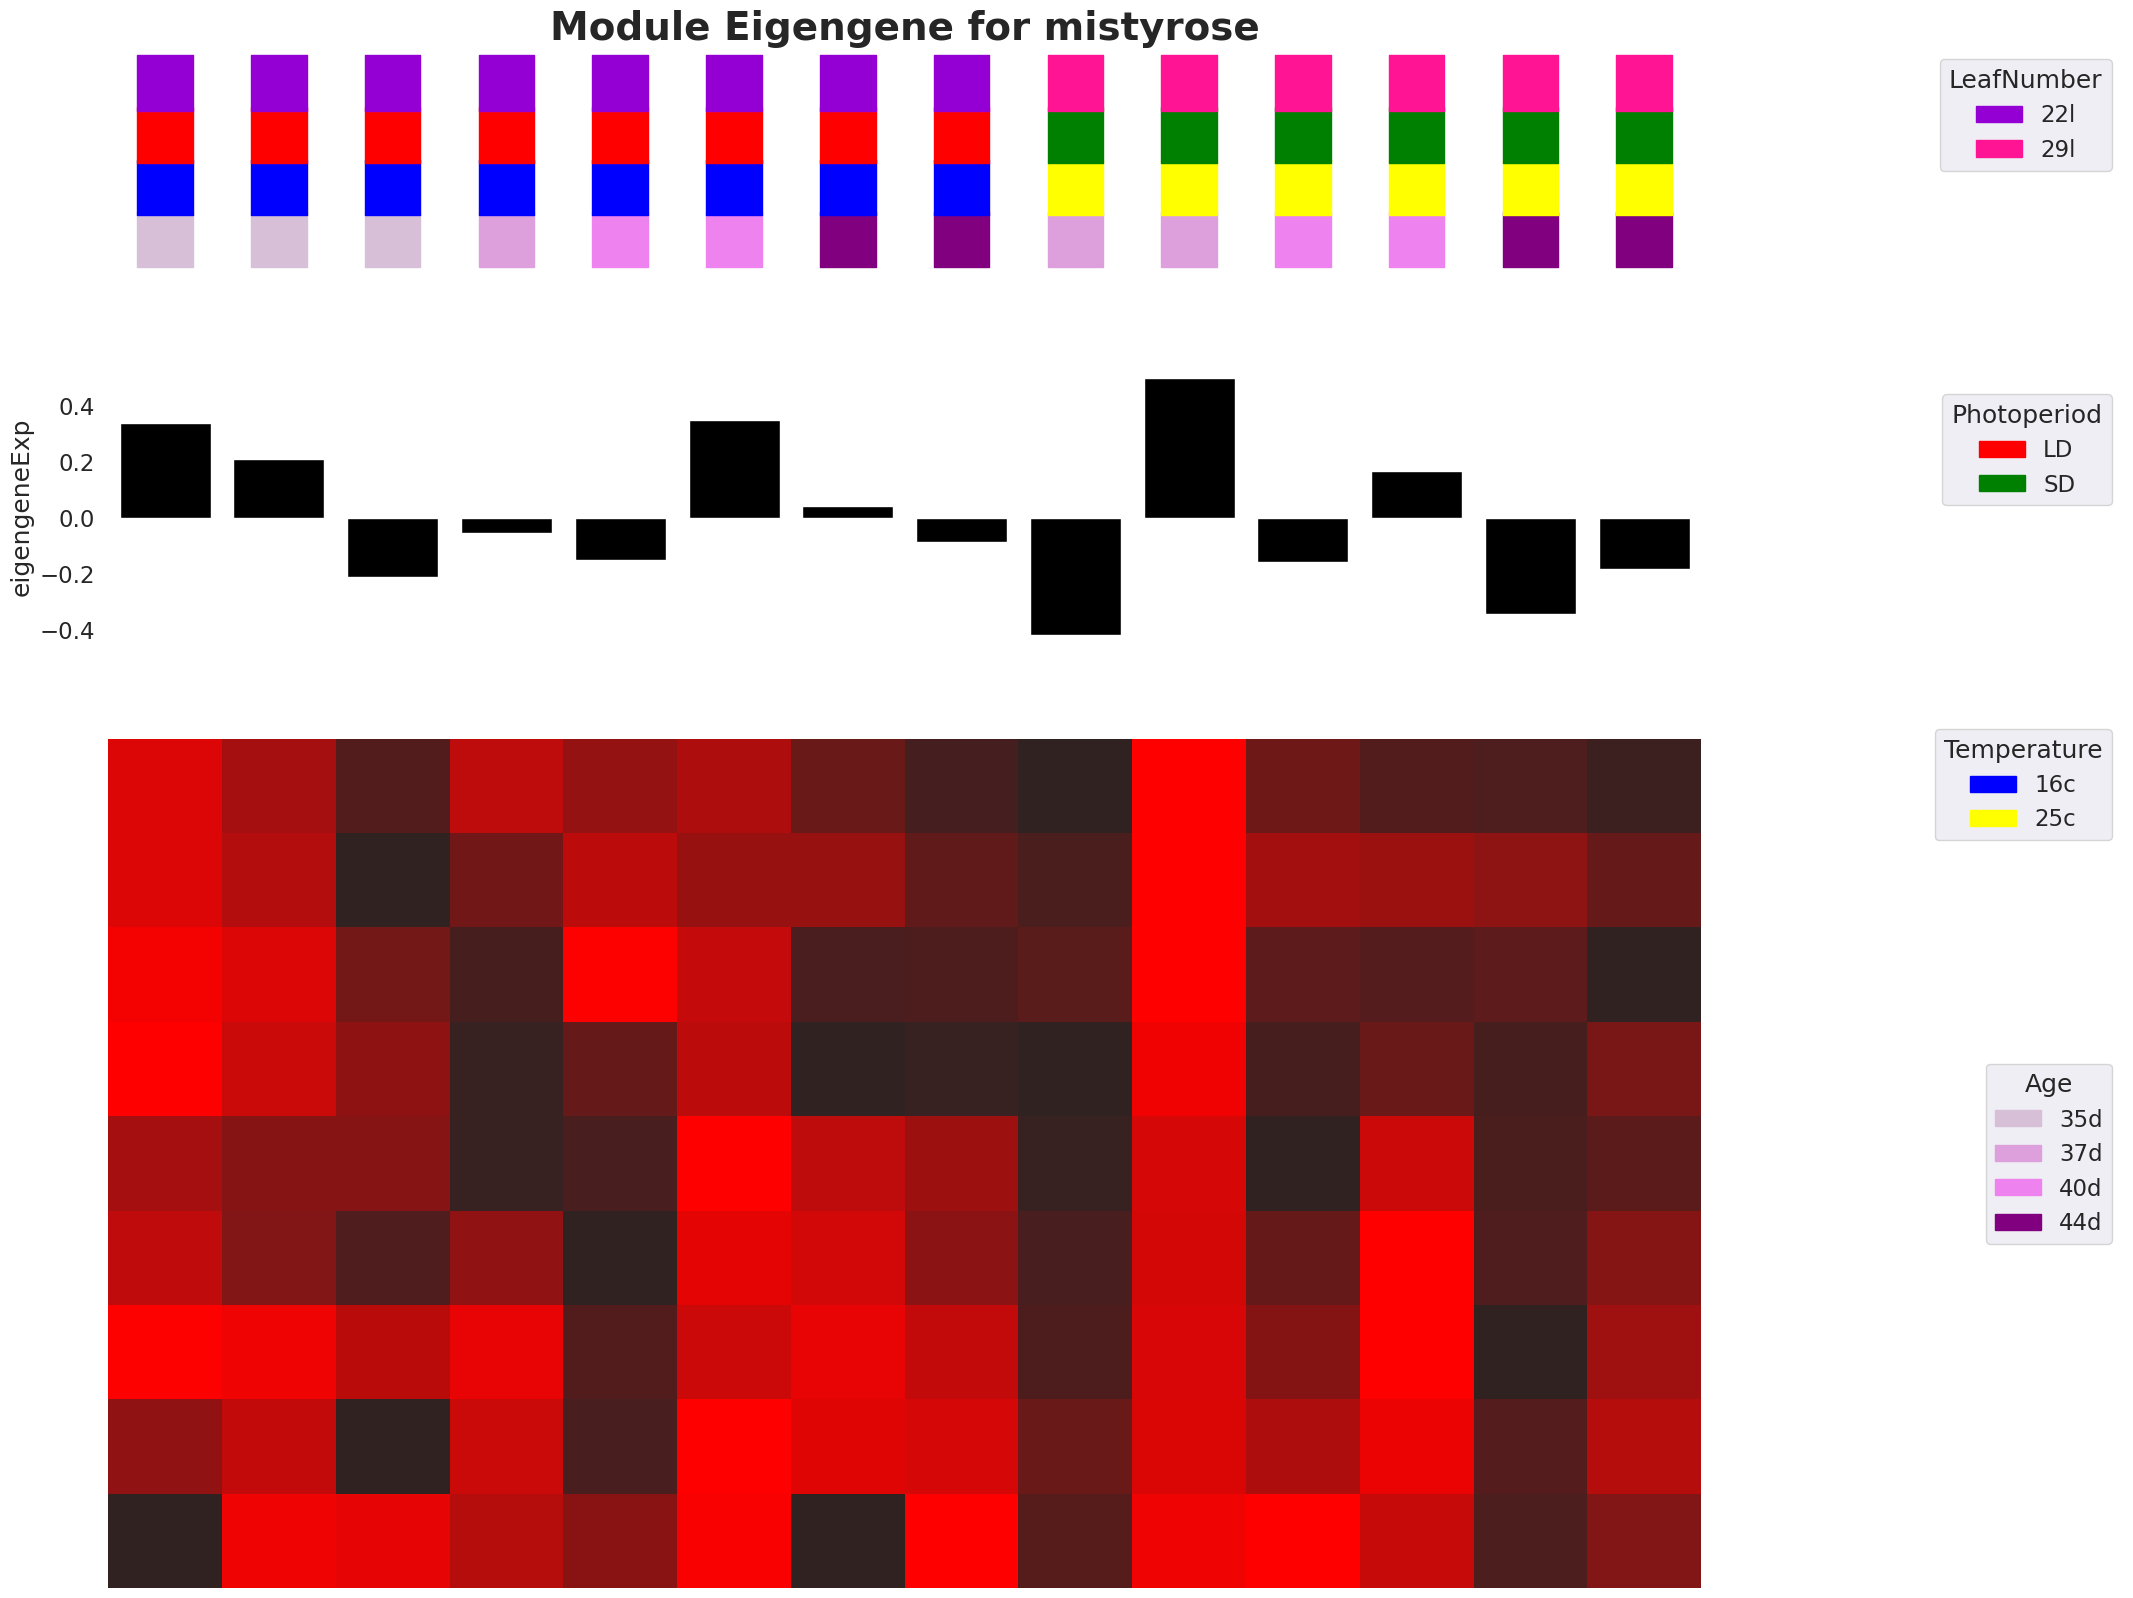

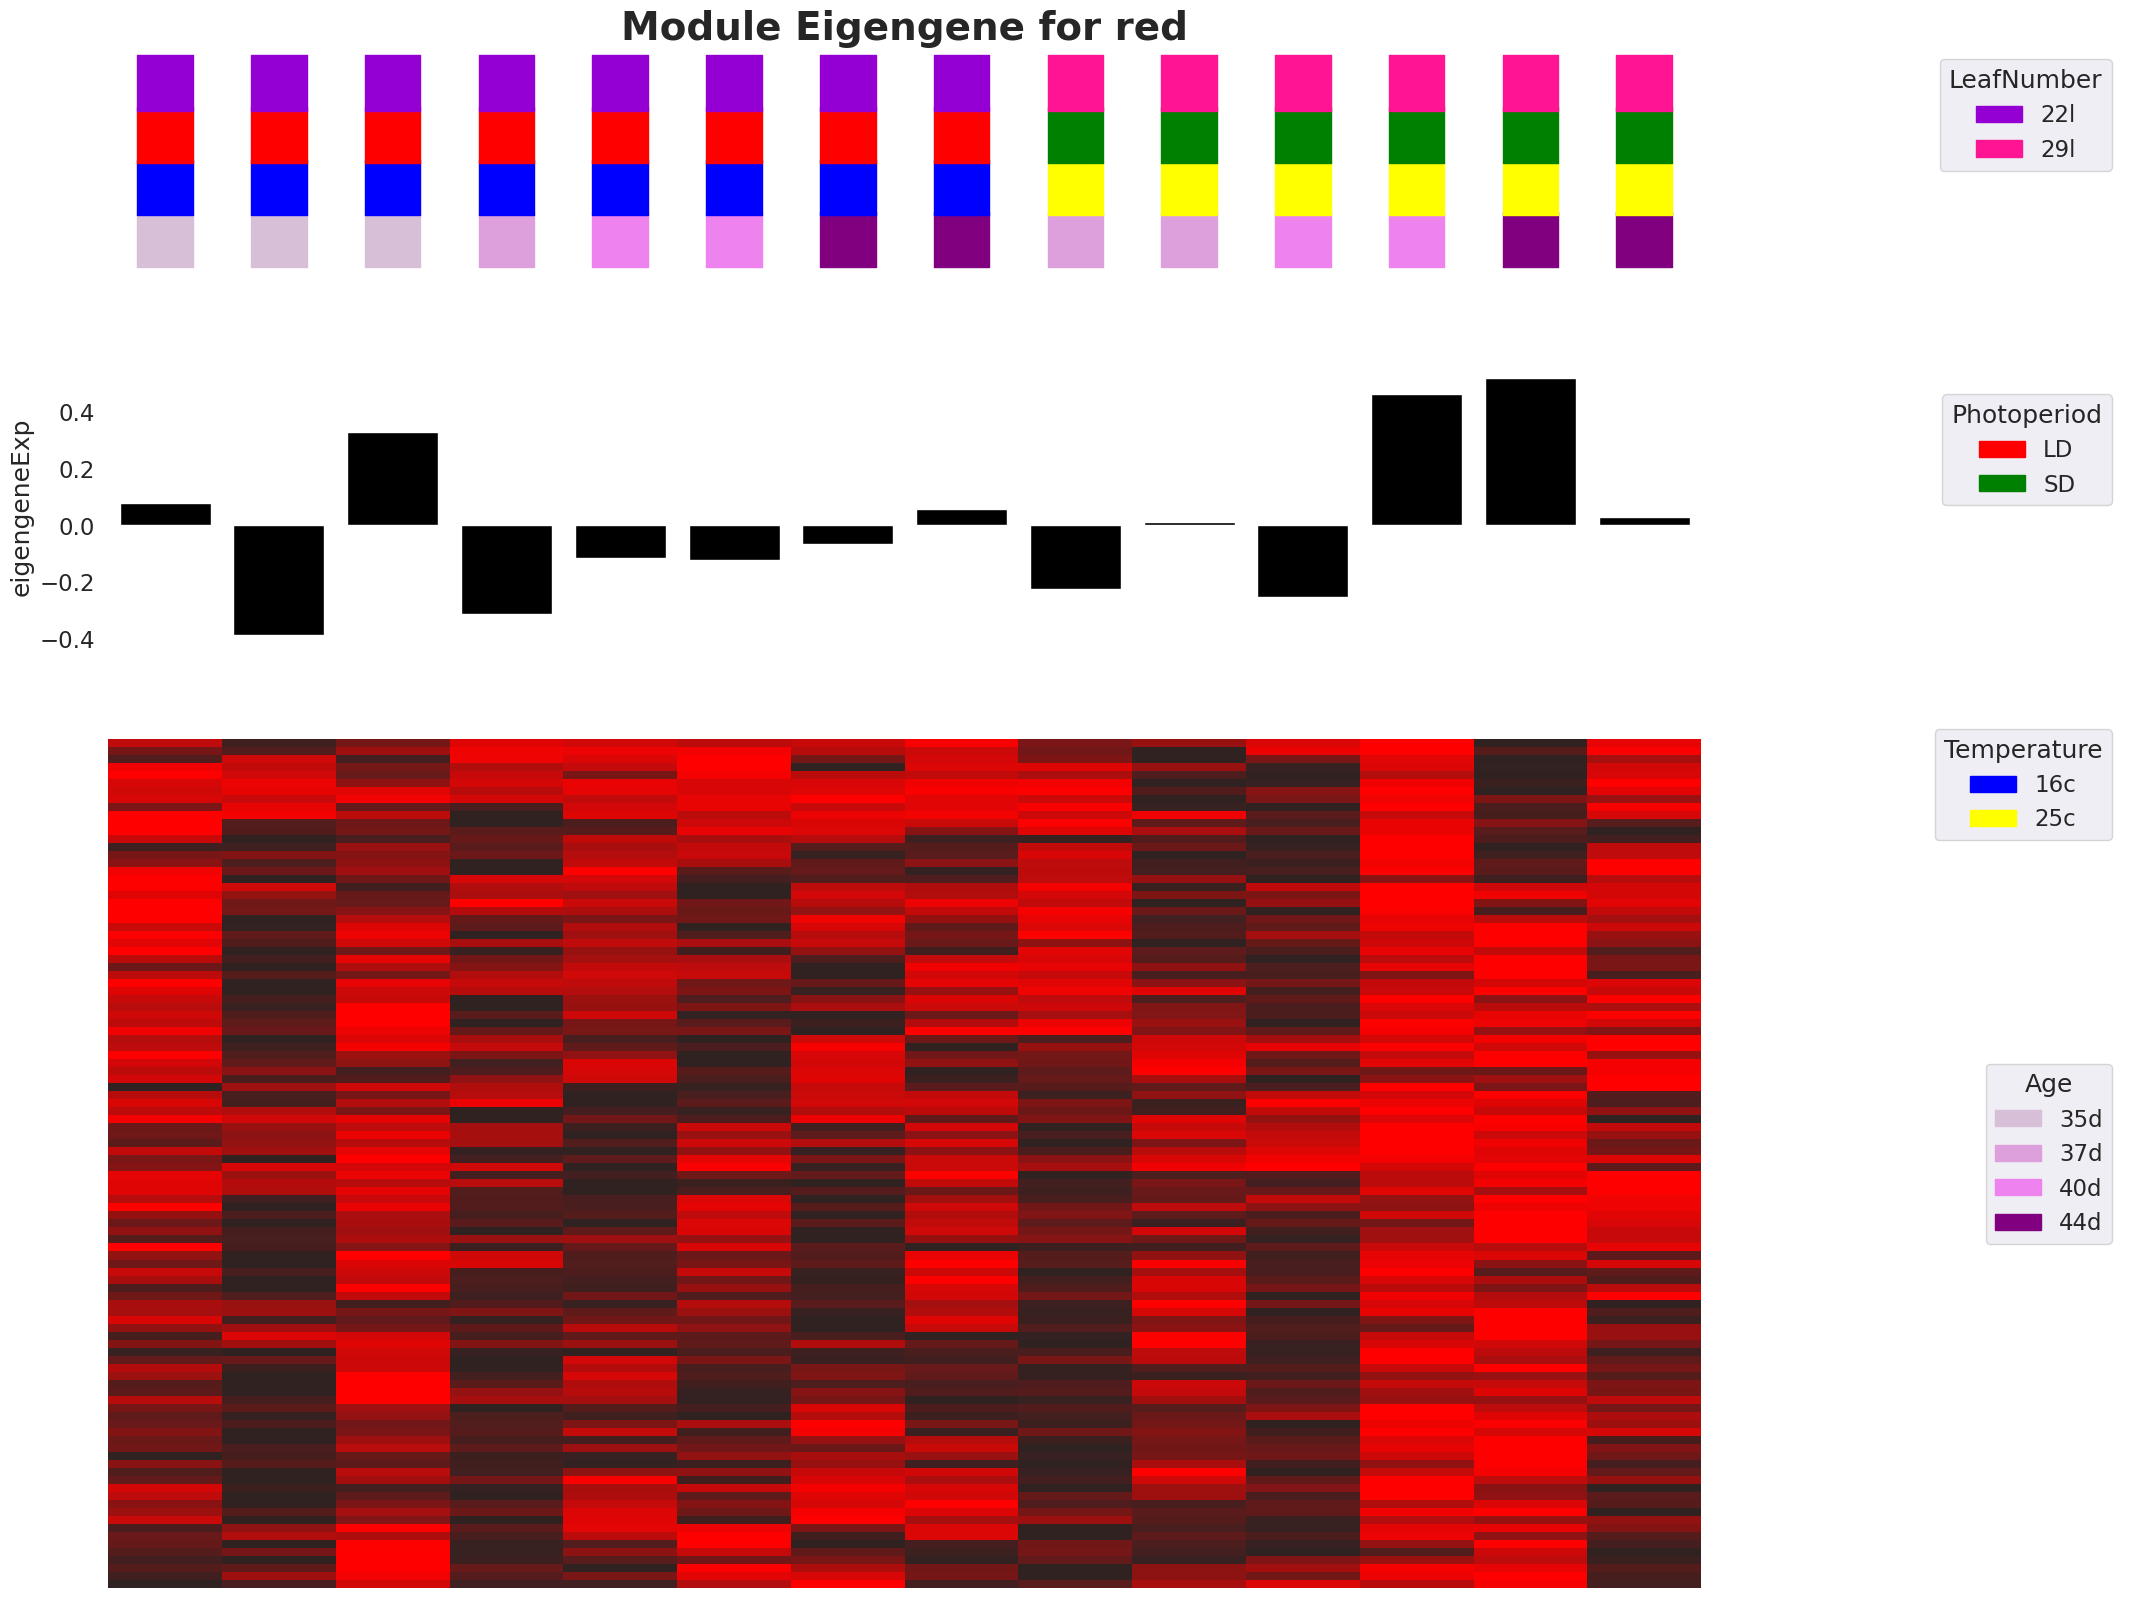

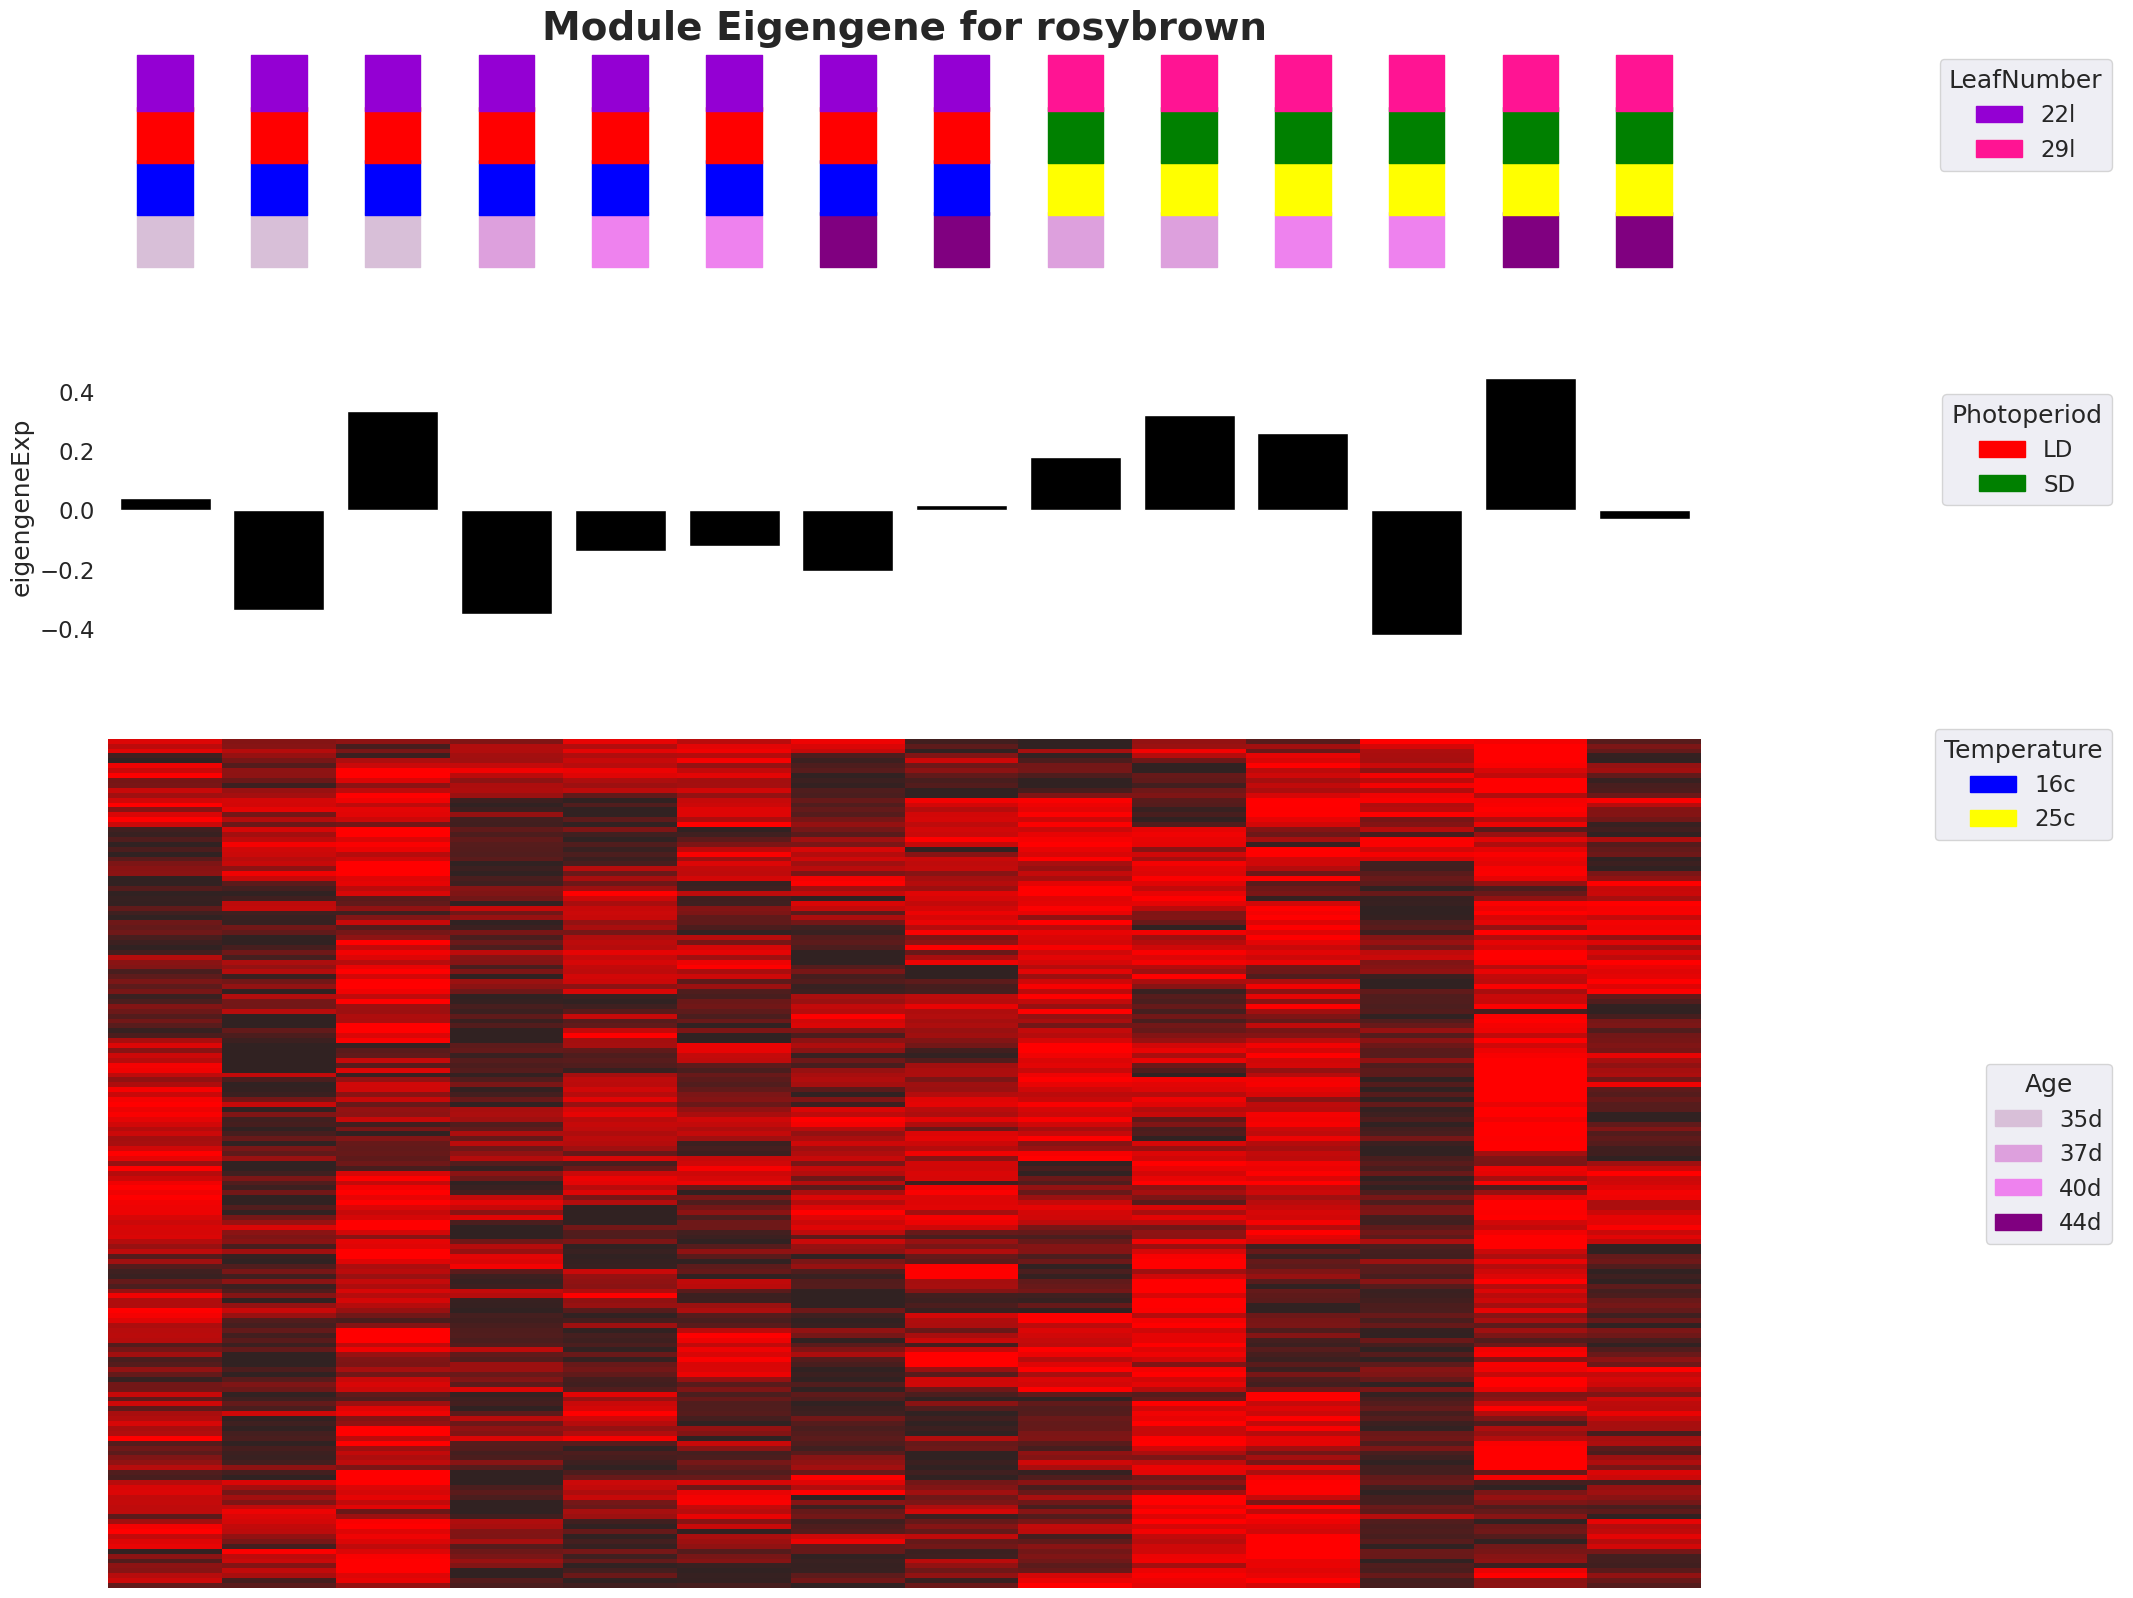

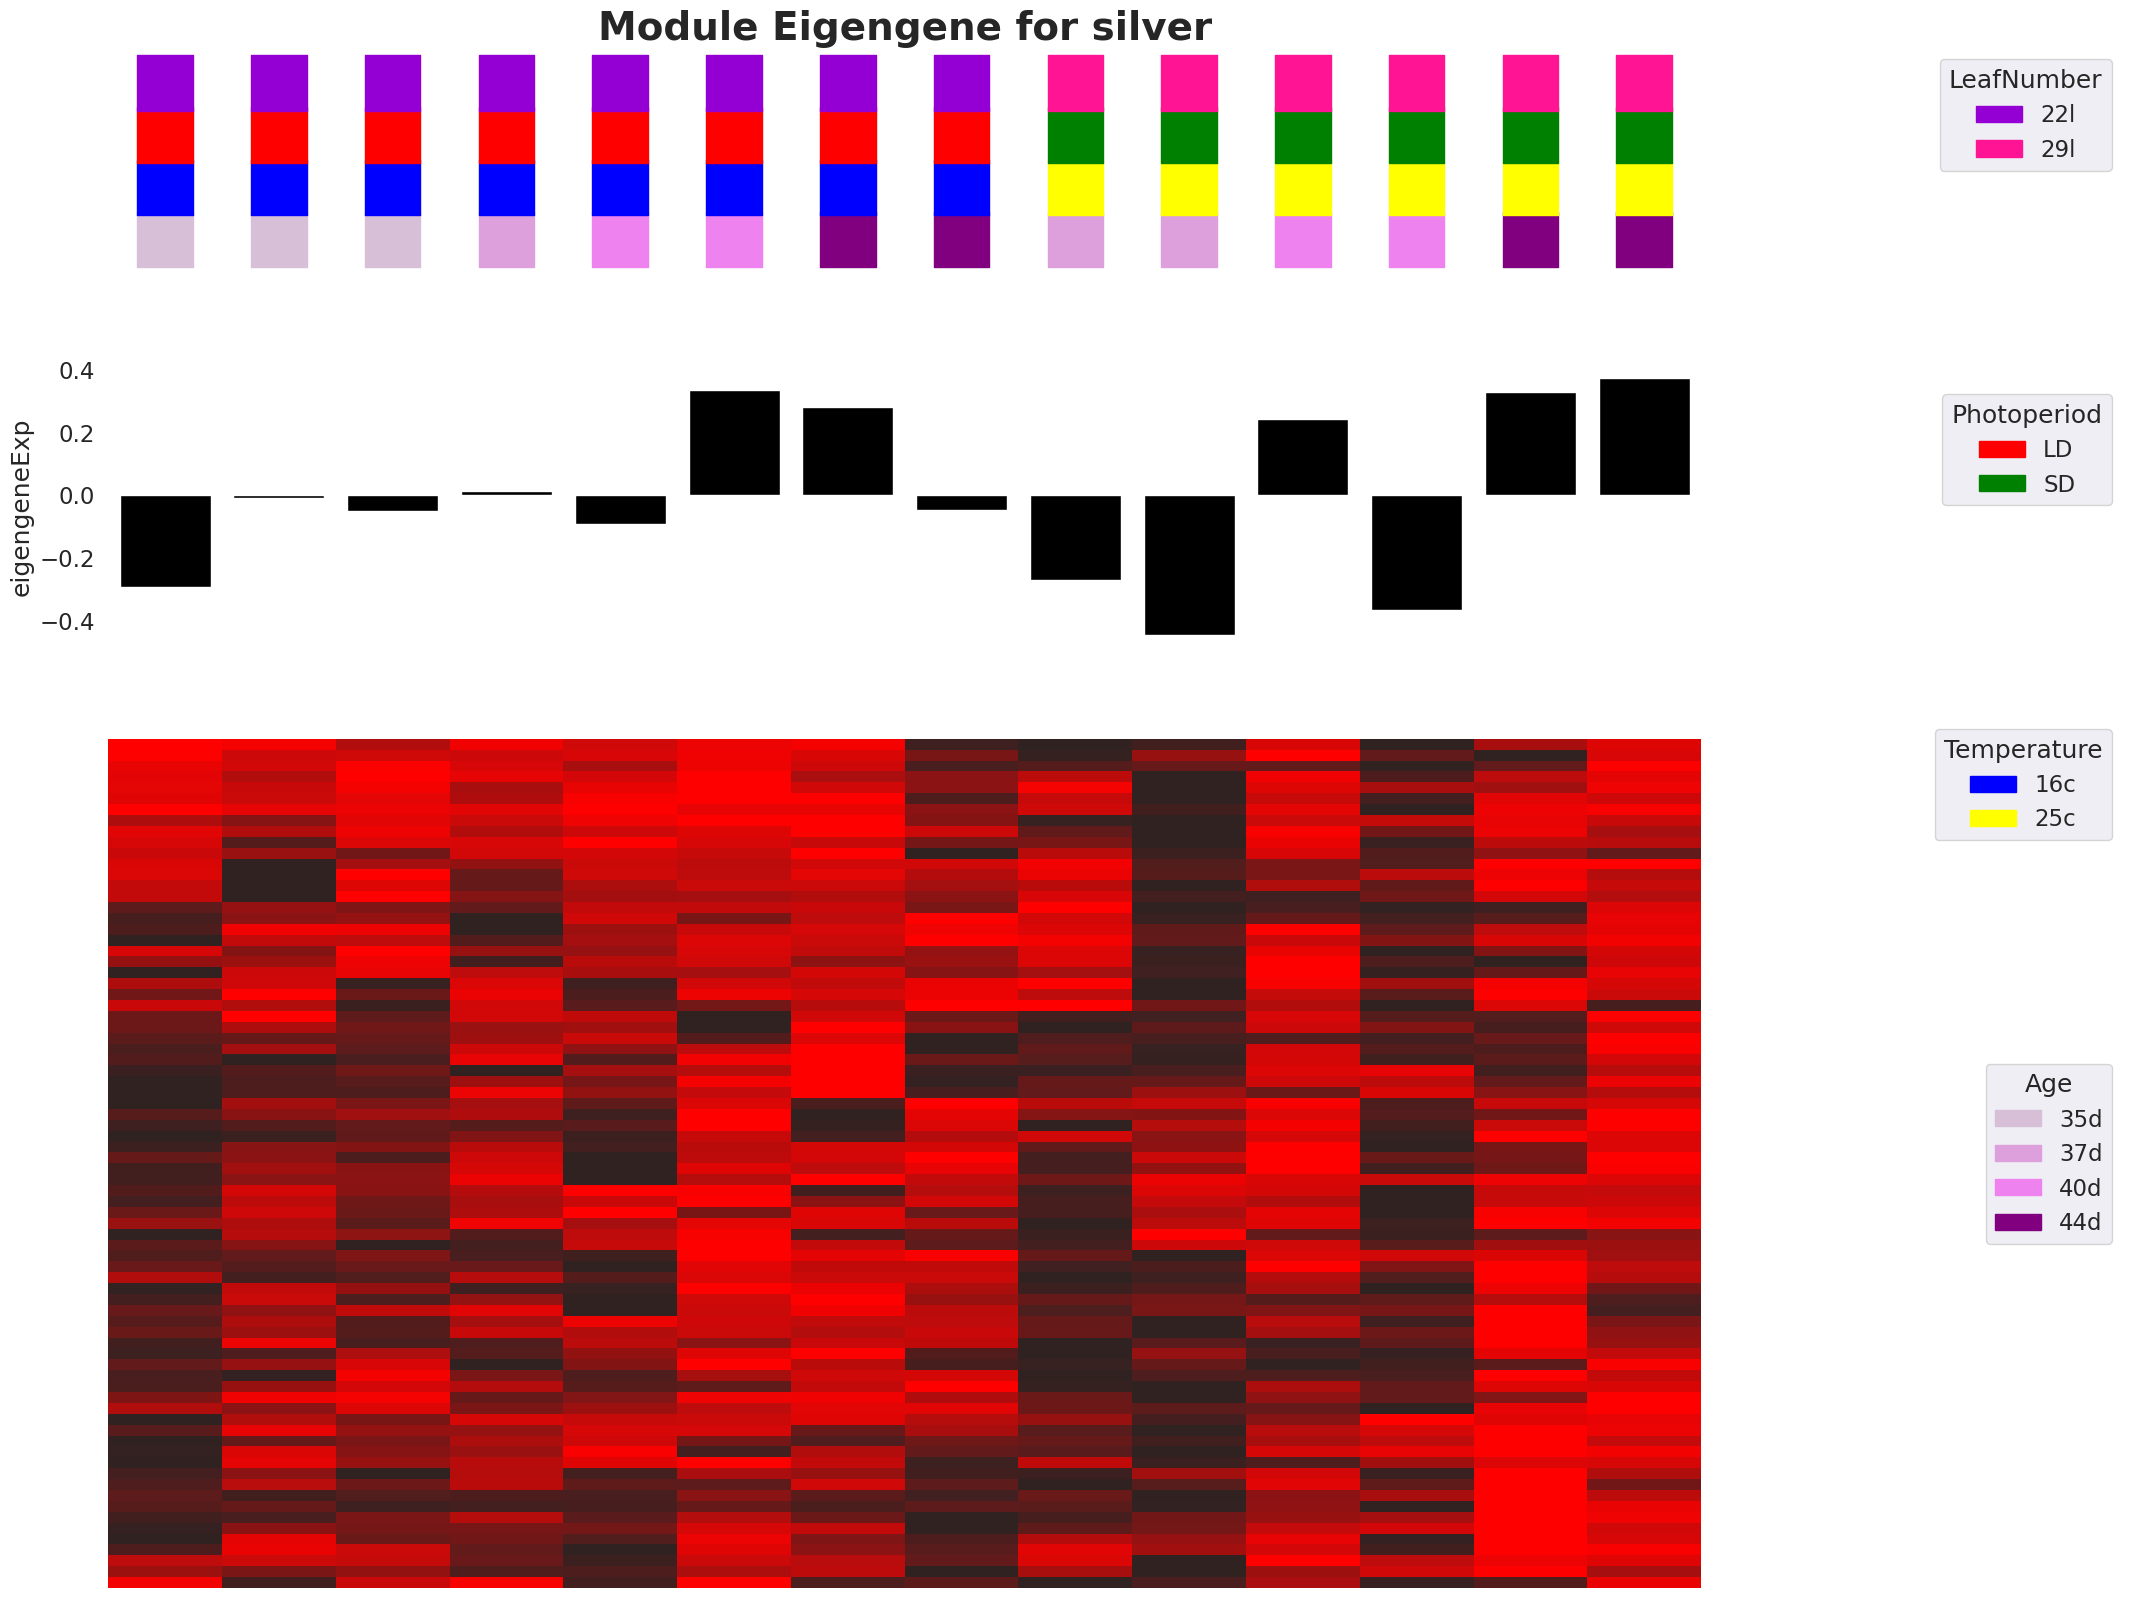

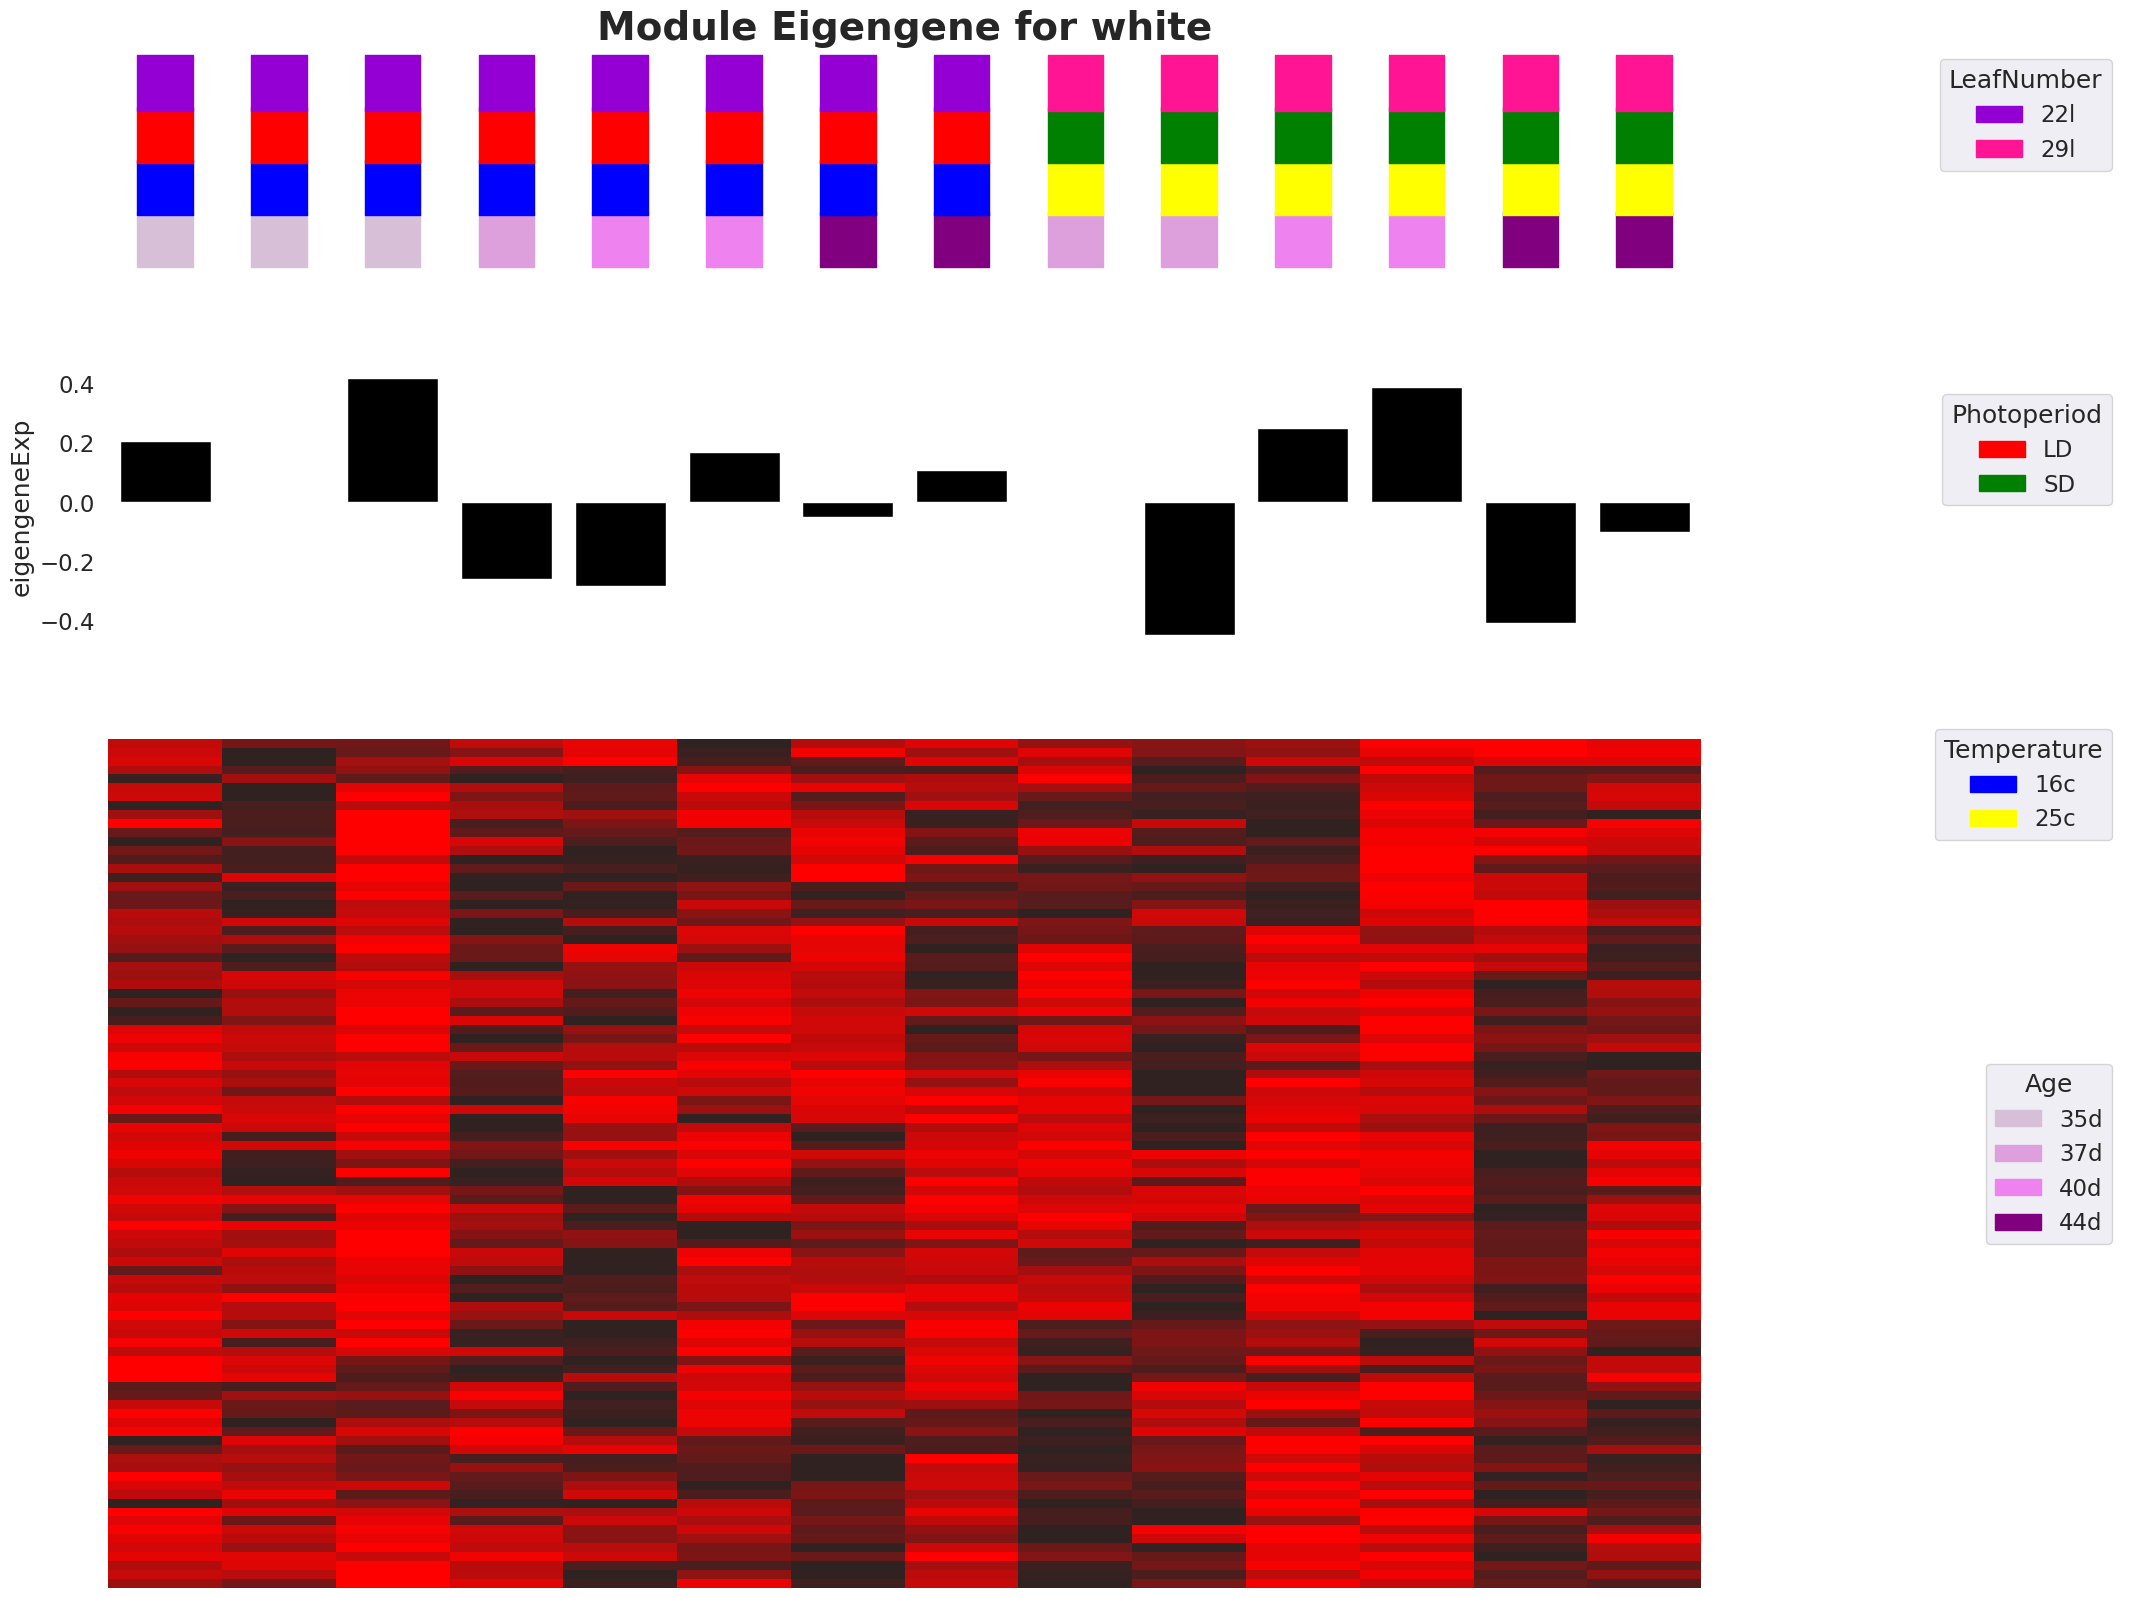

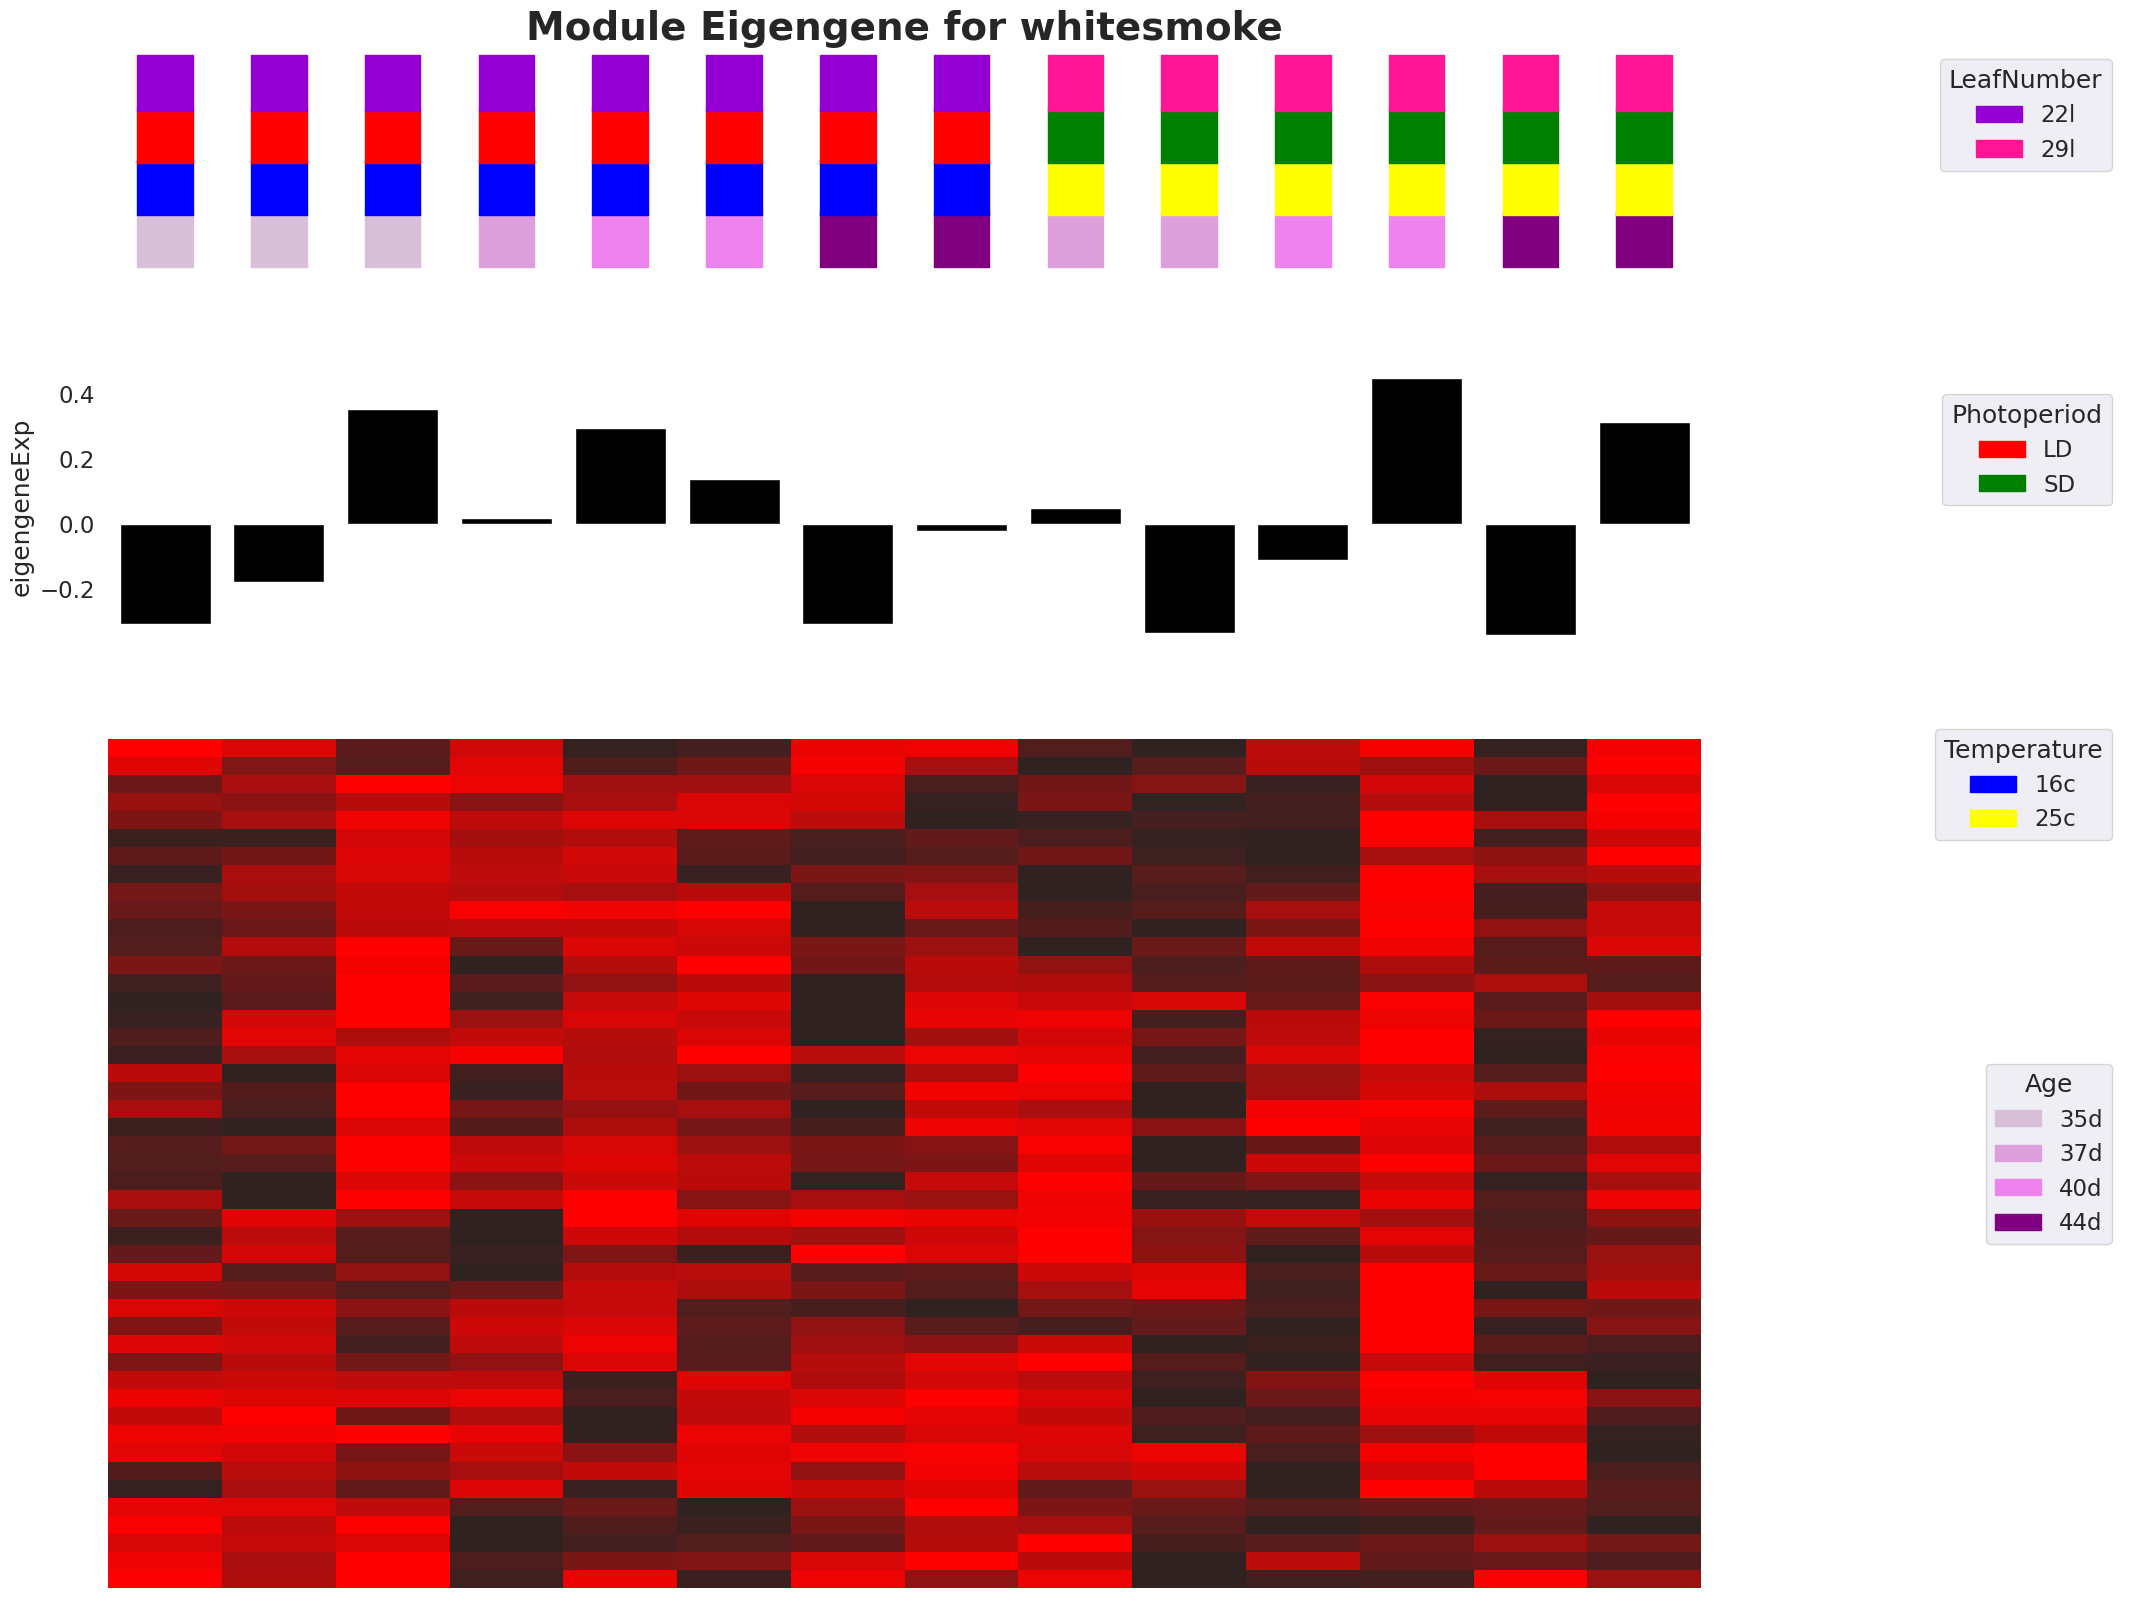

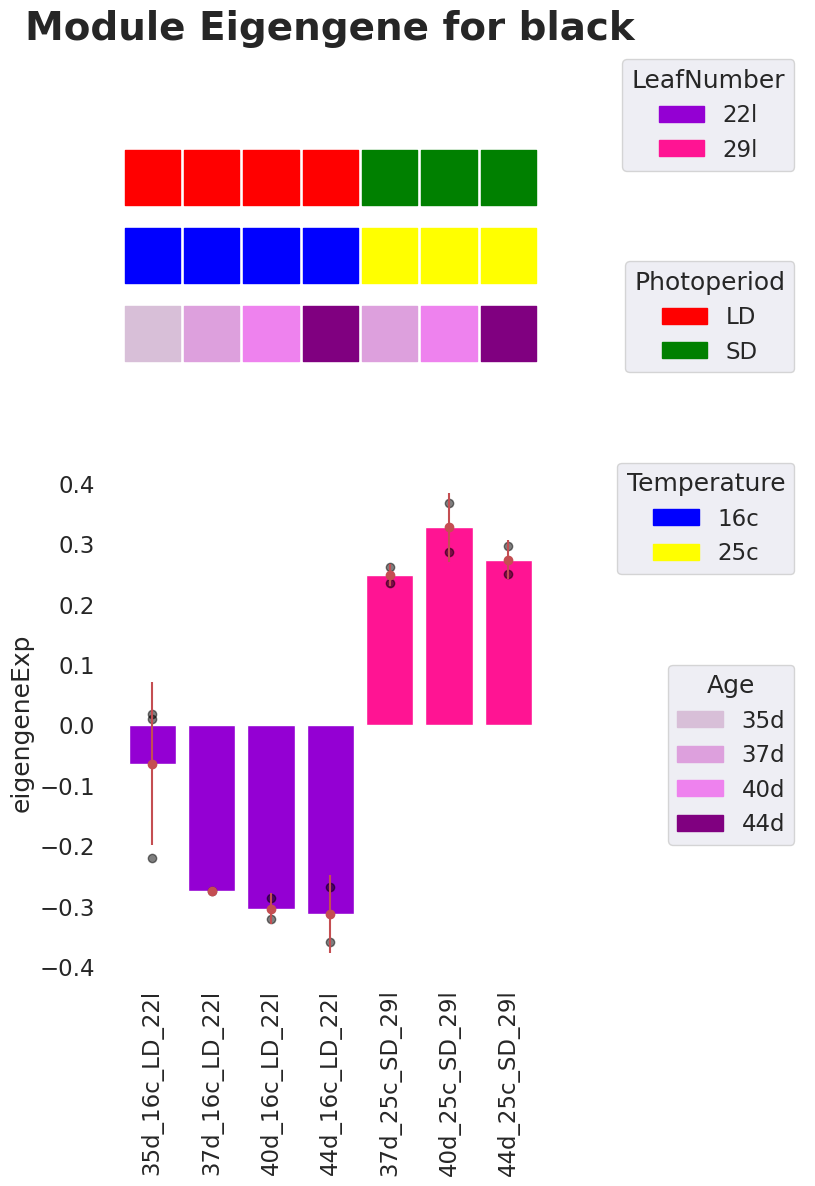

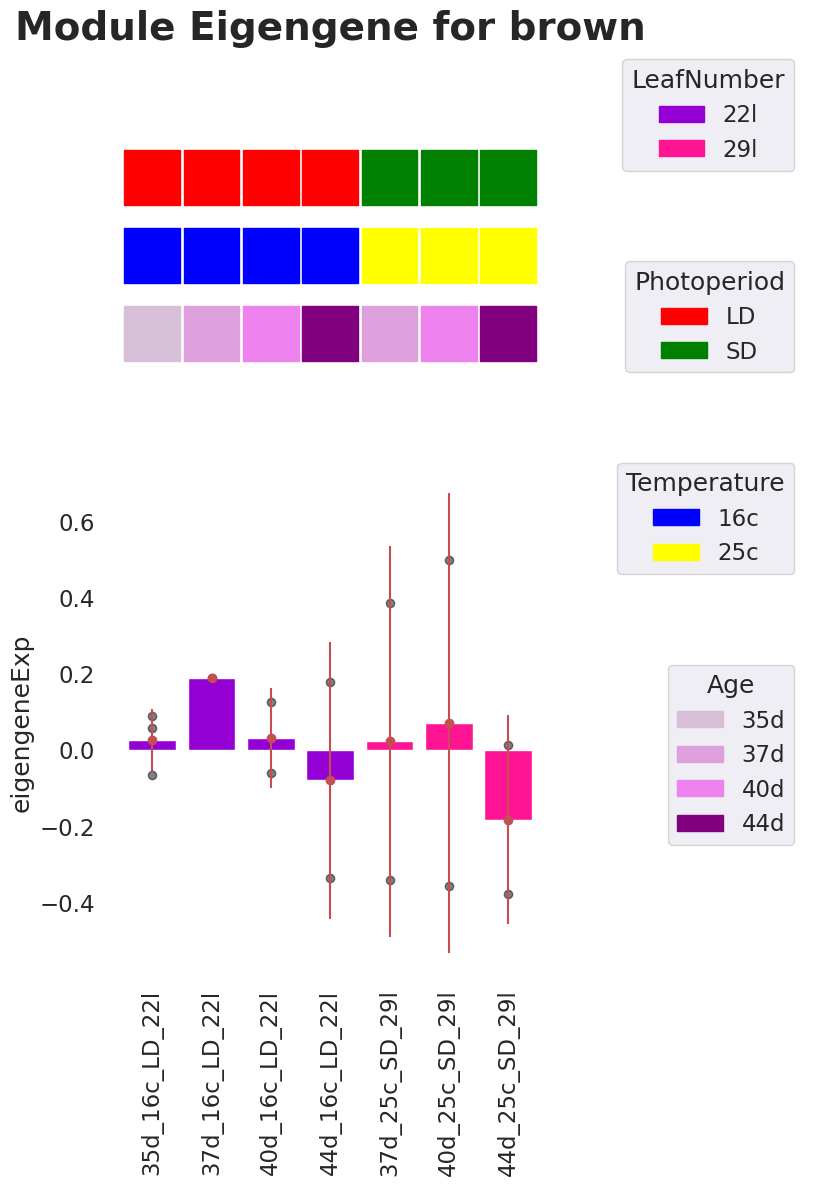

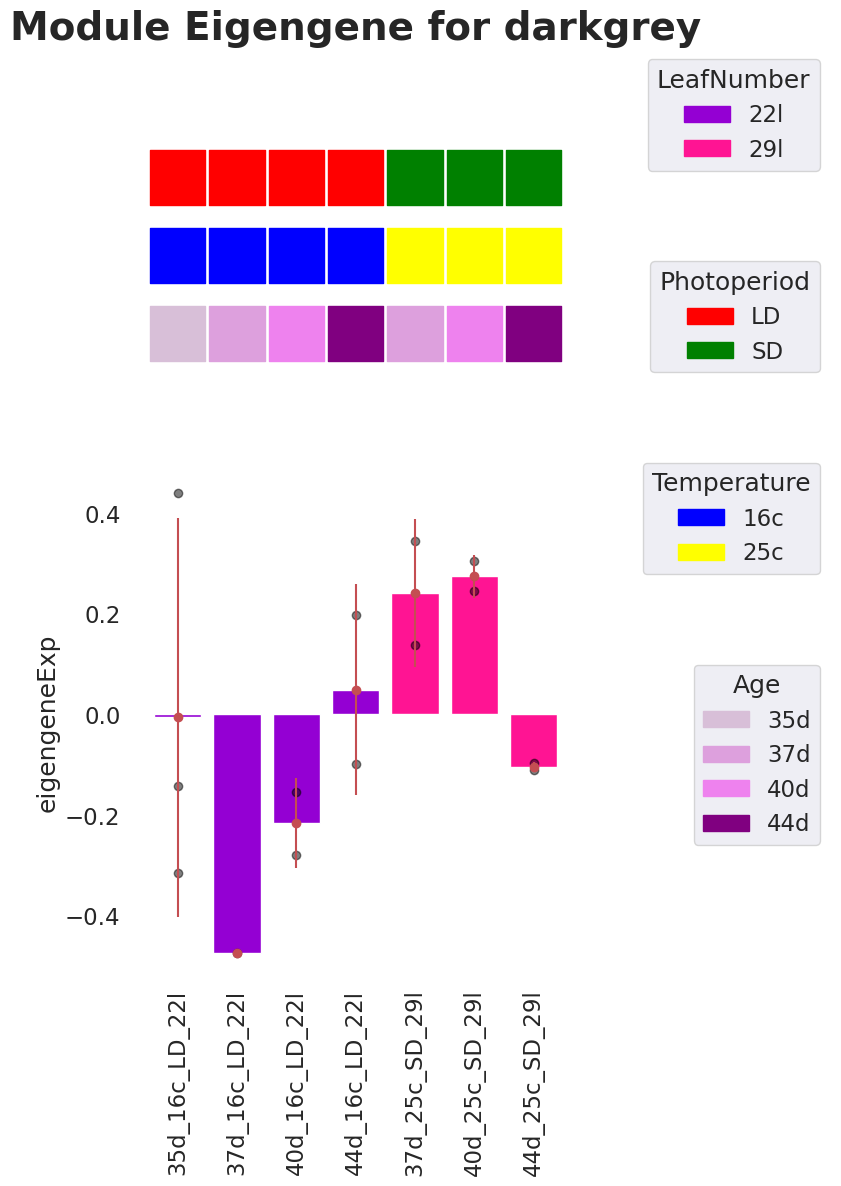

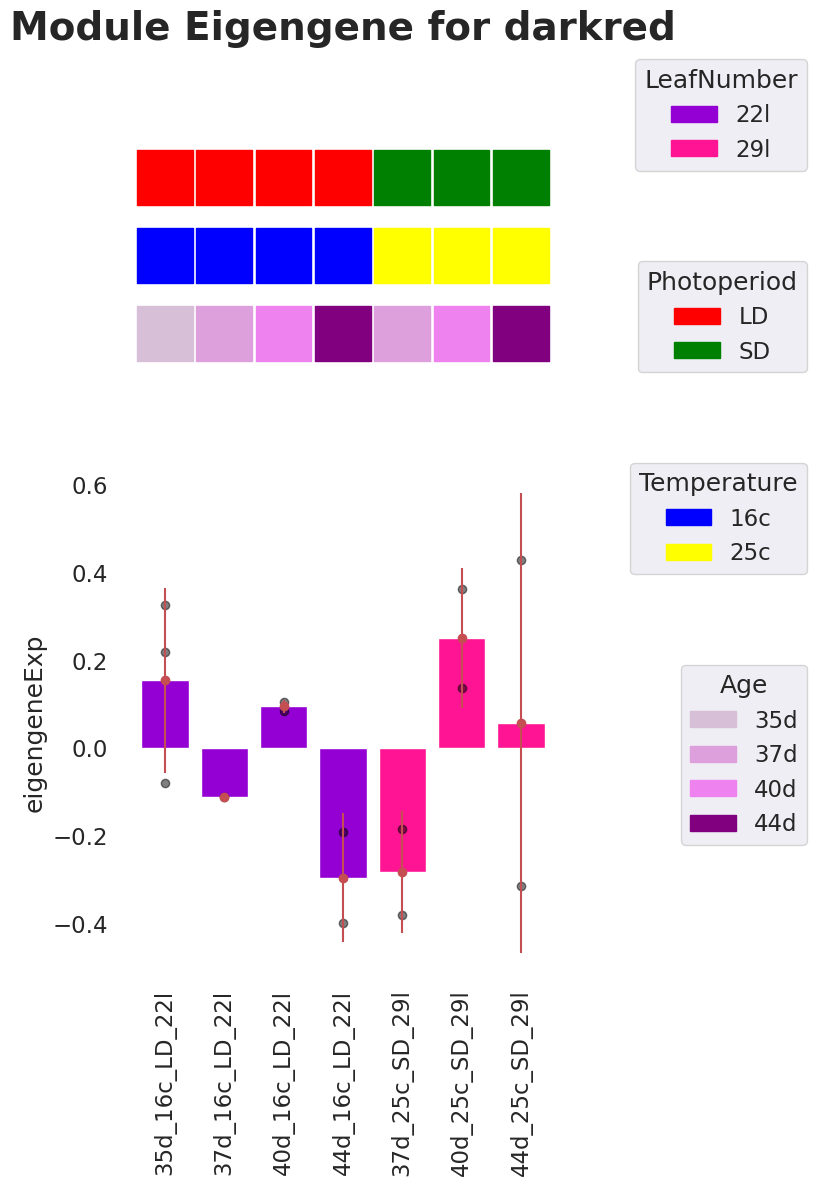

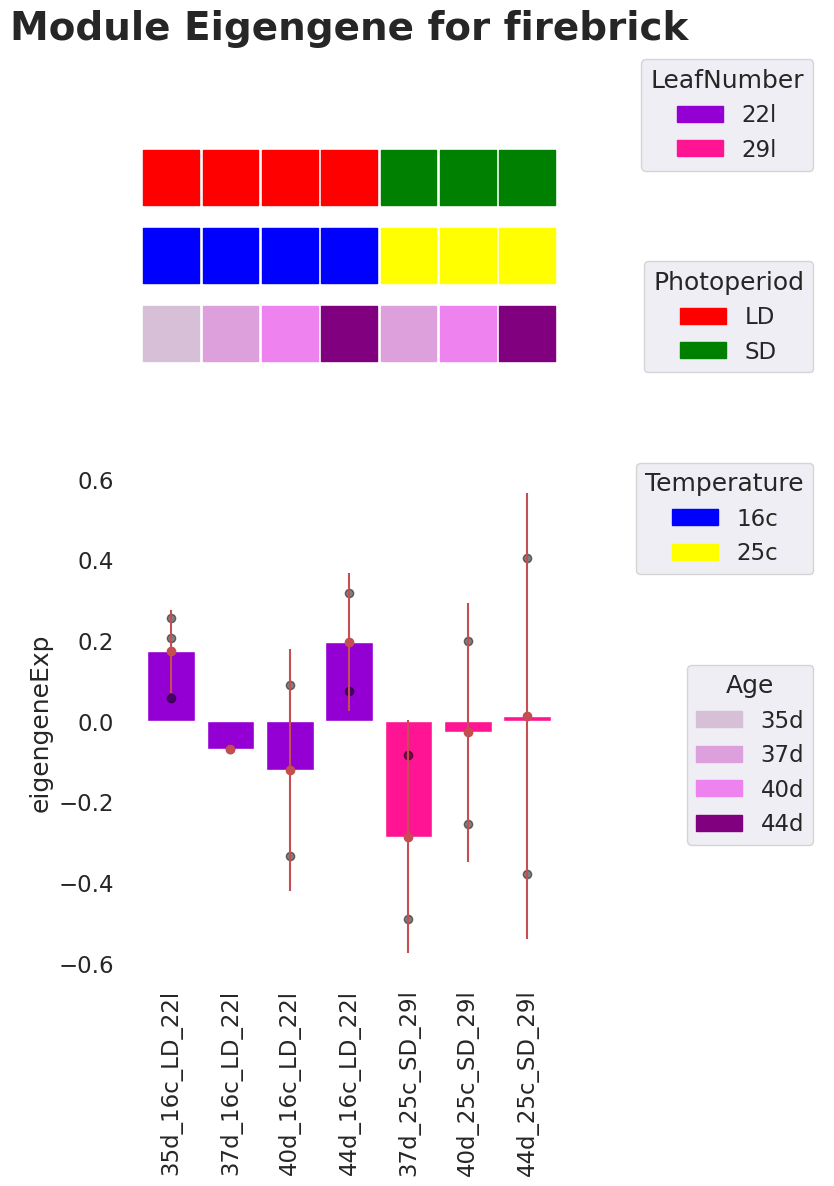

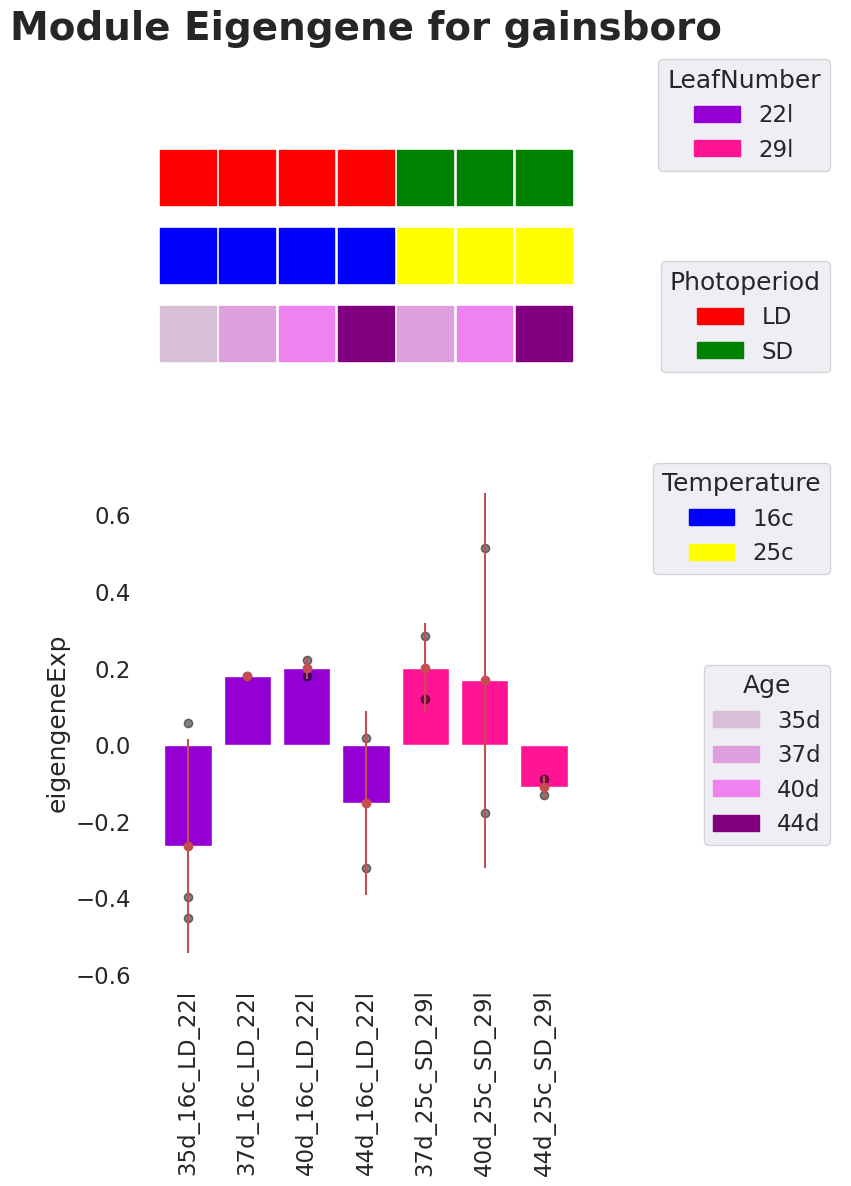

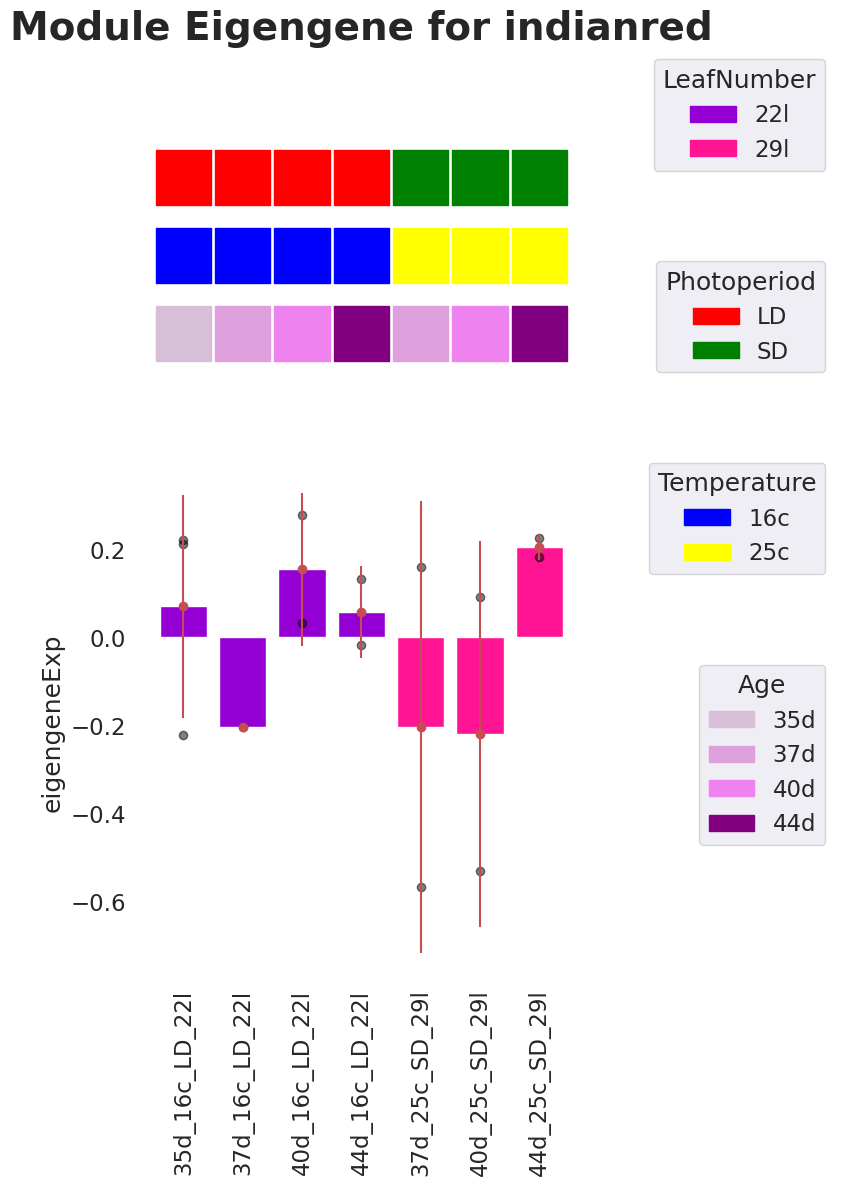

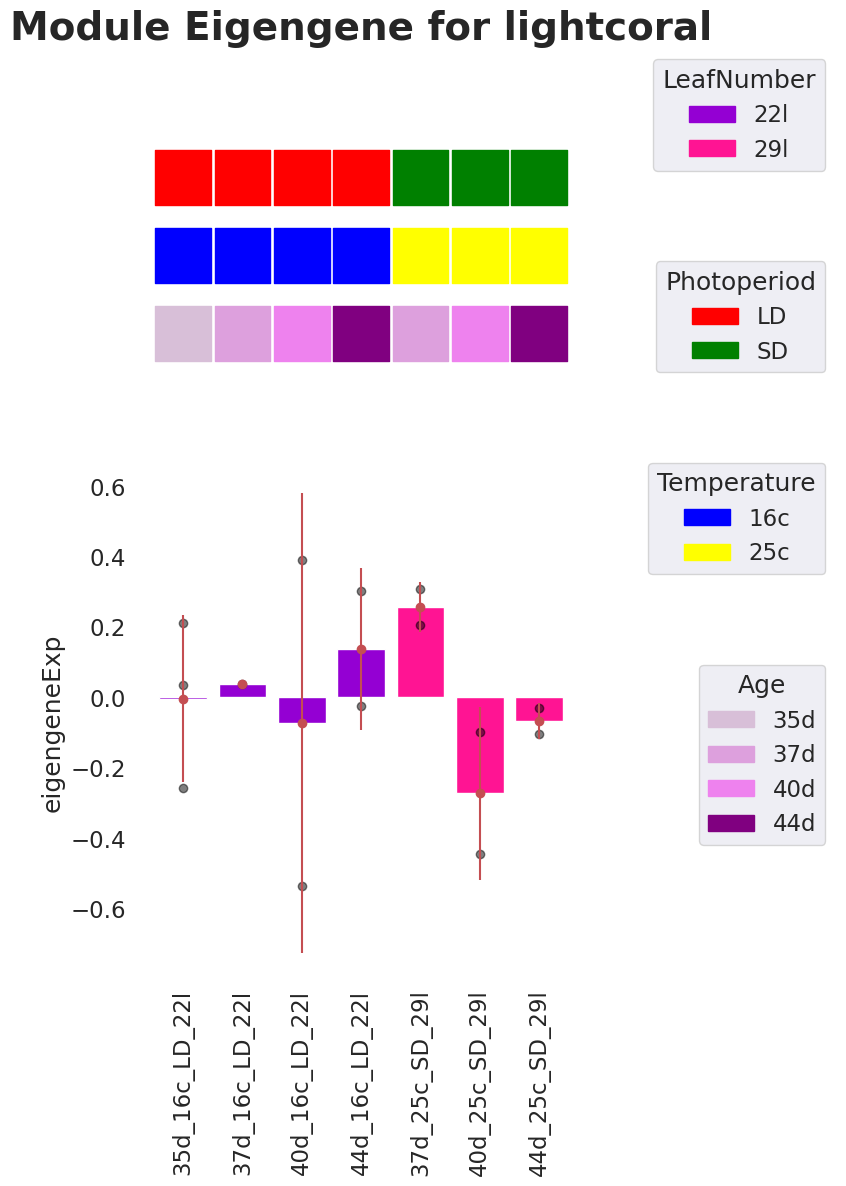

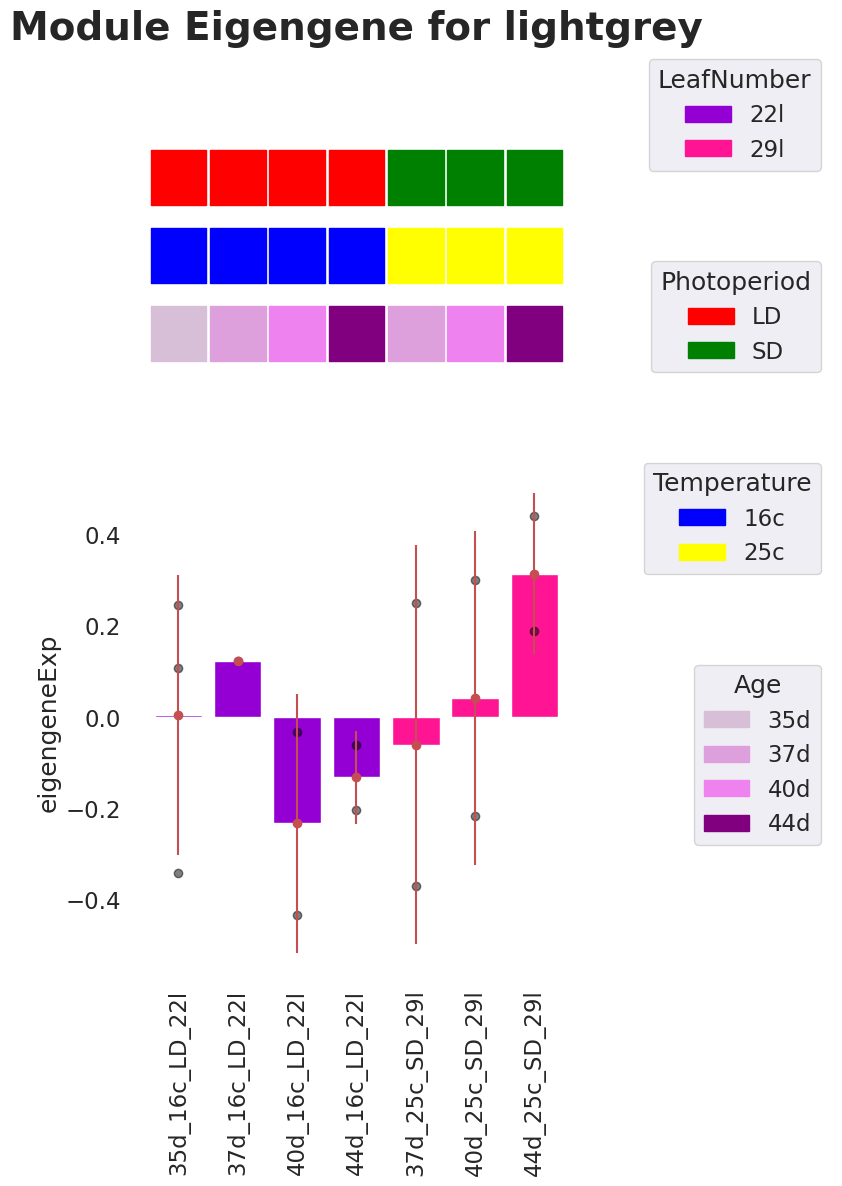

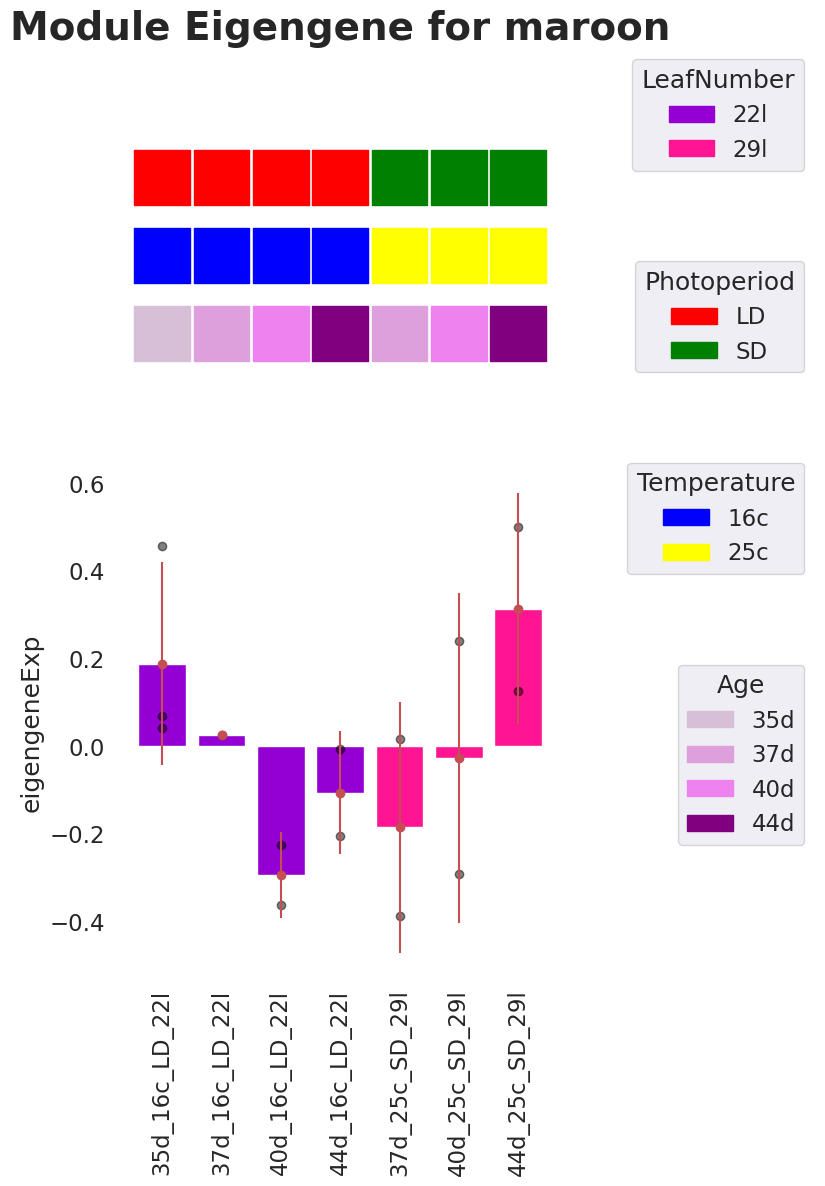

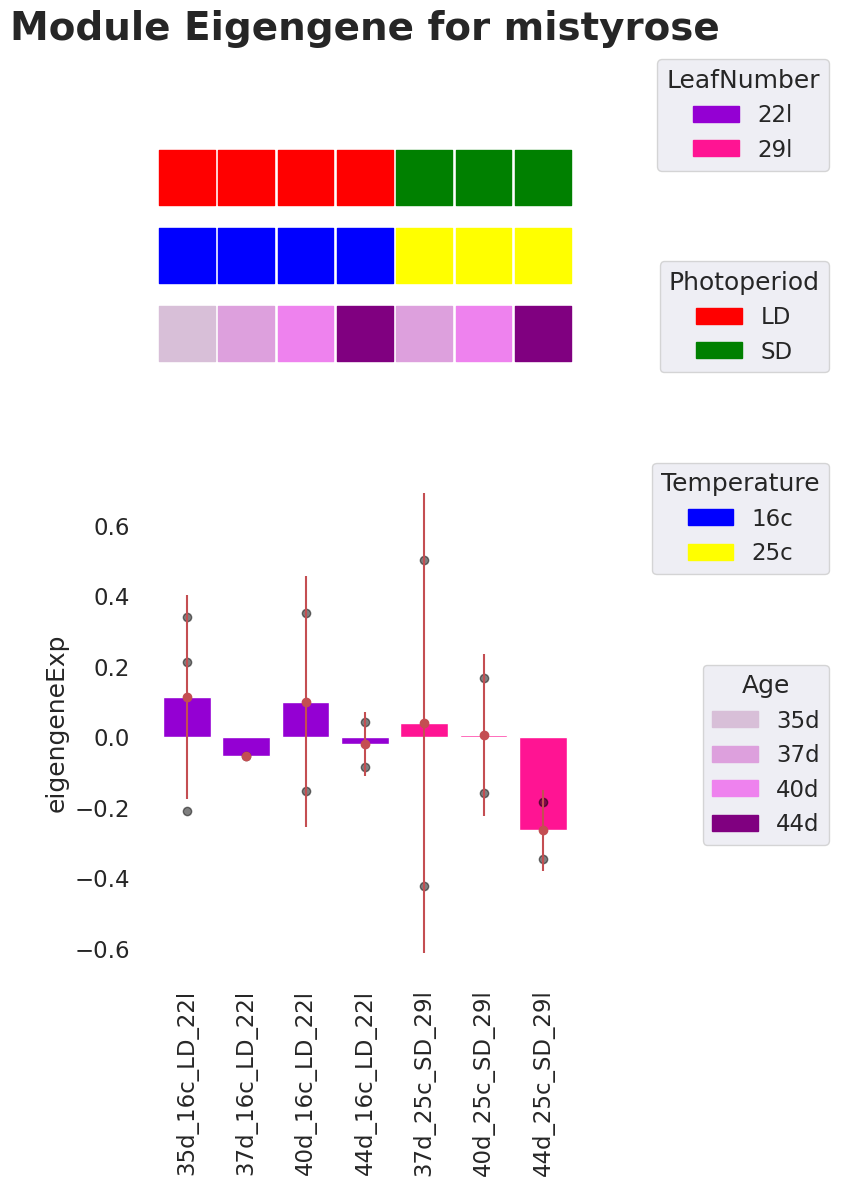

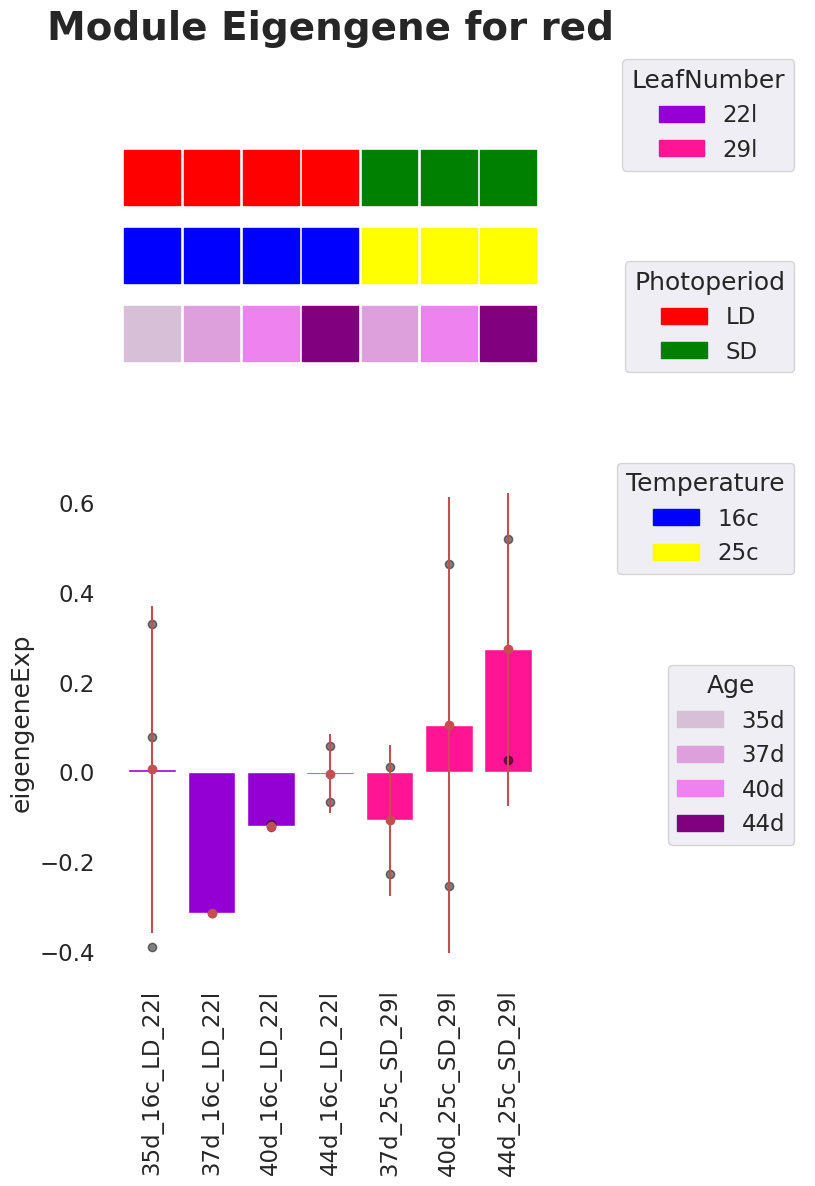

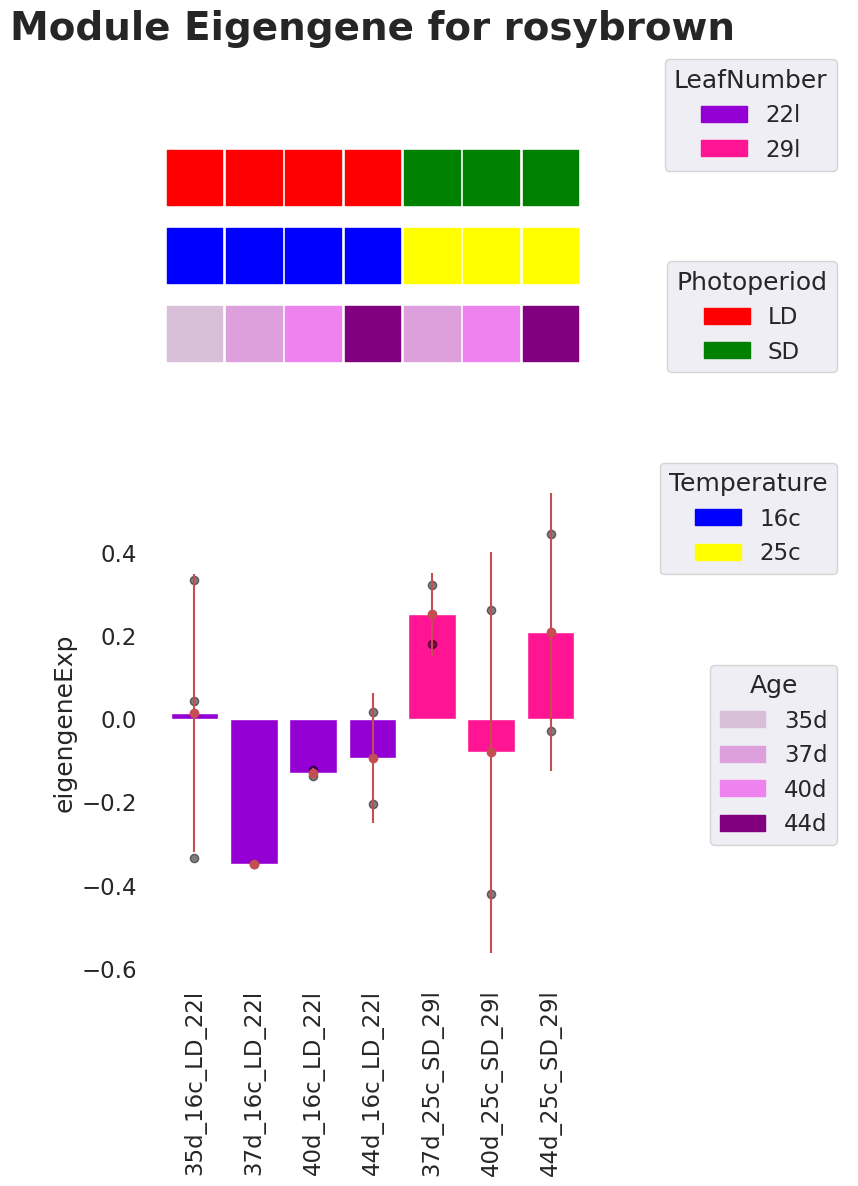

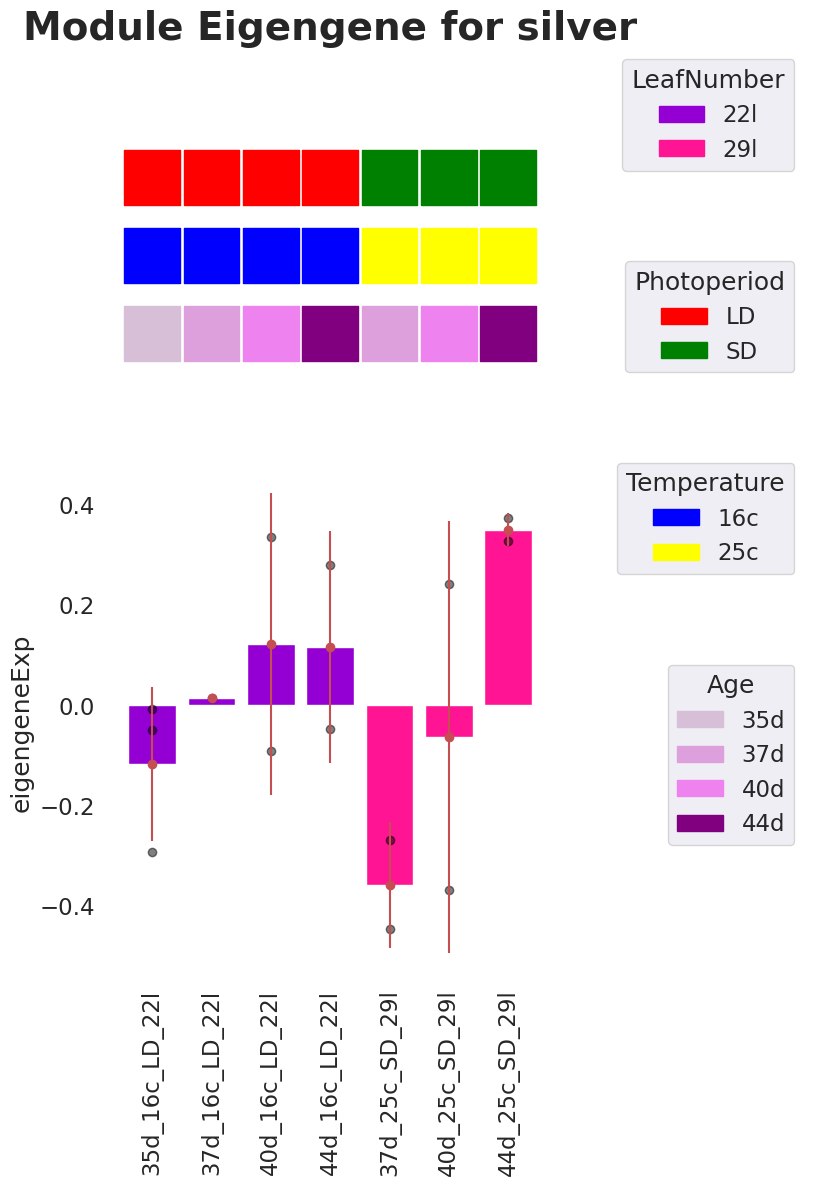

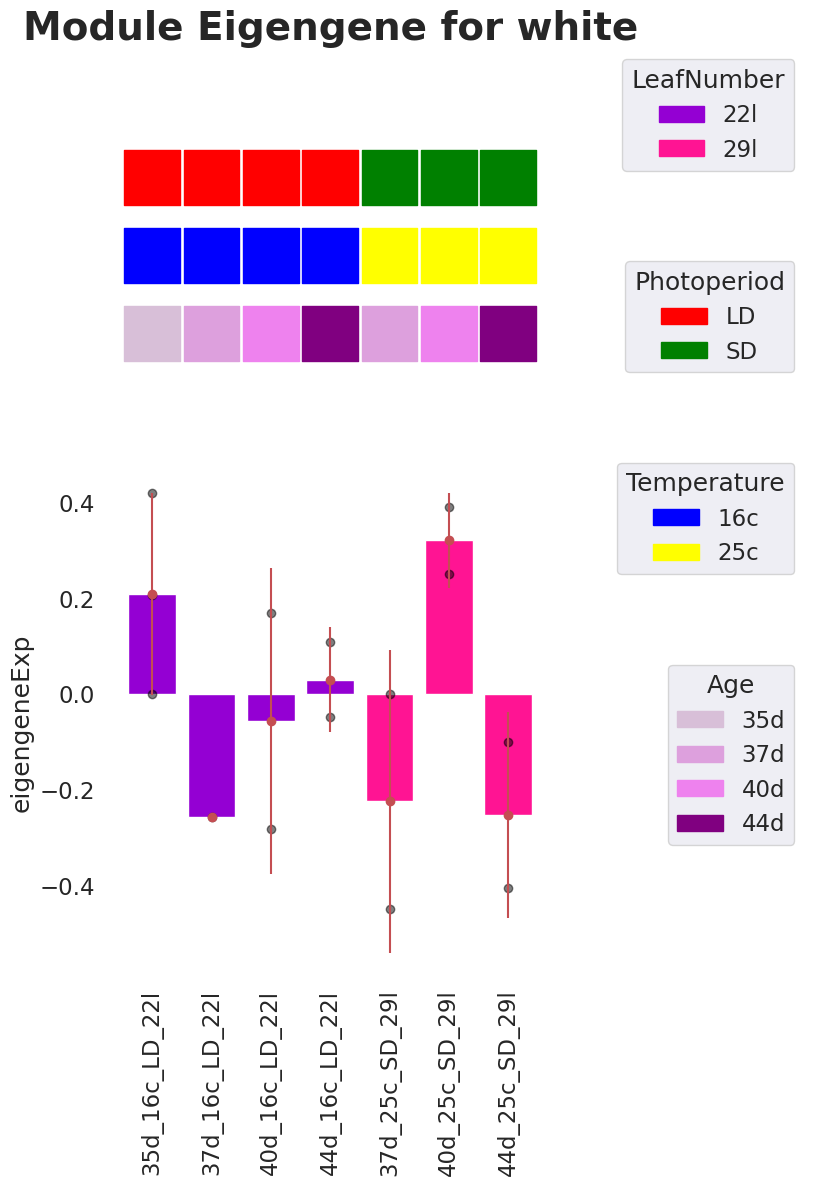

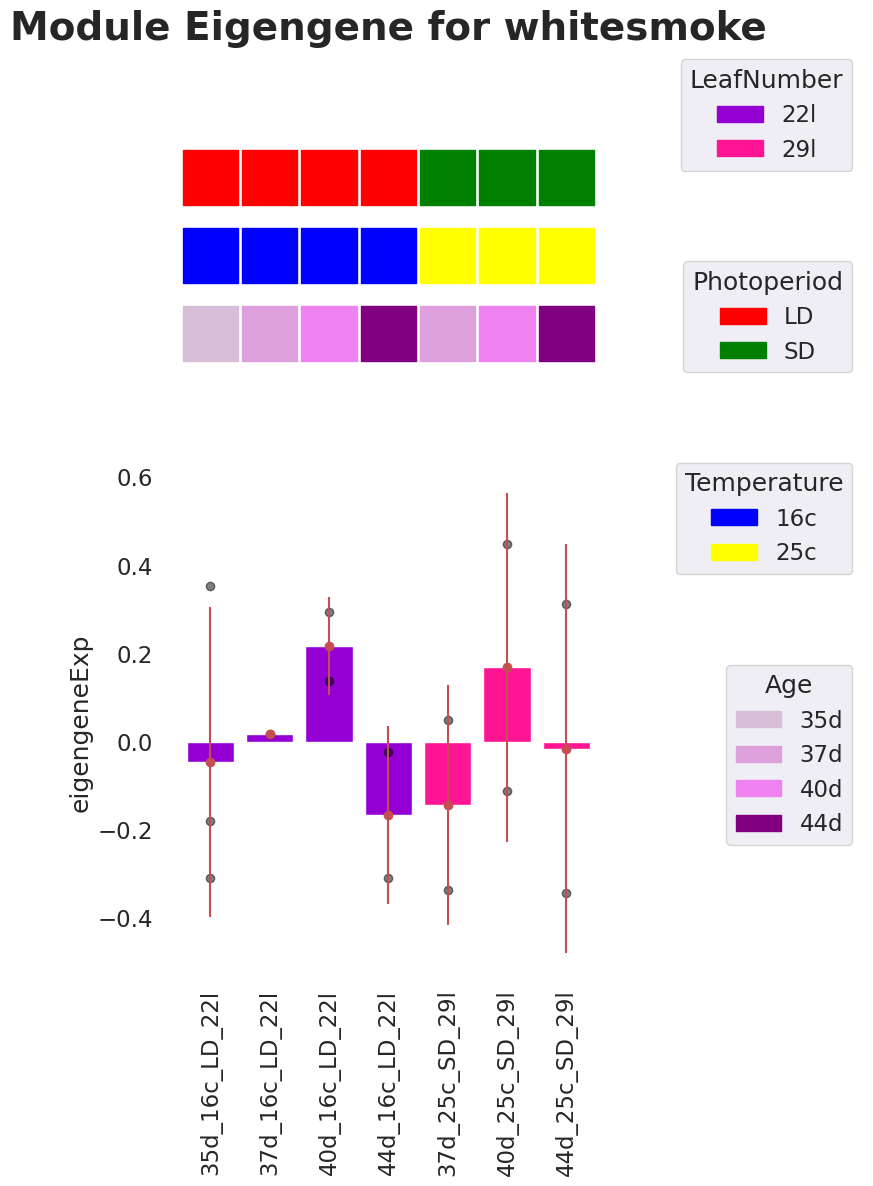

In [16]:
PyWGCNA_728.analyseWGCNA(functional_enrichment_pvalue=0.03)

In [17]:
PyWGCNA_728.saveWGCNA()

Saving WGCNA as E-MEXP-728-filtered-TPM1.p


In [18]:
PyWGCNA_728 = PyWGCNA.readWGCNA("E-MEXP-728-filtered-TPM1.p")

Reading E-MEXP-728-filtered-TPM1 WGCNA done!


# Hub Genes

In [9]:
PyWGCNA_728.top_n_hub_genes(moduleName='dimgrey', n=5)

calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  moduleLabels
AT1G67360    690.332038       dimgrey      dimgrey             1
AT3G23810    690.095997       dimgrey      dimgrey             1
AT5G57960    689.781890       dimgrey      dimgrey             1
AT3G55120    689.713069       dimgrey      dimgrey             1
AT5G17050    689.417232       dimgrey      dimgrey             1

In [10]:
PyWGCNA_728.top_n_hub_genes(moduleName='darkgrey', n=5)

calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  moduleLabels
AT2G46550    421.938489      darkgrey     darkgrey             0
AT1G11260    421.938442      darkgrey     darkgrey             0
AT2G03310    421.422920      darkgrey     darkgrey             0
AT4G03510    419.638961      darkgrey     darkgrey             0
AT5G24490    417.900969      darkgrey     darkgrey             0

In [11]:
PyWGCNA_728.top_n_hub_genes(moduleName='lightgrey', n=5)

calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  moduleLabels
AT2G18360    159.528602     lightgrey    lightgrey             2
AT5G63560    159.434574     lightgrey    lightgrey             2
AT3G44540    158.876592     lightgrey    lightgrey             2
AT5G37690    157.310240     lightgrey    lightgrey             2
AT4G33070    157.132347     lightgrey    lightgrey             2

In [12]:
modules = PyWGCNA_728.datExpr.var.moduleColors.unique().tolist()
PyWGCNA_728.CoexpressionModulePlot(modules=modules, numGenes=100, numConnections=1000, minTOM=0, file_name="all")

FileNotFoundError: [Errno 2] No such file or directory: './/home/ribei027/wgcna/analysis_notebooks/figures/network/all.html'

## Module Comparison

In [61]:
PyWGCNA_728_TPM0 = PyWGCNA.readWGCNA("E-MEXP-1304-TPM0.p")
PyWGCNA_728_TPM1 = PyWGCNA.readWGCNA("E-MEXP-1304-TPM1.p")
PyWGCNA_728_TPM2 = PyWGCNA.readWGCNA("E-MEXP-1304-TPM2.p")
PyWGCNA_728_TPM5 = PyWGCNA.readWGCNA("E-MEXP-1304-TPM5.p")
PyWGCNA_728_TPM6 = PyWGCNA.readWGCNA("E-MEXP-1304-TPM6.p")

Reading E-MEXP-1304-TPM0 WGCNA done!
Reading E-MEXP-1304-TPM1 WGCNA done!
Reading E-MEXP-1304-TPM2 WGCNA done!
Reading E-MEXP-1304-TPM5 WGCNA done!
Reading E-MEXP-1304-TPM6 WGCNA done!


In [62]:
comparison = PyWGCNA.compareNetworks(PyWGCNAs=[PyWGCNA_728_TPM0,
                                                PyWGCNA_728_TPM1,
                                                PyWGCNA_728_TPM2,
                                                PyWGCNA_728_TPM5,
                                                PyWGCNA_728_TPM6])

In [64]:
comparison.jaccard_similarity

E-MEXP-1304-TPM0:dimgrey  \
E-MEXP-1304-TPM0:dimgrey                    1.000000   
E-MEXP-1304-TPM0:darkgrey                   0.000000   
E-MEXP-1304-TPM0:lightgrey                  0.000000   
E-MEXP-1304-TPM1:dimgrey                    1.000000   
E-MEXP-1304-TPM1:darkgrey                   0.000000   
E-MEXP-1304-TPM1:lightgrey                  0.000000   
E-MEXP-1304-TPM2:dimgrey                    1.000000   
E-MEXP-1304-TPM2:darkgrey                   0.000000   
E-MEXP-1304-TPM2:lightgrey                  0.000000   
E-MEXP-1304-TPM5:dimgrey                    0.810330   
E-MEXP-1304-TPM5:darkgrey                   0.031863   
E-MEXP-1304-TPM5:lightgrey                  0.007519   
E-MEXP-1304-TPM5:silver                     0.030516   
E-MEXP-1304-TPM6:dimgrey                    0.703824   
E-MEXP-1304-TPM6:darkgrey                   0.033832   
E-MEXP-1304-TPM6:gainsboro                  0.009202   

                            E-MEXP-1304-TPM0:darkgrey  \
E-MEXP-1304-TPM0:dimgrey                     0.000000   
E-MEXP-1304-TPM0:darkgrey                    1.000000   
E-MEXP-1304-TPM0:lightgrey                   0.000000   
E-MEXP-1304-TPM1:dimgrey                     0.000000   
E-MEXP-1304-TPM1:darkgrey                    1.000000   
E-MEXP-1304-TPM1:lightgrey                   0.000000   
E-MEXP-1304-TPM2:dimgrey                     0.000000   
E-MEXP-1304-TPM2:darkgrey                    1.000000   
E-MEXP-1304-TPM2:lightgrey                   0.000000   
E-MEXP-1304-TPM5:dimgrey                     0.022138   
E-MEXP-1304-TPM5:darkgrey                    0.801550   
E-MEXP-1304-TPM5:lightgrey                   0.004405   
E-MEXP-1304-TPM5:silver                      0.012739   
E-MEXP-1304-TPM6:dimgrey                     0.038995   
E-MEXP-1304-TPM6:darkgrey                    0.667188   
E-MEXP-1304-TPM6:gainsboro                   0.012755   

                            E-MEXP-1304-TPM0:lightgrey  \
E-MEXP-1304-TPM0:dimgrey                      0.000000   
E-MEXP-1304-TPM0:darkgrey                     0.000000   
E-MEXP-1304-TPM0:lightgrey                    1.000000   
E-MEXP-1304-TPM1:dimgrey                      0.000000   
E-MEXP-1304-TPM1:darkgrey                     0.000000   
E-MEXP-1304-TPM1:lightgrey                    1.000000   
E-MEXP-1304-TPM2:dimgrey                      0.000000   
E-MEXP-1304-TPM2:darkgrey                     0.000000   
E-MEXP-1304-TPM2:lightgrey                    1.000000   
E-MEXP-1304-TPM5:dimgrey                      0.029276   
E-MEXP-1304-TPM5:darkgrey                     0.008000   
E-MEXP-1304-TPM5:lightgrey                    0.270440   
E-MEXP-1304-TPM5:silver                       0.450704   
E-MEXP-1304-TPM6:dimgrey                      0.050407   
E-MEXP-1304-TPM6:darkgrey                     0.002548   
E-MEXP-1304-TPM6:gainsboro                    0.567073   

                            E-MEXP-1304-TPM1:dimgrey  \
E-MEXP-1304-TPM0:dimgrey                    1.000000   
E-MEXP-1304-TPM0:darkgrey                   0.000000   
E-MEXP-1304-TPM0:lightgrey                  0.000000   
E-MEXP-1304-TPM1:dimgrey                    1.000000   
E-MEXP-1304-TPM1:darkgrey                   0.000000   
E-MEXP-1304-TPM1:lightgrey                  0.000000   
E-MEXP-1304-TPM2:dimgrey                    1.000000   
E-MEXP-1304-TPM2:darkgrey                   0.000000   
E-MEXP-1304-TPM2:lightgrey                  0.000000   
E-MEXP-1304-TPM5:dimgrey                    0.810330   
E-MEXP-1304-TPM5:darkgrey                   0.031863   
E-MEXP-1304-TPM5:lightgrey                  0.007519   
E-MEXP-1304-TPM5:silver                     0.030516   
E-MEXP-1304-TPM6:dimgrey                    0.703824   
E-MEXP-1304-TPM6:darkgrey                   0.033832   
E-MEXP-1304-TPM6:gainsboro                  0.009202   

                            E-MEXP-1304-TPM1:darkgrey  \
E-MEXP-1304-TPM0:dimgrey                     0.000000   
E-MEXP-1304-TPM0:darkgrey                    1.0000

In [65]:
comparison.fraction

E-MEXP-1304-TPM0:dimgrey  \
E-MEXP-1304-TPM0:dimgrey                    1.000000   
E-MEXP-1304-TPM0:darkgrey                   0.000000   
E-MEXP-1304-TPM0:lightgrey                  0.000000   
E-MEXP-1304-TPM1:dimgrey                  100.000000   
E-MEXP-1304-TPM1:darkgrey                   0.000000   
E-MEXP-1304-TPM1:lightgrey                  0.000000   
E-MEXP-1304-TPM2:dimgrey                  100.000000   
E-MEXP-1304-TPM2:darkgrey                   0.000000   
E-MEXP-1304-TPM2:lightgrey                  0.000000   
E-MEXP-1304-TPM5:dimgrey                   86.371841   
E-MEXP-1304-TPM5:darkgrey                   4.693141   
E-MEXP-1304-TPM5:lightgrey                  0.812274   
E-MEXP-1304-TPM5:silver                     3.519856   
E-MEXP-1304-TPM6:dimgrey                   78.068592   
E-MEXP-1304-TPM6:darkgrey                   4.693141   
E-MEXP-1304-TPM6:gainsboro                  1.083032   

                            E-MEXP-1304-TPM0:darkgrey  \
E-MEXP-1304-TPM0:dimgrey                     0.000000   
E-MEXP-1304-TPM0:darkgrey                    1.000000   
E-MEXP-1304-TPM0:lightgrey                   0.000000   
E-MEXP-1304-TPM1:dimgrey                     0.000000   
E-MEXP-1304-TPM1:darkgrey                  100.000000   
E-MEXP-1304-TPM1:lightgrey                   0.000000   
E-MEXP-1304-TPM2:dimgrey                     0.000000   
E-MEXP-1304-TPM2:darkgrey                  100.000000   
E-MEXP-1304-TPM2:lightgrey                   0.000000   
E-MEXP-1304-TPM5:dimgrey                     5.972696   
E-MEXP-1304-TPM5:darkgrey                   88.225256   
E-MEXP-1304-TPM5:lightgrey                   0.511945   
E-MEXP-1304-TPM5:silver                      1.706485   
E-MEXP-1304-TPM6:dimgrey                    10.068259   
E-MEXP-1304-TPM6:darkgrey                   72.866894   
E-MEXP-1304-TPM6:gainsboro                   1.706485   

                            E-MEXP-1304-TPM0:lightgrey  \
E-MEXP-1304-TPM0:dimgrey                      0.000000   
E-MEXP-1304-TPM0:darkgrey                     0.000000   
E-MEXP-1304-TPM0:lightgrey                    1.000000   
E-MEXP-1304-TPM1:dimgrey                      0.000000   
E-MEXP-1304-TPM1:darkgrey                     0.000000   
E-MEXP-1304-TPM1:lightgrey                  100.000000   
E-MEXP-1304-TPM2:dimgrey                      0.000000   
E-MEXP-1304-TPM2:darkgrey                     0.000000   
E-MEXP-1304-TPM2:lightgrey                  100.000000   
E-MEXP-1304-TPM5:dimgrey                     12.418301   
E-MEXP-1304-TPM5:darkgrey                     2.287582   
E-MEXP-1304-TPM5:lightgrey                   28.104575   
E-MEXP-1304-TPM5:silver                      52.287582   
E-MEXP-1304-TPM6:dimgrey                     20.261438   
E-MEXP-1304-TPM6:darkgrey                     0.653595   
E-MEXP-1304-TPM6:gainsboro                   60.784314   

                            E-MEXP-1304-TPM1:dimgrey  \
E-MEXP-1304-TPM0:dimgrey                  100.000000   
E-MEXP-1304-TPM0:darkgrey                   0.000000   
E-MEXP-1304-TPM0:lightgrey                  0.000000   
E-MEXP-1304-TPM1:dimgrey                    1.000000   
E-MEXP-1304-TPM1:darkgrey                   0.000000   
E-MEXP-1304-TPM1:lightgrey                  0.000000   
E-MEXP-1304-TPM2:dimgrey                  100.000000   
E-MEXP-1304-TPM2:darkgrey                   0.000000   
E-MEXP-1304-TPM2:lightgrey                  0.000000   
E-MEXP-1304-TPM5:dimgrey                   86.371841   
E-MEXP-1304-TPM5:darkgrey                   4.693141   
E-MEXP-1304-TPM5:lightgrey                  0.812274   
E-MEXP-1304-TPM5:silver                     3.519856   
E-MEXP-1304-TPM6:dimgrey                   78.068592   
E-MEXP-1304-TPM6:darkgrey                   4.693141   
E-MEXP-1304-TPM6:gainsboro                  1.083032   

                            E-MEXP-1304-TPM1:darkgrey  \
E-MEXP-1304-TPM0:dimgrey                     0.000000   
E-MEXP-1304-TPM0:darkgrey                  100.0000